In [ ]:
####################################################################################
# Title -- Course 5 Task 3 -- 
# Step 1 -- Prepare and Explore the Data
# Step 2 -- Build and Evaluate the Models

# Last Updated -- 10 Dec 19

# File:  
# Step 1 -- Course 5 Task 2
# Step 2 -- Course 5 Task 3 (which will include Step 1)

# Project Name:  Credit One Customer Default Rates Analysis
####################################################################################

In [ ]:
####################################################################################
# Project Notes
####################################################################################

# Summary of Project:  Credit One has seen an increase in the number of custormers that
# default on their credit card payments.  This is bad because Credit One is the company 
# that approves the customer loans for its clients.  This is also bad as it is a loss of 
# revenue for the clients and potentially Credit One, if the clients no longer trust
# Credit One's approval methodology.  The project attempts to identify significant patterns
# in current customers that default on their loans and to build a model to predict if future
# customers are likely to default on their loans.  This analysis should further inform the
# Credit One methodology on approving loans for their clients.

# Summarize the top model and/or filtered dataset

In [ ]:
####################################################################################
# Housekeeping
####################################################################################

In [ ]:
####################################################################################
# Load Packages
####################################################################################

In [51]:
#imports
#numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd #used for importing data
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#cross validation
from sklearn.model_selection import train_test_split

# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import os

In [222]:
#from sklearn.naive_bayes import GaussianNB
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
#set working directory as necessary
#os.chdir('')

In [2]:
# Get working directory
os.getcwd()

'/Users/grantwisner/Desktop/UT Austin/Course 5/Task 3'

In [ ]:
####################################################################################
# Import Data
####################################################################################

In [6]:
# Load Raw datasets or Train/Test Dataset -- Dataset 1
#### Datasets for Analysis
credit_OOB = pd.read_csv('credit_OOB.csv', header =0) #out of box with ID removed and Education regrouped (OTHER)
credit_OOB_S = pd.read_csv('Credit_OOB_S.csv', header =0) #out of box scaled
credit_OOB_FS = pd.read_csv('Credit_OOB_FS.csv', header =0) # out of box removed highly correlated
credit_OOB_FS_S = pd.read_csv('Credit_OOB_FS_S.csv', header =0) # out of box FS scaled
credit_OOB_RFE = pd.read_csv('Credit_OOB_RFE.csv', header =0) #OOB using RFE top 10
credit_OOB_RFE_S = pd.read_csv('Credit_OOB_RFE_S.csv', header =0) #OOB RFE scaled
credit_DV = pd.read_csv('Credit_DV.csv', header =0) #All categorical variables turned into Dummy Variables, age / lim binned
credit_DV_S = pd.read_csv('Credit_DV_S.csv', header =0) # DV Scaled
credit_DV_FS = pd.read_csv('Credit_DV_FS.csv', header =0) #DV with removed highly correlated
credit_DV_FS_S = pd.read_csv('Credit_DV_FS_S.csv', header =0) #DV_FS scaled
credit_DV_RFE = pd.read_csv('Credit_DV_RFE.csv', header =0) #DV using RFE top 10
credit_DV_RFE_S = pd.read_csv('Credit_DV_RFE_S.csv', header =0) #DV RFE scaled

In [7]:
####################################################################################
# Verify data input worked
####################################################################################

In [8]:
credit_OOB.shape, credit_OOB_S.shape, credit_OOB_FS.shape, credit_OOB_FS_S.shape, credit_OOB_RFE.shape, credit_OOB_RFE_S.shape


((30000, 24), (30000, 24), (30000, 21), (30000, 21), (30000, 11), (30000, 11))

In [9]:
credit_DV.shape, credit_DV_S.shape, credit_DV_FS.shape, credit_DV_FS_S.shape, credit_DV_RFE.shape, credit_DV_RFE_S.shape

((30000, 87), (30000, 87), (30000, 81), (30000, 81), (30000, 11), (30000, 11))

In [10]:
# moving dependent variable to the end of the dataframe
credit_OOB = credit_OOB.drop(columns=['dpnm']).assign(dpnm=credit_OOB['dpnm'])
credit_OOB_S = credit_OOB_S.drop(columns=['dpnm']).assign(dpnm=credit_OOB_S['dpnm'])
credit_OOB_FS = credit_OOB_FS.drop(columns=['dpnm']).assign(dpnm=credit_OOB_FS['dpnm'])
credit_OOB_FS_S = credit_OOB_FS_S.drop(columns=['dpnm']).assign(dpnm=credit_OOB_FS_S['dpnm'])
credit_OOB_RFE = credit_OOB_RFE.drop(columns=['dpnm']).assign(dpnm=credit_OOB_RFE['dpnm'])
credit_OOB_RFE_S = credit_OOB_RFE_S.drop(columns=['dpnm']).assign(dpnm=credit_OOB_RFE_S['dpnm'])

credit_DV = credit_DV.drop(columns=['dpnm']).assign(dpnm=credit_DV['dpnm'])
credit_DV_S = credit_DV_S.drop(columns=['dpnm']).assign(dpnm=credit_DV_S['dpnm'])
credit_DV_FS = credit_DV_FS.drop(columns=['dpnm']).assign(dpnm=credit_DV_FS['dpnm'])
credit_DV_FS_S = credit_DV_FS_S.drop(columns=['dpnm']).assign(dpnm=credit_DV_FS_S['dpnm'])
credit_DV_RFE = credit_DV_RFE.drop(columns=['dpnm']).assign(dpnm=credit_DV_RFE['dpnm'])
credit_DV_RFE_S = credit_DV_RFE_S.drop(columns=['dpnm']).assign(dpnm=credit_DV_RFE_S['dpnm'])

In [11]:
####################################################################################
# Select the Features
####################################################################################

In [12]:
features_OOB = credit_OOB.iloc[:,0:23]
features_OOB_S = credit_OOB_S.iloc[:,0:23]
features_OOB_FS = credit_OOB_FS.iloc[:,0:20]
features_OOB_FS_S = credit_OOB_FS_S.iloc[:,0:20]
features_OOB_RFE = credit_OOB_RFE.iloc[:,0:10]
features_OOB_RFE_S = credit_OOB_RFE_S.iloc[:,0:10]

In [13]:
features_DV = credit_DV.iloc[:,0:86]
features_DV_S = credit_DV_S.iloc[:,0:86]
features_DV_FS = credit_DV_FS.iloc[:,0:80]
features_DV_FS_S = credit_DV_FS_S.iloc[:,0:80]
features_DV_RFE = credit_DV_RFE.iloc[:,0:10]
features_DV_RFE_S = credit_DV_RFE_S.iloc[:,0:10]

In [14]:
####################################################################################
# Select the dependent variables
####################################################################################

In [15]:
#dependent variable
depVar_OOB = credit_OOB['dpnm']
depVar_OOB_S = credit_OOB_S['dpnm']
depVar_OOB_FS = credit_OOB_FS['dpnm']
depVar_OOB_FS_S = credit_OOB_FS_S['dpnm']
depVar_OOB_RFE = credit_OOB_RFE['dpnm']
depVar_OOB_RFE_S = credit_OOB_RFE_S['dpnm']
depVar_DV = credit_DV['dpnm']
depVar_DV_S = credit_DV_S['dpnm']
depVar_DV_FS = credit_DV_FS['dpnm']
depVar_DV_FS_S = credit_DV_FS_S['dpnm']
depVar_DV_RFE = credit_DV_RFE['dpnm']
depVar_DV_RFE_S = credit_DV_RFE_S['dpnm']

In [16]:
####################################################################################
# Splitting into train and test sets
####################################################################################

In [17]:
#Out of box dataset
X_train_OOB, X_test_OOB, y_train_OOB, y_test_OOB = train_test_split(features_OOB, 
                                                                    depVar_OOB, test_size=0.30, random_state = 123)
X_train_OOB.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
16395,320000,2,1,2,36,0,0,0,0,0,...,28695,19370,10155,3788,5000,5018,1000,3000,0,7013
21448,440000,2,1,2,30,-1,-1,-1,0,0,...,87426,171244,150897,117870,612,87426,130007,3018,15000,51663
20034,160000,2,3,1,44,-2,-2,-2,-2,-2,...,-18,-18,-18,-18,0,0,0,0,0,0
25755,120000,2,2,1,30,0,0,0,0,0,...,104694,103058,71095,47379,3706,5502,4204,3017,2005,1702
1438,50000,1,2,2,54,1,2,0,0,0,...,27168,27585,27910,27380,0,1400,1200,1500,1000,1500


In [18]:
X_train_OOB.shape, X_test_OOB.shape

((21000, 23), (9000, 23))

In [19]:
#Out of box scaled dataset
X_train_OOB_S, X_test_OOB_S, y_train_OOB_S, y_test_OOB_S = train_test_split(features_OOB_S, 
                                                                    depVar_OOB_S, test_size=0.30, random_state = 123)
X_train_OOB_S.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
16395,1.175499,2,1,2,0.055816,0,0,0,0,0,...,-0.264147,-0.371402,-0.496025,-0.589117,-0.040064,-0.039199,-0.240005,-0.116564,-0.314136,0.101113
21448,2.100386,2,1,2,-0.595102,-1,-1,-1,0,0,...,0.582752,1.989391,1.818957,1.326517,-0.304992,3.537462,7.087163,-0.115415,0.667665,2.612761
20034,-0.057685,2,3,1,0.923707,-2,-2,-2,-2,-2,...,-0.678188,-0.672777,-0.663355,-0.653026,-0.341942,-0.256990,-0.296801,-0.308063,-0.314136,-0.293382
25755,-0.365981,2,2,1,-0.595102,0,0,0,0,0,...,0.831757,0.929479,0.506341,0.142851,-0.118190,-0.018192,-0.058028,-0.115479,-0.182902,-0.197641
1438,-0.905498,1,2,2,2.008570,1,2,0,0,0,...,-0.286167,-0.243705,-0.203983,-0.192967,-0.341942,-0.196227,-0.228645,-0.212313,-0.248683,-0.209004


In [20]:
X_train_OOB_S.shape, X_test_OOB_S.shape

((21000, 23), (9000, 23))

In [21]:
#Out of box Feature Selection dataset
X_train_OOB_FS, X_test_OOB_FS, y_train_OOB_FS, y_test_OOB_FS = train_test_split(features_OOB_FS, 
                                                                    depVar_OOB_FS, test_size=0.30, random_state = 123)
X_train_OOB_FS.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT3,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
16395,320000,2,1,2,36,0,0,0,0,0,0,29026,28695,10155,5000,5018,1000,3000,0,7013
21448,440000,2,1,2,30,-1,-1,-1,0,0,0,777,87426,150897,612,87426,130007,3018,15000,51663
20034,160000,2,3,1,44,-2,-2,-2,-2,-2,-2,-18,-18,-18,0,0,0,0,0,0
25755,120000,2,2,1,30,0,0,0,0,0,0,101596,104694,71095,3706,5502,4204,3017,2005,1702
1438,50000,1,2,2,54,1,2,0,0,0,0,48153,27168,27910,0,1400,1200,1500,1000,1500


In [22]:
X_train_OOB_FS.shape, X_test_OOB_FS.shape

((21000, 20), (9000, 20))

In [23]:
#Out of box FS scaled dataset
X_train_OOB_FS_S, X_test_OOB_FS_S, y_train_OOB_FS_S, y_test_OOB_FS_S = train_test_split(features_OOB_FS_S, 
                                                                    depVar_OOB_FS_S, test_size=0.30, random_state = 123)
X_train_OOB_FS_S.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT3,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
16395,1.175499,2,1,2,0.055816,0,0,0,0,0,0,-0.301452,-0.264147,-0.496025,-0.040064,-0.039199,-0.240005,-0.116564,-0.314136,0.101113
21448,2.100386,2,1,2,-0.595102,-1,-1,-1,0,0,0,-0.685090,0.582752,1.818957,-0.304992,3.537462,7.087163,-0.115415,0.667665,2.612761
20034,-0.057685,2,3,1,0.923707,-2,-2,-2,-2,-2,-2,-0.695886,-0.678188,-0.663355,-0.341942,-0.256990,-0.296801,-0.308063,-0.314136,-0.293382
25755,-0.365981,2,2,1,-0.595102,0,0,0,0,0,0,0.684089,0.831757,0.506341,-0.118190,-0.018192,-0.058028,-0.115479,-0.182902,-0.197641
1438,-0.905498,1,2,2,2.008570,1,2,0,0,0,0,-0.041697,-0.286167,-0.203983,-0.341942,-0.196227,-0.228645,-0.212313,-0.248683,-0.209004


In [24]:
X_train_OOB_FS_S.shape, X_test_OOB_FS_S.shape

((21000, 20), (9000, 20))

In [25]:
#Out of box RFE dataset
X_train_OOB_RFE, X_test_OOB_RFE, y_train_OOB_RFE, y_test_OOB_RFE = train_test_split(features_OOB_RFE, 
                                                                    depVar_OOB_RFE, test_size=0.30, random_state = 123)
X_train_OOB_RFE.head()

,LIMIT_BAL,PAY_1,PAY_2,PAY_3,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3
16395,320000,0,0,0,0,0,29026,5000,5018,1000
21448,440000,-1,-1,-1,0,0,777,612,87426,130007
20034,160000,-2,-2,-2,-2,-2,-18,0,0,0
25755,120000,0,0,0,0,0,101596,3706,5502,4204
1438,50000,1,2,0,0,0,48153,0,1400,1200


In [26]:
X_train_OOB_RFE.shape, X_test_OOB_RFE.shape

((21000, 10), (9000, 10))

In [27]:
#Out of box RFE dataset scaled
X_train_OOB_RFE_S, X_test_OOB_RFE_S, y_train_OOB_RFE_S, y_test_OOB_RFE_S = train_test_split(features_OOB_RFE_S, 
                                                                    depVar_OOB_RFE_S, test_size=0.30, random_state = 123)
X_train_OOB_RFE_S.head()

,LIMIT_BAL,PAY_1,PAY_2,PAY_3,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3
16395,1.175499,0,0,0,0,0,-0.301452,-0.040064,-0.039199,-0.240005
21448,2.100386,-1,-1,-1,0,0,-0.685090,-0.304992,3.537462,7.087163
20034,-0.057685,-2,-2,-2,-2,-2,-0.695886,-0.341942,-0.256990,-0.296801
25755,-0.365981,0,0,0,0,0,0.684089,-0.118190,-0.018192,-0.058028
1438,-0.905498,1,2,0,0,0,-0.041697,-0.341942,-0.196227,-0.228645


In [28]:
X_train_OOB_RFE_S.shape, X_test_OOB_RFE_S.shape

((21000, 10), (9000, 10))

In [29]:
#Dummy Variables w/ binning dataset
X_train_DV, X_test_DV, y_train_DV, y_test_DV = train_test_split(features_DV, 
                                                                    depVar_DV, test_size=0.30, random_state = 123)
X_train_DV.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_8,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
16395,320000,36,29026,28179,28695,19370,10155,3788,5000,5018,...,0,0,1,0,0,0,0,0,0,0
21448,440000,30,777,612,87426,171244,150897,117870,612,87426,...,0,0,1,0,0,0,0,0,0,0
20034,160000,44,-18,-18,-18,-18,-18,-18,0,0,...,0,1,0,0,0,0,0,0,0,0
25755,120000,30,101596,102860,104694,103058,71095,47379,3706,5502,...,0,0,1,0,0,0,0,0,0,0
1438,50000,54,48153,46885,27168,27585,27910,27380,0,1400,...,0,0,1,0,0,0,0,0,0,0


In [30]:
X_train_DV.shape, X_test_DV.shape

((21000, 86), (9000, 86))

In [31]:
#Dummy Variables scaled dataset
X_train_DV_S, X_test_DV_S, y_train_DV_S, y_test_DV_S = train_test_split(features_DV_S, 
                                                                    depVar_DV_S, test_size=0.30, random_state = 123)
X_train_DV_S.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_8,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
16395,1.175499,0.055816,-0.301452,-0.295058,-0.264147,-0.371402,-0.496025,-0.589117,-0.040064,-0.039199,...,0,0,1,0,0,0,0,0,0,0
21448,2.100386,-0.595102,-0.685090,-0.682385,0.582752,1.989391,1.818957,1.326517,-0.304992,3.537462,...,0,0,1,0,0,0,0,0,0,0
20034,-0.057685,0.923707,-0.695886,-0.691236,-0.678188,-0.672777,-0.663355,-0.653026,-0.341942,-0.256990,...,0,1,0,0,0,0,0,0,0,0
25755,-0.365981,-0.595102,0.684089,0.754236,0.831757,0.929479,0.506341,0.142851,-0.118190,-0.018192,...,0,0,1,0,0,0,0,0,0,0
1438,-0.905498,2.008570,-0.041697,-0.032233,-0.286167,-0.243705,-0.203983,-0.192967,-0.341942,-0.196227,...,0,0,1,0,0,0,0,0,0,0


In [32]:
X_train_DV_S.shape, X_test_DV_S.shape

((21000, 86), (9000, 86))

In [33]:
#Dummy Variables Feature Selection dataset
X_train_DV_FS, X_test_DV_FS, y_train_DV_FS, y_test_DV_FS = train_test_split(features_DV_FS, 
                                                                    depVar_DV_FS, test_size=0.30, random_state = 123)
X_train_DV_FS.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT3,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,...,PAY_5_8,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
16395,320000,36,29026,28695,10155,5000,5018,1000,3000,0,...,0,0,1,0,0,0,0,0,0,0
21448,440000,30,777,87426,150897,612,87426,130007,3018,15000,...,0,0,1,0,0,0,0,0,0,0
20034,160000,44,-18,-18,-18,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
25755,120000,30,101596,104694,71095,3706,5502,4204,3017,2005,...,0,0,1,0,0,0,0,0,0,0
1438,50000,54,48153,27168,27910,0,1400,1200,1500,1000,...,0,0,1,0,0,0,0,0,0,0


In [34]:
X_train_DV_FS.shape, X_test_DV_FS.shape

((21000, 80), (9000, 80))

In [35]:
#Dummy Variables FS scaled dataset
X_train_DV_FS_S, X_test_DV_FS_S, y_train_DV_FS_S, y_test_DV_FS_S = train_test_split(features_DV_FS_S, 
                                                                    depVar_DV_FS_S, test_size=0.30, random_state = 123)
X_train_DV_FS_S.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT3,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,...,PAY_5_8,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
16395,1.175499,0.055816,-0.301452,-0.264147,-0.496025,-0.040064,-0.039199,-0.240005,-0.116564,-0.314136,...,0,0,1,0,0,0,0,0,0,0
21448,2.100386,-0.595102,-0.685090,0.582752,1.818957,-0.304992,3.537462,7.087163,-0.115415,0.667665,...,0,0,1,0,0,0,0,0,0,0
20034,-0.057685,0.923707,-0.695886,-0.678188,-0.663355,-0.341942,-0.256990,-0.296801,-0.308063,-0.314136,...,0,1,0,0,0,0,0,0,0,0
25755,-0.365981,-0.595102,0.684089,0.831757,0.506341,-0.118190,-0.018192,-0.058028,-0.115479,-0.182902,...,0,0,1,0,0,0,0,0,0,0
1438,-0.905498,2.008570,-0.041697,-0.286167,-0.203983,-0.341942,-0.196227,-0.228645,-0.212313,-0.248683,...,0,0,1,0,0,0,0,0,0,0


In [36]:
X_train_DV_FS_S.shape, X_test_DV_FS_S.shape

((21000, 80), (9000, 80))

In [37]:
#Dummy Variables RFE
X_train_DV_RFE, X_test_DV_RFE, y_train_DV_RFE, y_test_DV_RFE = train_test_split(features_DV_RFE, 
                                                                    depVar_DV_RFE, test_size=0.30, random_state = 123)
X_train_DV_RFE.head()

,LIMIT_BAL,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_1_2,PAY_1_3,PAY_2_2,PAY_3_2,PAY_4_2,PAY_5_2
16395,320000,29026,5000,5018,0,0,0,0,0,0
21448,440000,777,612,87426,0,0,0,0,0,0
20034,160000,-18,0,0,0,0,0,0,0,0
25755,120000,101596,3706,5502,0,0,0,0,0,0
1438,50000,48153,0,1400,0,0,1,0,0,0


In [38]:
X_train_DV_RFE.shape, X_test_DV_RFE.shape

((21000, 10), (9000, 10))

In [39]:
#Dummy Variables RFE
X_train_DV_RFE_S, X_test_DV_RFE_S, y_train_DV_RFE_S, y_test_DV_RFE_S = train_test_split(features_DV_RFE_S, 
                                                                    depVar_DV_RFE_S, test_size=0.30, random_state = 123)
X_train_DV_RFE_S.head()

,LIMIT_BAL,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_1_2,PAY_1_3,PAY_2_2,PAY_3_2,PAY_4_2,PAY_5_2
16395,1.175499,-0.301452,-0.040064,-0.039199,0,0,0,0,0,0
21448,2.100386,-0.685090,-0.304992,3.537462,0,0,0,0,0,0
20034,-0.057685,-0.695886,-0.341942,-0.256990,0,0,0,0,0,0
25755,-0.365981,0.684089,-0.118190,-0.018192,0,0,0,0,0,0
1438,-0.905498,-0.041697,-0.341942,-0.196227,0,0,1,0,0,0


In [40]:
X_train_DV_RFE_S.shape, X_test_DV_RFE_S.shape

((21000, 10), (9000, 10))

In [41]:
y_train_OOB_count = len(y_train_OOB.index)
print('The number of observations in the Y training set are:',str(y_train_OOB_count))
y_train_OOB.head(15)

The number of observations in the Y training set are: 21000


16395    0
21448    0
20034    0
25755    0
1438     0
13415    0
18011    0
27677    0
11628    0
27103    0
13345    0
9546     0
9527     1
12735    0
9550     0
Name: dpnm, dtype: int64

In [36]:
####################################################################################
# Model development -- Out of Box Dataframe
####################################################################################

In [63]:
#Models
modelSVC_OOB = SVC(gamma = 'scale')
modelRF_OOB = RandomForestClassifier(n_estimators = 100)
modelLR_OOB = LinearRegression()
modelLr_OOB = LogisticRegression(solver='lbfgs', max_iter = 4000)
modelGB_OOB = GradientBoostingClassifier()
modelTREE_OOB = tree.DecisionTreeClassifier()
modelKNN_OOB = KNeighborsClassifier(n_neighbors=3)

In [64]:
#SVC
modelSVC_OOB.fit(X_train_OOB,y_train_OOB)
print(cross_val_score(modelSVC_OOB, X_train_OOB, y_train_OOB)) 
modelSVC_OOB.score(X_train_OOB,y_train_OOB)

[0.77690476 0.77690476 0.77666667 0.77666667 0.77666667]


0.776952380952381

In [65]:
#Random Forest
modelRF_OOB.fit(X_train_OOB,y_train_OOB)
print(cross_val_score(modelRF_OOB, X_train_OOB, y_train_OOB))
modelRF_OOB.score(X_train_OOB,y_train_OOB)

[0.80904762 0.81142857 0.81809524 0.81547619 0.81095238]


0.9992857142857143

In [66]:
#Linear Regression
modelLR_OOB.fit(X_train_OOB,y_train_OOB)
print(cross_val_score(modelLR_OOB, X_train_OOB, y_train_OOB))
modelLR_OOB.score(X_train_OOB,y_train_OOB)

[0.10556654 0.11994944 0.13094063 0.13470488 0.12127143]


0.1251238684915058

In [67]:
#Logistic Regression
modelLr_OOB.fit(X_train_OOB,y_train_OOB)
print(cross_val_score(modelLr_OOB, X_train_OOB, y_train_OOB, cv=10))
modelLr_OOB.score(X_train_OOB,y_train_OOB)

[0.77666667 0.77714286 0.77666667 0.77666667 0.77571429 0.77666667
 0.77666667 0.77666667 0.77666667 0.77666667]


0.7767142857142857

In [68]:
#Gradient Boosting
modelGB_OOB.fit(X_train_OOB,y_train_OOB)
print(cross_val_score(modelGB_OOB, X_train_OOB, y_train_OOB))
modelGB_OOB.score(X_train_OOB,y_train_OOB)

[0.81238095 0.81785714 0.82238095 0.8302381  0.81833333]


0.8265238095238095

In [69]:
#Decision Tree
modelTREE_OOB.fit(X_train_OOB,y_train_OOB)
print(cross_val_score(modelTREE_OOB, X_train_OOB, y_train_OOB)) 
modelTREE_OOB.score(X_train_OOB,y_train_OOB)

[0.71261905 0.73738095 0.72642857 0.7252381  0.72309524]


0.9992857142857143

In [70]:
#KNN
modelKNN_OOB.fit(X_train_OOB,y_train_OOB)
print(cross_val_score(modelKNN_OOB, X_train_OOB, y_train_OOB)) 
modelKNN_OOB.score(X_train_OOB,y_train_OOB)

[0.73880952 0.72833333 0.73404762 0.74       0.72666667]


0.8438571428571429

In [71]:
####################################################################################
# Evaluating the Results -- Out of Box Dataframe
####################################################################################

In [72]:
#SVC
predictions_OOB_SVC = modelSVC_OOB.predict(X_test_OOB)
accy_OOB_SVC = accuracy_score(y_test_OOB,predictions_OOB_SVC)
KAPPA_OOB_SVC = cohen_kappa_score(y_test_OOB, predictions_OOB_SVC)
ROC_OOB_SVC = roc_auc_score(y_test_OOB,predictions_OOB_SVC)
prec_OOB_SVC = precision_score(y_test_OOB, predictions_OOB_SVC)
rec_OOB_SVC = recall_score(y_test_OOB,predictions_OOB_SVC)
f1_OOB_SVC = f1_score(y_test_OOB,predictions_OOB_SVC)

model_results =  pd.DataFrame([['SVC', 'OOB', accy_OOB_SVC, KAPPA_OOB_SVC, ROC_OOB_SVC, prec_OOB_SVC, rec_OOB_SVC, f1_OOB_SVC]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results


/Users/grantwisner/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,SVC,OOB,0.783556,0.0,0.5,0.0,0.0,0.0


In [73]:
#Random Forest
predictions_OOB_RF = modelRF_OOB.predict(X_test_OOB)
accy_OOB_RF = accuracy_score(y_test_OOB,predictions_OOB_RF)
KAPPA_OOB_RF = cohen_kappa_score(y_test_OOB, predictions_OOB_RF)
ROC_OOB_RF = roc_auc_score(y_test_OOB,predictions_OOB_RF)
prec_OOB_RF = precision_score(y_test_OOB,predictions_OOB_RF)
rec_OOB_RF = recall_score(y_test_OOB,predictions_OOB_RF)
f1_OOB_RF = f1_score(y_test_OOB,predictions_OOB_RF)

model =  pd.DataFrame([['RF', 'OOB', accy_OOB_RF, KAPPA_OOB_RF, ROC_OOB_RF, prec_OOB_RF, rec_OOB_RF, f1_OOB_RF]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,SVC,OOB,0.783556,0.000000,0.50000,0.000000,0.000000,0.00000
1,RF,OOB,0.815222,0.367191,0.65805,0.618849,0.380903,0.47156


In [74]:
#Linear Regression
predictions_OOB_LR = modelLR_OOB.predict(X_test_OOB)
predRsquared_OOB_LR = r2_score(y_test_OOB, predictions_OOB_LR)
rmse_OOB_LR = sqrt(mean_squared_error(y_test_OOB, predictions_OOB_LR))
print('R Squared: %.3f' % predRsquared_OOB_LR)
print('RMSE: %.3f' % rmse_OOB_LR)

R Squared: 0.120
RMSE: 0.386


In [75]:
#Logistic Regression
predictions_OOB_Lr = modelLr_OOB.predict(X_test_OOB)
accy_OOB_Lr = accuracy_score(y_test_OOB,predictions_OOB_Lr)
KAPPA_OOB_Lr = cohen_kappa_score(y_test_OOB, predictions_OOB_Lr)
ROC_OOB_Lr = roc_auc_score(y_test_OOB,predictions_OOB_Lr)
prec_OOB_Lr = precision_score(y_test_OOB,predictions_OOB_Lr)
rec_OOB_Lr = recall_score(y_test_OOB,predictions_OOB_Lr)
f1_OOB_Lr = f1_score(y_test_OOB,predictions_OOB_Lr)

model =  pd.DataFrame([['Lr', 'OOB', accy_OOB_Lr, KAPPA_OOB_Lr, ROC_OOB_Lr, prec_OOB_Lr, rec_OOB_Lr, f1_OOB_Lr]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,SVC,OOB,0.783556,0.000000,0.500000,0.000000,0.000000,0.00000
1,RF,OOB,0.815222,0.367191,0.658050,0.618849,0.380903,0.47156
2,Lr,OOB,0.783444,-0.000222,0.499929,0.000000,0.000000,0.00000


In [76]:
#Gradient Boosting
predictions_OOB_GB = modelGB_OOB.predict(X_test_OOB)
accy_OOB_GB = accuracy_score(y_test_OOB,predictions_OOB_GB)
KAPPA_OOB_GB = cohen_kappa_score(y_test_OOB, predictions_OOB_GB)
ROC_OOB_GB = roc_auc_score(y_test_OOB,predictions_OOB_GB)
prec_OOB_GB = precision_score(y_test_OOB,predictions_OOB_GB)
rec_OOB_GB = recall_score(y_test_OOB,predictions_OOB_GB)
f1_OOB_GB = f1_score(y_test_OOB,predictions_OOB_GB)

model =  pd.DataFrame([['GB', 'OOB', accy_OOB_GB, KAPPA_OOB_GB, ROC_OOB_GB, prec_OOB_GB, rec_OOB_GB, f1_OOB_GB]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,SVC,OOB,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
1,RF,OOB,0.815222,0.367191,0.658050,0.618849,0.380903,0.471560
2,Lr,OOB,0.783444,-0.000222,0.499929,0.000000,0.000000,0.000000
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049


In [77]:
#Decision Tree
predictions_OOB_tree = modelTREE_OOB.predict(X_test_OOB)
accy_OOB_Tree = accuracy_score(y_test_OOB,predictions_OOB_tree)
KAPPA_OOB_Tree = cohen_kappa_score(y_test_OOB, predictions_OOB_tree)
ROC_OOB_Tree = roc_auc_score(y_test_OOB, predictions_OOB_tree)
prec_OOB_Tree = precision_score(y_test_OOB,predictions_OOB_tree)
rec_OOB_Tree = recall_score(y_test_OOB,predictions_OOB_tree)
f1_OOB_Tree = f1_score(y_test_OOB,predictions_OOB_tree)

model =  pd.DataFrame([['Tree', 'OOB', accy_OOB_Tree, KAPPA_OOB_Tree, ROC_OOB_Tree, prec_OOB_Tree, rec_OOB_Tree, f1_OOB_Tree]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,SVC,OOB,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
1,RF,OOB,0.815222,0.367191,0.658050,0.618849,0.380903,0.471560
2,Lr,OOB,0.783444,-0.000222,0.499929,0.000000,0.000000,0.000000
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,Tree,OOB,0.729667,0.234166,0.621847,0.388094,0.431725,0.408748


In [78]:
#KNN
predictions_OOB_KNN = modelKNN_OOB.predict(X_test_OOB)
accy_OOB_KNN = accuracy_score(y_test_OOB,predictions_OOB_KNN)
KAPPA_OOB_KNN = cohen_kappa_score(y_test_OOB, predictions_OOB_KNN)
ROC_OOB_KNN = roc_auc_score(y_test_OOB,predictions_OOB_KNN)
prec_OOB_KNN = precision_score(y_test_OOB,predictions_OOB_KNN)
rec_OOB_KNN = recall_score(y_test_OOB,predictions_OOB_KNN)
f1_OOB_KNN = f1_score(y_test_OOB,predictions_OOB_KNN)

model =  pd.DataFrame([['KNN', 'OOB', accy_OOB_KNN, KAPPA_OOB_KNN, ROC_OOB_KNN, prec_OOB_KNN, rec_OOB_KNN, f1_OOB_KNN]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,SVC,OOB,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
1,RF,OOB,0.815222,0.367191,0.658050,0.618849,0.380903,0.471560
2,Lr,OOB,0.783444,-0.000222,0.499929,0.000000,0.000000,0.000000
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,Tree,OOB,0.729667,0.234166,0.621847,0.388094,0.431725,0.408748
5,KNN,OOB,0.735889,0.116099,0.551137,0.335884,0.225359,0.269739


In [79]:
outcome_OOB = []
model_names_OOB = []
models_OOB = [('modelSVC_OOB', SVC(gamma = 'scale')),
              ('modelRF_OOB', RandomForestClassifier(n_estimators = 100)),
              ('modelLr_OOB', LogisticRegression(solver='lbfgs', max_iter = 4000)),
              ('modelGB_OOB', GradientBoostingClassifier()),
              ('modelTREE_OOB', tree.DecisionTreeClassifier()),
              ('modelKNN_OOB', KNeighborsClassifier(n_neighbors=3))]

In [80]:
for model_name_OOB, model_OOB in models_OOB:
    k_fold_validation = model_selection.KFold(n_splits=10)
    results_OOB = model_selection.cross_val_score(model_OOB, features_OOB, depVar_OOB, cv=k_fold_validation, scoring='accuracy')
    outcome_OOB.append(results_OOB)
    model_names_OOB.append(model_name_OOB)
    output_message_OOB = "%s| Mean=%f STD=%f" % (model_name_OOB, results_OOB.mean(), results_OOB.std())
    print(output_message_OOB)

modelSVC_OOB| Mean=0.778800 STD=0.017234
modelRF_OOB| Mean=0.816133 STD=0.013749
modelLr_OOB| Mean=0.778767 STD=0.017238
modelGB_OOB| Mean=0.821267 STD=0.014640
modelTREE_OOB| Mean=0.727733 STD=0.014975
modelKNN_OOB| Mean=0.737067 STD=0.013947


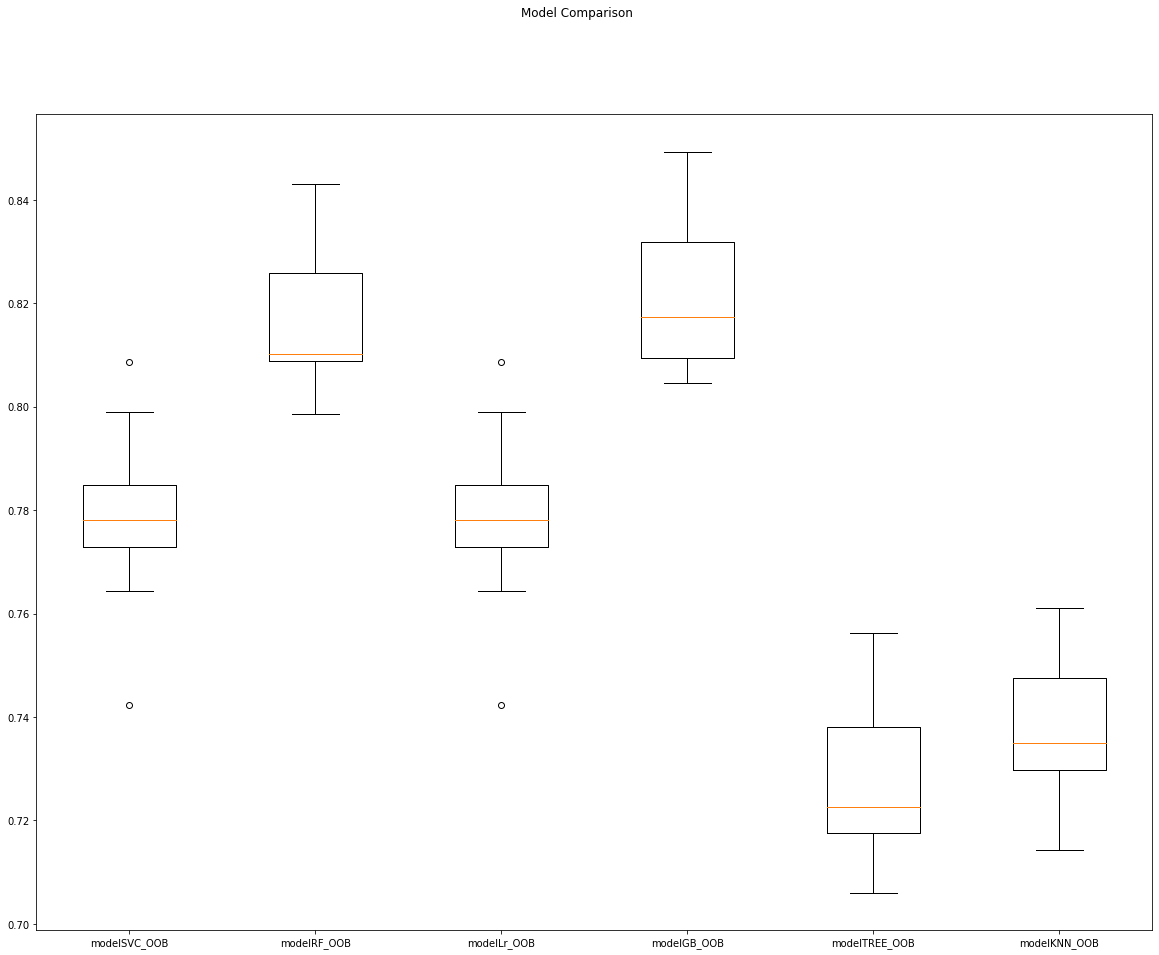

In [81]:
fig = plt.figure(figsize=(20,15))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome_OOB)
ax.set_xticklabels(model_names_OOB)
plt.show()

In [ ]:
### Top Model Selected is modelGB_OOB

In [ ]:
####################################################################################
# Model development -- Out of Box Scaled
####################################################################################

In [82]:
#Models
modelSVC_OOB_S = SVC(gamma = 'scale')
modelRF_OOB_S = RandomForestClassifier(n_estimators = 100)
modelLR_OOB_S = LinearRegression()
modelLr_OOB_S = LogisticRegression(solver='lbfgs', max_iter = 4000)
modelGB_OOB_S = GradientBoostingClassifier()
modelTREE_OOB_S = tree.DecisionTreeClassifier()
modelKNN_OOB_S = KNeighborsClassifier(n_neighbors=3)

In [83]:
#SVR
modelSVC_OOB_S.fit(X_train_OOB_S,y_train_OOB_S)
print(cross_val_score(modelSVC_OOB_S, X_train_OOB_S, y_train_OOB_S)) 
modelSVC_OOB_S.score(X_train_OOB_S,y_train_OOB_S)

[0.81452381 0.81571429 0.82357143 0.82214286 0.81666667]


0.8230952380952381

In [84]:
#Random Forest
modelRF_OOB_S.fit(X_train_OOB_S,y_train_OOB_S)
print(cross_val_score(modelRF_OOB_S, X_train_OOB_S, y_train_OOB_S))
modelRF_OOB_S.score(X_train_OOB_S,y_train_OOB_S)

[0.80880952 0.81214286 0.81952381 0.8197619  0.81095238]


0.9992857142857143

In [85]:
#Logistic Regression
modelLr_OOB_S.fit(X_train_OOB_S,y_train_OOB_S)
print(cross_val_score(modelLr_OOB_S, X_train_OOB_S, y_train_OOB_S))
modelLr_OOB_S.score(X_train_OOB_S,y_train_OOB_S)

[0.80928571 0.80952381 0.81142857 0.81309524 0.80666667]


0.8104285714285714

In [86]:
#Gradient Boosting
modelGB_OOB_S.fit(X_train_OOB_S,y_train_OOB_S)
print(cross_val_score(modelGB_OOB_S, X_train_OOB_S, y_train_OOB_S))
modelGB_OOB_S.score(X_train_OOB_S,y_train_OOB_S)

[0.81238095 0.81809524 0.82238095 0.83       0.81809524]


0.8265238095238095

In [87]:
#Decision Tree
modelTREE_OOB_S.fit(X_train_OOB_S,y_train_OOB_S)
print(cross_val_score(modelTREE_OOB_S, X_train_OOB_S, y_train_OOB_S)) 
modelTREE_OOB_S.score(X_train_OOB_S,y_train_OOB_S)

[0.70619048 0.73785714 0.73095238 0.72238095 0.72047619]


0.9992857142857143

In [88]:
#KNN
modelKNN_OOB_S.fit(X_train_OOB_S,y_train_OOB_S)
print(cross_val_score(modelKNN_OOB_S, X_train_OOB_S, y_train_OOB_S)) 
modelKNN_OOB_S.score(X_train_OOB_S,y_train_OOB_S)

[0.77547619 0.77166667 0.78071429 0.77619048 0.77047619]


0.8675238095238095

In [89]:
####################################################################################
# Evaluating the Results -- Out of Box Scaled Dataframe
####################################################################################

In [90]:
#SVC
predictions_OOB_S_SVC = modelSVC_OOB_S.predict(X_test_OOB_S)
accy_OOB_S_SVC = accuracy_score(y_test_OOB_S,predictions_OOB_S_SVC)
KAPPA_OOB_S_SVC = cohen_kappa_score(y_test_OOB_S, predictions_OOB_S_SVC)
ROC_OOB_S_SVC = roc_auc_score(y_test_OOB,predictions_OOB_S_SVC)
prec_OOB_S_SVC = precision_score(y_test_OOB, predictions_OOB_S_SVC)
rec_OOB_S_SVC = recall_score(y_test_OOB,predictions_OOB_S_SVC)
f1_OOB_S_SVC = f1_score(y_test_OOB,predictions_OOB_S_SVC)

model =  pd.DataFrame([['SVC', 'OOB_S', accy_OOB_S_SVC, KAPPA_OOB_S_SVC, ROC_OOB_S_SVC, prec_OOB_S_SVC, rec_OOB_S_SVC, f1_OOB_S_SVC]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True)
model_results


,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,SVC,OOB,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
1,RF,OOB,0.815222,0.367191,0.658050,0.618849,0.380903,0.471560
2,Lr,OOB,0.783444,-0.000222,0.499929,0.000000,0.000000,0.000000
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,Tree,OOB,0.729667,0.234166,0.621847,0.388094,0.431725,0.408748
5,KNN,OOB,0.735889,0.116099,0.551137,0.335884,0.225359,0.269739
6,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351


In [91]:
#Random Forest
predictions_OOB_S_RF = modelRF_OOB_S.predict(X_test_OOB_S)
accy_OOB_S_RF = accuracy_score(y_test_OOB_S,predictions_OOB_S_RF)
KAPPA_OOB_S_RF = cohen_kappa_score(y_test_OOB_S, predictions_OOB_S_RF)
ROC_OOB_S_RF = roc_auc_score(y_test_OOB,predictions_OOB_S_RF)
prec_OOB_S_RF = precision_score(y_test_OOB, predictions_OOB_S_RF)
rec_OOB_S_RF = recall_score(y_test_OOB,predictions_OOB_S_RF)
f1_OOB_S_RF = f1_score(y_test_OOB,predictions_OOB_S_RF)

model =  pd.DataFrame([['RF', 'OOB_S', accy_OOB_S_RF, KAPPA_OOB_S_RF, ROC_OOB_S_RF, prec_OOB_S_RF, rec_OOB_S_RF, f1_OOB_S_RF]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,SVC,OOB,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
1,RF,OOB,0.815222,0.367191,0.658050,0.618849,0.380903,0.471560
2,Lr,OOB,0.783444,-0.000222,0.499929,0.000000,0.000000,0.000000
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,Tree,OOB,0.729667,0.234166,0.621847,0.388094,0.431725,0.408748
5,KNN,OOB,0.735889,0.116099,0.551137,0.335884,0.225359,0.269739
6,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
7,RF,OOB_S,0.815333,0.365518,0.656820,0.620777,0.377310,0.469349


In [92]:
#Logistic Regression
predictions_OOB_S_Lr = modelLr_OOB_S.predict(X_test_OOB_S)
accy_OOB_S_Lr = accuracy_score(y_test_OOB_S,predictions_OOB_S_Lr)
KAPPA_OOB_S_Lr = cohen_kappa_score(y_test_OOB_S, predictions_OOB_S_Lr)
ROC_OOB_S_Lr = roc_auc_score(y_test_OOB,predictions_OOB_S_Lr)
prec_OOB_S_Lr = precision_score(y_test_OOB, predictions_OOB_S_Lr)
rec_OOB_S_Lr = recall_score(y_test_OOB,predictions_OOB_S_Lr)
f1_OOB_S_Lr = f1_score(y_test_OOB,predictions_OOB_S_Lr)

model =  pd.DataFrame([['Lr', 'OOB_S', accy_OOB_S_Lr, KAPPA_OOB_S_Lr, ROC_OOB_S_Lr, prec_OOB_S_Lr, rec_OOB_S_Lr, f1_OOB_S_Lr]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,SVC,OOB,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
1,RF,OOB,0.815222,0.367191,0.658050,0.618849,0.380903,0.471560
2,Lr,OOB,0.783444,-0.000222,0.499929,0.000000,0.000000,0.000000
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,Tree,OOB,0.729667,0.234166,0.621847,0.388094,0.431725,0.408748
5,KNN,OOB,0.735889,0.116099,0.551137,0.335884,0.225359,0.269739
6,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
7,RF,OOB_S,0.815333,0.365518,0.656820,0.620777,0.377310,0.469349
8,Lr,OOB_S,0.812444,0.277368,0.606119,0.690058,0.242300,0.358663


In [93]:
#Gradient Boosting
predictions_OOB_S_GB = modelGB_OOB_S.predict(X_test_OOB_S)
accy_OOB_S_GB = accuracy_score(y_test_OOB_S,predictions_OOB_S_GB)
KAPPA_OOB_S_GB = cohen_kappa_score(y_test_OOB_S, predictions_OOB_S_GB)
ROC_OOB_S_GB = roc_auc_score(y_test_OOB,predictions_OOB_S_GB)
prec_OOB_S_GB = precision_score(y_test_OOB, predictions_OOB_S_GB)
rec_OOB_S_GB = recall_score(y_test_OOB,predictions_OOB_S_GB)
f1_OOB_S_GB = f1_score(y_test_OOB,predictions_OOB_S_GB)

model =  pd.DataFrame([['GB', 'OOB_S', accy_OOB_S_GB, KAPPA_OOB_S_GB, ROC_OOB_S_GB, prec_OOB_S_GB, rec_OOB_S_GB, f1_OOB_S_GB]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,SVC,OOB,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
1,RF,OOB,0.815222,0.367191,0.658050,0.618849,0.380903,0.471560
2,Lr,OOB,0.783444,-0.000222,0.499929,0.000000,0.000000,0.000000
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,Tree,OOB,0.729667,0.234166,0.621847,0.388094,0.431725,0.408748
5,KNN,OOB,0.735889,0.116099,0.551137,0.335884,0.225359,0.269739
6,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
7,RF,OOB_S,0.815333,0.365518,0.656820,0.620777,0.377310,0.469349
8,Lr,OOB_S,0.812444,0.277368,0.606119,0.690058,0.242300,0.358663
9,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049


In [94]:
#Decision Tree
predictions_OOB_S_tree = modelTREE_OOB_S.predict(X_test_OOB_S)
accy_OOB_S_tree = accuracy_score(y_test_OOB_S,predictions_OOB_S_tree)
KAPPA_OOB_S_tree = cohen_kappa_score(y_test_OOB_S, predictions_OOB_S_tree)
ROC_OOB_S_tree = roc_auc_score(y_test_OOB,predictions_OOB_S_tree)
prec_OOB_S_tree = precision_score(y_test_OOB, predictions_OOB_S_tree)
rec_OOB_S_tree = recall_score(y_test_OOB,predictions_OOB_S_tree)
f1_OOB_S_tree = f1_score(y_test_OOB,predictions_OOB_S_tree)

model =  pd.DataFrame([['tree', 'OOB_S', accy_OOB_S_tree, KAPPA_OOB_S_tree, ROC_OOB_S_tree, prec_OOB_S_tree, rec_OOB_S_tree, f1_OOB_S_tree]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,SVC,OOB,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
1,RF,OOB,0.815222,0.367191,0.658050,0.618849,0.380903,0.471560
2,Lr,OOB,0.783444,-0.000222,0.499929,0.000000,0.000000,0.000000
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,Tree,OOB,0.729667,0.234166,0.621847,0.388094,0.431725,0.408748
5,KNN,OOB,0.735889,0.116099,0.551137,0.335884,0.225359,0.269739
6,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
7,RF,OOB_S,0.815333,0.365518,0.656820,0.620777,0.377310,0.469349
8,Lr,OOB_S,0.812444,0.277368,0.606119,0.690058,0.242300,0.358663
9,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049


In [95]:
#KNN
predictions_OOB_S_KNN = modelKNN_OOB_S.predict(X_test_OOB_S)
accy_OOB_S_KNN = accuracy_score(y_test_OOB_S,predictions_OOB_S_KNN)
KAPPA_OOB_S_KNN = cohen_kappa_score(y_test_OOB_S, predictions_OOB_S_KNN)
ROC_OOB_S_KNN = roc_auc_score(y_test_OOB,predictions_OOB_S_KNN)
prec_OOB_S_KNN = precision_score(y_test_OOB, predictions_OOB_S_KNN)
rec_OOB_S_KNN = recall_score(y_test_OOB,predictions_OOB_S_KNN)
f1_OOB_S_KNN = f1_score(y_test_OOB,predictions_OOB_S_KNN)

model =  pd.DataFrame([['KNN', 'OOB_S', accy_OOB_S_KNN, KAPPA_OOB_S_KNN, ROC_OOB_S_KNN, prec_OOB_S_KNN, rec_OOB_S_KNN, f1_OOB_S_KNN]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,SVC,OOB,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
1,RF,OOB,0.815222,0.367191,0.658050,0.618849,0.380903,0.471560
2,Lr,OOB,0.783444,-0.000222,0.499929,0.000000,0.000000,0.000000
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,Tree,OOB,0.729667,0.234166,0.621847,0.388094,0.431725,0.408748
5,KNN,OOB,0.735889,0.116099,0.551137,0.335884,0.225359,0.269739
6,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
7,RF,OOB_S,0.815333,0.365518,0.656820,0.620777,0.377310,0.469349
8,Lr,OOB_S,0.812444,0.277368,0.606119,0.690058,0.242300,0.358663
9,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049


In [96]:
model_results = model_results.sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
9,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
6,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
7,RF,OOB_S,0.815333,0.365518,0.656820,0.620777,0.377310,0.469349
1,RF,OOB,0.815222,0.367191,0.658050,0.618849,0.380903,0.471560
8,Lr,OOB_S,0.812444,0.277368,0.606119,0.690058,0.242300,0.358663
0,SVC,OOB,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
2,Lr,OOB,0.783444,-0.000222,0.499929,0.000000,0.000000,0.000000
11,KNN,OOB_S,0.775556,0.282300,0.630137,0.476440,0.373717,0.418872
5,KNN,OOB,0.735889,0.116099,0.551137,0.335884,0.225359,0.269739


In [97]:
outcome_OOB_S = []
model_names_OOB_S = []
models_OOB_S = [('modelSVC_OOB_S', SVC(gamma = 'scale')),
              ('modelRF_OOB_S', RandomForestClassifier(n_estimators = 100)),
              ('modelLr_OOB_S', LogisticRegression(solver='lbfgs', max_iter = 4000)),
              ('modelGB_OOB_S', GradientBoostingClassifier()),
              ('modelTREE_OOB_S', tree.DecisionTreeClassifier()),
              ('modelKNN_OOB_S', KNeighborsClassifier(n_neighbors=3))]

In [98]:
for model_name_OOB_S, model_OOB_S in models_OOB_S:
    k_fold_validation = model_selection.KFold(n_splits=10)
    results_OOB_S = model_selection.cross_val_score(model_OOB_S, features_OOB_S, depVar_OOB_S, cv=k_fold_validation, scoring='accuracy')
    outcome_OOB_S.append(results_OOB_S)
    model_names_OOB_S.append(model_name_OOB_S)
    output_message_OOB_S = "%s| Mean=%f STD=%f" % (model_name_OOB_S, results_OOB_S.mean(), results_OOB_S.std())
    print(output_message_OOB_S)

modelSVC_OOB_S| Mean=0.819433 STD=0.013832
modelRF_OOB_S| Mean=0.816967 STD=0.012641
modelLr_OOB_S| Mean=0.809500 STD=0.012167
modelGB_OOB_S| Mean=0.821333 STD=0.014674
modelTREE_OOB_S| Mean=0.725700 STD=0.013367
modelKNN_OOB_S| Mean=0.776967 STD=0.014157


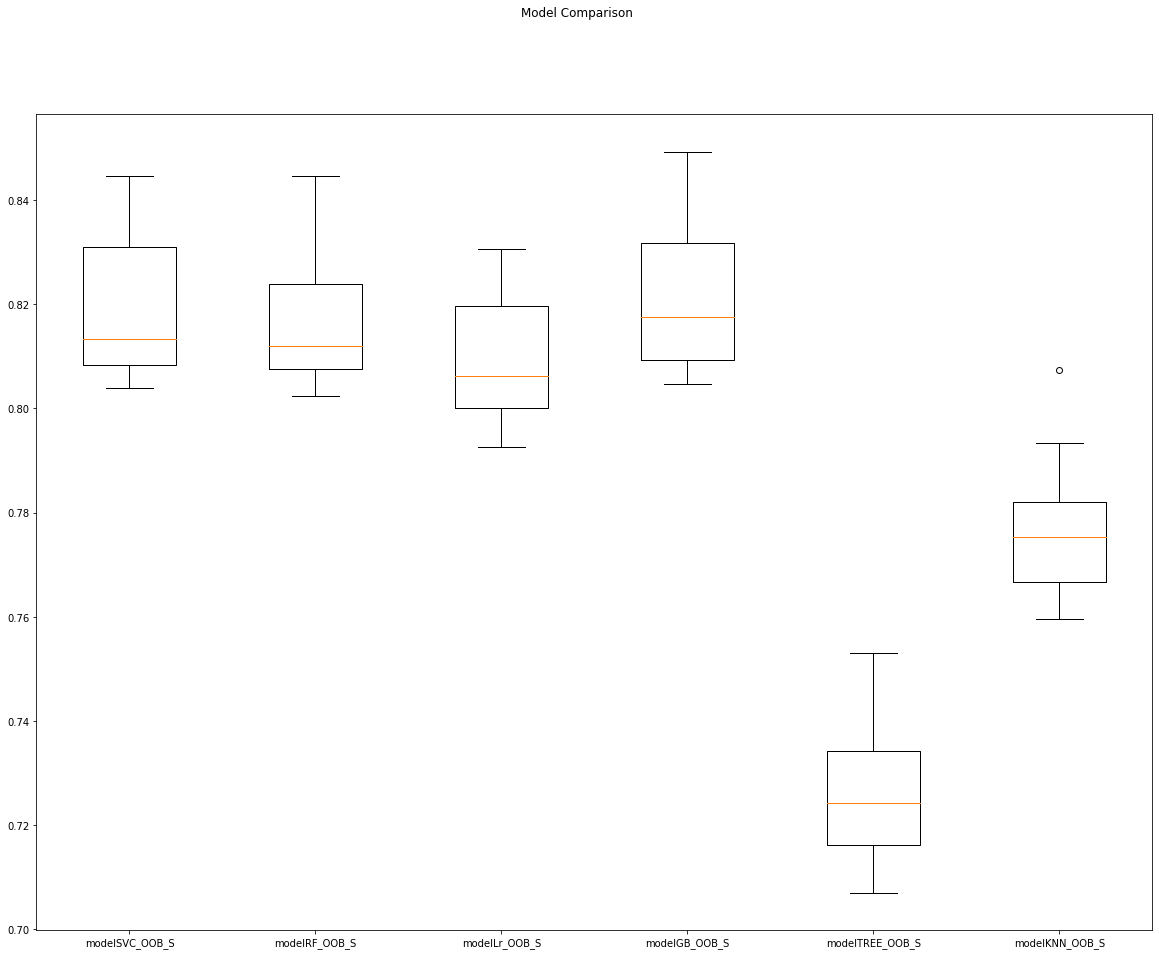

In [99]:
fig = plt.figure(figsize=(20,15))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome_OOB_S)
ax.set_xticklabels(model_names_OOB_S)
plt.show()

In [100]:
#### Top model selected is modelGB_OOB_S

In [101]:
####################################################################################
# Model development -- Out of Box Feature Selection
####################################################################################

In [102]:
#Models
modelSVC_OOB_FS = SVC(gamma = 'scale')
modelRF_OOB_FS = RandomForestClassifier(n_estimators = 100)
modelLR_OOB_FS = LinearRegression()
modelLr_OOB_FS = LogisticRegression(solver='lbfgs', max_iter = 4000)
modelGB_OOB_FS = GradientBoostingClassifier()
modelTREE_OOB_FS = tree.DecisionTreeClassifier()
modelKNN_OOB_FS = KNeighborsClassifier(n_neighbors=3)

In [103]:
#SVR
modelSVC_OOB_FS.fit(X_train_OOB_FS,y_train_OOB_FS)
print(cross_val_score(modelSVC_OOB_FS, X_train_OOB_FS, y_train_OOB_FS)) 
modelSVC_OOB_FS.score(X_train_OOB_FS,y_train_OOB_FS)

[0.77690476 0.77690476 0.77666667 0.77666667 0.77666667]


0.7768095238095238

In [104]:
#Random Forest
modelRF_OOB_FS.fit(X_train_OOB_FS,y_train_OOB_FS)
print(cross_val_score(modelRF_OOB_FS, X_train_OOB_FS, y_train_OOB_FS))
modelRF_OOB_FS.score(X_train_OOB_FS,y_train_OOB_FS)

[0.80904762 0.8147619  0.81880952 0.82095238 0.81452381]


0.9992857142857143

In [105]:
#Logistic Regression
modelLr_OOB_FS.fit(X_train_OOB_FS,y_train_OOB_FS)
print(cross_val_score(modelLr_OOB_FS, X_train_OOB_FS, y_train_OOB_FS))
modelLr_OOB_FS.score(X_train_OOB_FS,y_train_OOB_FS)

[0.77690476 0.77666667 0.77666667 0.77642857 0.77666667]


0.7767142857142857

In [106]:
#Gradient Boosting
modelGB_OOB_FS.fit(X_train_OOB_FS,y_train_OOB_FS)
print(cross_val_score(modelGB_OOB_FS, X_train_OOB_FS, y_train_OOB_FS))
modelGB_OOB_FS.score(X_train_OOB_FS,y_train_OOB_FS)

[0.81357143 0.81738095 0.82333333 0.82714286 0.81857143]


0.8260952380952381

In [107]:
#Decision Tree
modelTREE_OOB_FS.fit(X_train_OOB_FS,y_train_OOB_FS)
print(cross_val_score(modelTREE_OOB_FS, X_train_OOB_FS, y_train_OOB_FS)) 
modelTREE_OOB_FS.score(X_train_OOB_FS,y_train_OOB_FS)

[0.71880952 0.72833333 0.7252381  0.73071429 0.72238095]


0.9992857142857143

In [108]:
#KNN
modelKNN_OOB_FS.fit(X_train_OOB_FS,y_train_OOB_FS)
print(cross_val_score(modelKNN_OOB_FS, X_train_OOB_FS, y_train_OOB_FS)) 
modelKNN_OOB_FS.score(X_train_OOB_FS,y_train_OOB_FS)

[0.73547619 0.73714286 0.73452381 0.73357143 0.72690476]


0.8455714285714285

In [109]:
####################################################################################
# Evaluating the Results -- Out of Box Feature Selection Dataframe
####################################################################################

In [110]:
#SVC
predictions_OOB_FS_SVC = modelSVC_OOB_FS.predict(X_test_OOB_FS)
accy_OOB_FS_SVC = accuracy_score(y_test_OOB_FS,predictions_OOB_FS_SVC)
KAPPA_OOB_FS_SVC = cohen_kappa_score(y_test_OOB_FS, predictions_OOB_FS_SVC)
ROC_OOB_FS_SVC = roc_auc_score(y_test_OOB,predictions_OOB_FS_SVC)
prec_OOB_FS_SVC = precision_score(y_test_OOB, predictions_OOB_FS_SVC)
rec_OOB_FS_SVC = recall_score(y_test_OOB,predictions_OOB_FS_SVC)
f1_OOB_FS_SVC = f1_score(y_test_OOB,predictions_OOB_FS_SVC)

model =  pd.DataFrame([['SVC', 'OOB_FS', accy_OOB_FS_SVC, KAPPA_OOB_FS_SVC, ROC_OOB_FS_SVC, prec_OOB_FS_SVC, rec_OOB_FS_SVC, f1_OOB_FS_SVC]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

/Users/grantwisner/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
1,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
2,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
3,RF,OOB_S,0.815333,0.365518,0.656820,0.620777,0.377310,0.469349
4,RF,OOB,0.815222,0.367191,0.658050,0.618849,0.380903,0.471560
5,Lr,OOB_S,0.812444,0.277368,0.606119,0.690058,0.242300,0.358663
6,SVC,OOB,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
12,SVC,OOB_FS,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
7,Lr,OOB,0.783444,-0.000222,0.499929,0.000000,0.000000,0.000000
8,KNN,OOB_S,0.775556,0.282300,0.630137,0.476440,0.373717,0.418872


In [111]:
#Random Forest
predictions_OOB_FS_RF = modelRF_OOB_FS.predict(X_test_OOB_FS)
accy_OOB_FS_RF = accuracy_score(y_test_OOB_FS,predictions_OOB_FS_RF)
KAPPA_OOB_FS_RF = cohen_kappa_score(y_test_OOB_FS, predictions_OOB_FS_RF)
ROC_OOB_FS_RF = roc_auc_score(y_test_OOB,predictions_OOB_FS_RF)
prec_OOB_FS_RF = precision_score(y_test_OOB, predictions_OOB_FS_RF)
rec_OOB_FS_RF = recall_score(y_test_OOB,predictions_OOB_FS_RF)
f1_OOB_FS_RF = f1_score(y_test_OOB,predictions_OOB_FS_RF)

model =  pd.DataFrame([['RF', 'OOB_FS', accy_OOB_FS_RF, KAPPA_OOB_FS_RF, ROC_OOB_FS_RF, prec_OOB_FS_RF, rec_OOB_FS_RF, f1_OOB_FS_RF]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
1,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
2,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
3,RF,OOB_S,0.815333,0.365518,0.656820,0.620777,0.377310,0.469349
4,RF,OOB,0.815222,0.367191,0.658050,0.618849,0.380903,0.471560
13,RF,OOB_FS,0.815222,0.363621,0.655635,0.621483,0.374230,0.467158
5,Lr,OOB_S,0.812444,0.277368,0.606119,0.690058,0.242300,0.358663
6,SVC,OOB,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
7,SVC,OOB_FS,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
8,Lr,OOB,0.783444,-0.000222,0.499929,0.000000,0.000000,0.000000


In [112]:
#Logistic Regression
predictions_OOB_FS_Lr = modelLr_OOB_FS.predict(X_test_OOB_FS)
accy_OOB_FS_Lr = accuracy_score(y_test_OOB_FS,predictions_OOB_FS_Lr)
KAPPA_OOB_FS_Lr = cohen_kappa_score(y_test_OOB_FS, predictions_OOB_FS_Lr)
ROC_OOB_FS_Lr = roc_auc_score(y_test_OOB,predictions_OOB_FS_Lr)
prec_OOB_FS_Lr = precision_score(y_test_OOB, predictions_OOB_FS_Lr)
rec_OOB_FS_Lr = recall_score(y_test_OOB,predictions_OOB_FS_Lr)
f1_OOB_FS_Lr = f1_score(y_test_OOB,predictions_OOB_FS_Lr)

model =  pd.DataFrame([['Lr', 'OOB_FS', accy_OOB_FS_Lr, KAPPA_OOB_FS_Lr, ROC_OOB_FS_Lr, prec_OOB_FS_Lr, rec_OOB_FS_Lr, f1_OOB_FS_Lr]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

/Users/grantwisner/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
1,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
2,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
3,RF,OOB_S,0.815333,0.365518,0.656820,0.620777,0.377310,0.469349
4,RF,OOB,0.815222,0.367191,0.658050,0.618849,0.380903,0.471560
5,RF,OOB_FS,0.815222,0.363621,0.655635,0.621483,0.374230,0.467158
6,Lr,OOB_S,0.812444,0.277368,0.606119,0.690058,0.242300,0.358663
7,SVC,OOB,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
8,SVC,OOB_FS,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
14,Lr,OOB_FS,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000


In [113]:
#Gradient Boosting
predictions_OOB_FS_GB = modelGB_OOB_FS.predict(X_test_OOB_FS)
accy_OOB_FS_GB = accuracy_score(y_test_OOB_FS,predictions_OOB_FS_GB)
KAPPA_OOB_FS_GB = cohen_kappa_score(y_test_OOB_FS, predictions_OOB_FS_GB)
ROC_OOB_FS_GB = roc_auc_score(y_test_OOB,predictions_OOB_FS_GB)
prec_OOB_FS_GB = precision_score(y_test_OOB, predictions_OOB_FS_GB)
rec_OOB_FS_GB = recall_score(y_test_OOB,predictions_OOB_FS_GB)
f1_OOB_FS_GB = f1_score(y_test_OOB,predictions_OOB_FS_GB)

model =  pd.DataFrame([['GB', 'OOB_FS', accy_OOB_FS_GB, KAPPA_OOB_FS_GB, ROC_OOB_FS_GB, prec_OOB_FS_GB, rec_OOB_FS_GB, f1_OOB_FS_GB]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
15,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
0,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
1,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
2,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
3,RF,OOB_S,0.815333,0.365518,0.656820,0.620777,0.377310,0.469349
4,RF,OOB,0.815222,0.367191,0.658050,0.618849,0.380903,0.471560
5,RF,OOB_FS,0.815222,0.363621,0.655635,0.621483,0.374230,0.467158
6,Lr,OOB_S,0.812444,0.277368,0.606119,0.690058,0.242300,0.358663
7,SVC,OOB,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
8,SVC,OOB_FS,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000


In [114]:
#Decision Tree
predictions_OOB_FS_tree = modelTREE_OOB_FS.predict(X_test_OOB_FS)
accy_OOB_FS_tree = accuracy_score(y_test_OOB_FS,predictions_OOB_FS_tree)
KAPPA_OOB_FS_tree = cohen_kappa_score(y_test_OOB_FS, predictions_OOB_FS_tree)
ROC_OOB_FS_tree = roc_auc_score(y_test_OOB,predictions_OOB_FS_tree)
prec_OOB_FS_tree = precision_score(y_test_OOB, predictions_OOB_FS_tree)
rec_OOB_FS_tree = recall_score(y_test_OOB,predictions_OOB_FS_tree)
f1_OOB_FS_tree = f1_score(y_test_OOB,predictions_OOB_FS_tree)

model =  pd.DataFrame([['Tree', 'OOB_FS', accy_OOB_FS_tree, KAPPA_OOB_FS_tree, ROC_OOB_FS_tree, prec_OOB_FS_tree, rec_OOB_FS_tree, f1_OOB_FS_tree]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
1,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
2,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
4,RF,OOB_S,0.815333,0.365518,0.656820,0.620777,0.377310,0.469349
5,RF,OOB,0.815222,0.367191,0.658050,0.618849,0.380903,0.471560
6,RF,OOB_FS,0.815222,0.363621,0.655635,0.621483,0.374230,0.467158
7,Lr,OOB_S,0.812444,0.277368,0.606119,0.690058,0.242300,0.358663
8,SVC,OOB,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
9,SVC,OOB_FS,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000


In [115]:
#KNN
predictions_OOB_FS_KNN = modelKNN_OOB_FS.predict(X_test_OOB_FS)
accy_OOB_FS_KNN = accuracy_score(y_test_OOB_FS,predictions_OOB_FS_KNN)
KAPPA_OOB_FS_KNN = cohen_kappa_score(y_test_OOB_FS, predictions_OOB_FS_KNN)
ROC_OOB_FS_KNN = roc_auc_score(y_test_OOB,predictions_OOB_FS_KNN)
prec_OOB_FS_KNN = precision_score(y_test_OOB, predictions_OOB_FS_KNN)
rec_OOB_FS_KNN = recall_score(y_test_OOB,predictions_OOB_FS_KNN)
f1_OOB_FS_KNN = f1_score(y_test_OOB,predictions_OOB_FS_KNN)

model =  pd.DataFrame([['KNN', 'OOB_FS', accy_OOB_FS_KNN, KAPPA_OOB_FS_KNN, ROC_OOB_FS_KNN, prec_OOB_FS_KNN, rec_OOB_FS_KNN, f1_OOB_FS_KNN]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
1,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
2,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
4,RF,OOB_S,0.815333,0.365518,0.656820,0.620777,0.377310,0.469349
5,RF,OOB,0.815222,0.367191,0.658050,0.618849,0.380903,0.471560
6,RF,OOB_FS,0.815222,0.363621,0.655635,0.621483,0.374230,0.467158
7,Lr,OOB_S,0.812444,0.277368,0.606119,0.690058,0.242300,0.358663
8,SVC,OOB,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
9,SVC,OOB_FS,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000


In [116]:
outcome_OOB_FS = []
model_names_OOB_FS = []
models_OOB_FS = [('modelSVC_OOB_FS', SVC(gamma = 'scale')),
              ('modelRF_OOB_FS', RandomForestClassifier(n_estimators = 100)),
              ('modelLr_OOB_FS', LogisticRegression(solver='lbfgs', max_iter = 4000)),
              ('modelGB_OOB_FS', GradientBoostingClassifier()),
              ('modelTREE_OOB_FS', tree.DecisionTreeClassifier()),
              ('modelKNN_OOB_FS', KNeighborsClassifier(n_neighbors=3))]

In [117]:
for model_name_OOB_FS, model_OOB_FS in models_OOB_FS:
    k_fold_validation = model_selection.KFold(n_splits=10)
    results_OOB_FS = model_selection.cross_val_score(model_OOB_FS, features_OOB_FS, depVar_OOB_FS, cv=k_fold_validation, scoring='accuracy')
    outcome_OOB_FS.append(results_OOB_FS)
    model_names_OOB_FS.append(model_name_OOB_FS)
    output_message_OOB_FS = "%s| Mean=%f STD=%f" % (model_name_OOB_FS, results_OOB_FS.mean(), results_OOB_FS.std())
    print(output_message_OOB_FS)

modelSVC_OOB_FS| Mean=0.778800 STD=0.017234
modelRF_OOB_FS| Mean=0.816633 STD=0.013045
modelLr_OOB_FS| Mean=0.778733 STD=0.017159
modelGB_OOB_FS| Mean=0.821400 STD=0.014650
modelTREE_OOB_FS| Mean=0.726500 STD=0.010574
modelKNN_OOB_FS| Mean=0.738767 STD=0.014621


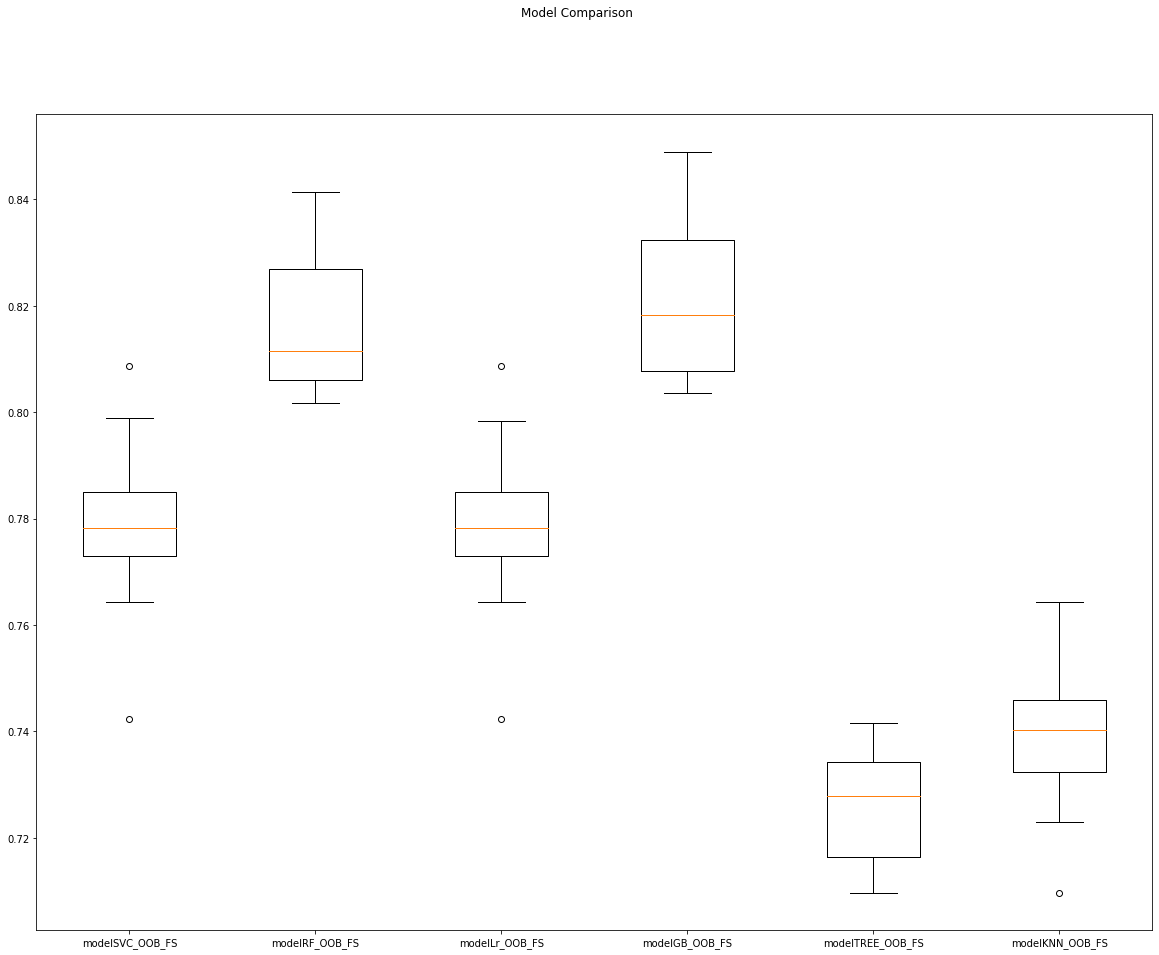

In [118]:
fig = plt.figure(figsize=(20,15))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome_OOB_FS)
ax.set_xticklabels(model_names_OOB_FS)
plt.show()

In [119]:
#### Top Model selected is modelGB_OOB_FS

In [120]:
####################################################################################
# Model development -- Out of Box Feature Selection Scaled
####################################################################################

In [121]:
#Models
modelSVC_OOB_FS_S = SVC(gamma = 'scale')
modelRF_OOB_FS_S = RandomForestClassifier(n_estimators = 100)
modelLR_OOB_FS_S = LinearRegression()
modelLr_OOB_FS_S = LogisticRegression(solver='lbfgs', max_iter = 4000)
modelGB_OOB_FS_S = GradientBoostingClassifier()
modelTREE_OOB_FS_S = tree.DecisionTreeClassifier()
modelKNN_OOB_FS_S = KNeighborsClassifier(n_neighbors=3)

In [122]:
#SVR
modelSVC_OOB_FS_S.fit(X_train_OOB_FS_S,y_train_OOB_FS_S)
print(cross_val_score(modelSVC_OOB_FS_S, X_train_OOB_FS_S, y_train_OOB_FS_S)) 
modelSVC_OOB_FS_S.score(X_train_OOB_FS_S,y_train_OOB_FS_S)

[0.81404762 0.81714286 0.82238095 0.82333333 0.81833333]


0.822952380952381

In [123]:
#Random Forest
modelRF_OOB_FS_S.fit(X_train_OOB_FS_S,y_train_OOB_FS_S)
print(cross_val_score(modelRF_OOB_FS_S, X_train_OOB_FS_S, y_train_OOB_FS_S))
modelRF_OOB_FS_S.score(X_train_OOB_FS_S,y_train_OOB_FS_S)

[0.8097619  0.81547619 0.81952381 0.82       0.81404762]


0.9992857142857143

In [124]:
#Logistic Regression
modelLr_OOB_FS_S.fit(X_train_OOB_FS_S,y_train_OOB_FS_S)
print(cross_val_score(modelLr_OOB_FS_S, X_train_OOB_FS_S, y_train_OOB_FS_S))
modelLr_OOB_FS_S.score(X_train_OOB_FS_S,y_train_OOB_FS_S)

[0.80857143 0.80904762 0.81119048 0.81261905 0.80666667]


0.8102380952380952

In [125]:
#Gradient Boosting
modelGB_OOB_FS_S.fit(X_train_OOB_FS_S,y_train_OOB_FS_S)
print(cross_val_score(modelGB_OOB_FS_S, X_train_OOB_FS_S, y_train_OOB_FS_S))
modelGB_OOB_FS_S.score(X_train_OOB_FS_S,y_train_OOB_FS_S)

[0.81357143 0.81714286 0.82333333 0.82714286 0.81880952]


0.8260952380952381

In [126]:
#Decision Tree
modelTREE_OOB_FS_S.fit(X_train_OOB_FS_S,y_train_OOB_FS_S)
print(cross_val_score(modelTREE_OOB_FS_S, X_train_OOB_FS_S, y_train_OOB_FS_S)) 
modelTREE_OOB_FS_S.score(X_train_OOB_FS_S,y_train_OOB_FS_S)

[0.72380952 0.73380952 0.72142857 0.72809524 0.72      ]


0.9992857142857143

In [127]:
#KNN
modelKNN_OOB_FS_S.fit(X_train_OOB_FS_S,y_train_OOB_FS_S)
print(cross_val_score(modelKNN_OOB_FS_S, X_train_OOB_FS_S, y_train_OOB_FS_S)) 
modelKNN_OOB_FS_S.score(X_train_OOB_FS_S,y_train_OOB_FS_S)

[0.77285714 0.76857143 0.78357143 0.77833333 0.77714286]


0.8670476190476191

In [128]:
####################################################################################
# Evaluating the Results -- Out of Box Feature Selection Scaled Dataframe
####################################################################################

In [129]:
#SVC
predictions_OOB_FS_S_SVC = modelSVC_OOB_FS_S.predict(X_test_OOB_FS_S)
accy_OOB_FS_S_SVC = accuracy_score(y_test_OOB_FS_S,predictions_OOB_FS_S_SVC)
KAPPA_OOB_FS_S_SVC = cohen_kappa_score(y_test_OOB_FS_S, predictions_OOB_FS_S_SVC)
ROC_OOB_FS_S_SVC = roc_auc_score(y_test_OOB,predictions_OOB_FS_S_SVC)
prec_OOB_FS_S_SVC = precision_score(y_test_OOB, predictions_OOB_FS_S_SVC)
rec_OOB_FS_S_SVC = recall_score(y_test_OOB,predictions_OOB_FS_S_SVC)
f1_OOB_FS_S_SVC = f1_score(y_test_OOB,predictions_OOB_FS_S_SVC)

model =  pd.DataFrame([['SVC', 'OOB_FS_S', accy_OOB_FS_S_SVC, KAPPA_OOB_FS_S_SVC, ROC_OOB_FS_S_SVC, prec_OOB_FS_S_SVC, rec_OOB_FS_S_SVC, f1_OOB_FS_S_SVC]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
1,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
2,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
18,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
3,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
4,RF,OOB_S,0.815333,0.365518,0.656820,0.620777,0.377310,0.469349
5,RF,OOB,0.815222,0.367191,0.658050,0.618849,0.380903,0.471560
6,RF,OOB_FS,0.815222,0.363621,0.655635,0.621483,0.374230,0.467158
7,Lr,OOB_S,0.812444,0.277368,0.606119,0.690058,0.242300,0.358663
8,SVC,OOB,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000


In [130]:
#Random Forest
predictions_OOB_FS_S_RF = modelRF_OOB_FS_S.predict(X_test_OOB_FS_S)
accy_OOB_FS_S_RF = accuracy_score(y_test_OOB_FS_S,predictions_OOB_FS_S_RF)
KAPPA_OOB_FS_S_RF = cohen_kappa_score(y_test_OOB_FS_S, predictions_OOB_FS_S_RF)
ROC_OOB_FS_S_RF = roc_auc_score(y_test_OOB,predictions_OOB_FS_S_RF)
prec_OOB_FS_S_RF = precision_score(y_test_OOB, predictions_OOB_FS_S_RF)
rec_OOB_FS_S_RF = recall_score(y_test_OOB,predictions_OOB_FS_S_RF)
f1_OOB_FS_S_RF = f1_score(y_test_OOB,predictions_OOB_FS_S_RF)

model =  pd.DataFrame([['RF', 'OOB_FS_S', accy_OOB_FS_S_RF, KAPPA_OOB_FS_S_RF, ROC_OOB_FS_S_RF, prec_OOB_FS_S_RF, rec_OOB_FS_S_RF, f1_OOB_FS_S_RF]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
1,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
2,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
4,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
19,RF,OOB_FS_S,0.816000,0.369719,0.659103,0.621870,0.382444,0.473617
5,RF,OOB_S,0.815333,0.365518,0.656820,0.620777,0.377310,0.469349
6,RF,OOB,0.815222,0.367191,0.658050,0.618849,0.380903,0.471560
7,RF,OOB_FS,0.815222,0.363621,0.655635,0.621483,0.374230,0.467158
8,Lr,OOB_S,0.812444,0.277368,0.606119,0.690058,0.242300,0.358663


In [131]:
#Logistic Regression
predictions_OOB_FS_S_Lr = modelLr_OOB_FS_S.predict(X_test_OOB_FS_S)
accy_OOB_FS_S_Lr = accuracy_score(y_test_OOB_FS_S,predictions_OOB_FS_S_Lr)
KAPPA_OOB_FS_S_Lr = cohen_kappa_score(y_test_OOB_FS_S, predictions_OOB_FS_S_Lr)
ROC_OOB_FS_S_Lr = roc_auc_score(y_test_OOB,predictions_OOB_FS_S_Lr)
prec_OOB_FS_S_Lr = precision_score(y_test_OOB, predictions_OOB_FS_S_Lr)
rec_OOB_FS_S_Lr = recall_score(y_test_OOB,predictions_OOB_FS_S_Lr)
f1_OOB_FS_S_Lr = f1_score(y_test_OOB,predictions_OOB_FS_S_Lr)

model =  pd.DataFrame([['Lr', 'OOB_FS_S', accy_OOB_FS_S_Lr, KAPPA_OOB_FS_S_Lr, ROC_OOB_FS_S_Lr, prec_OOB_FS_S_Lr, rec_OOB_FS_S_Lr, f1_OOB_FS_S_Lr]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
1,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
2,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
4,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
5,RF,OOB_FS_S,0.816000,0.369719,0.659103,0.621870,0.382444,0.473617
6,RF,OOB_S,0.815333,0.365518,0.656820,0.620777,0.377310,0.469349
7,RF,OOB,0.815222,0.367191,0.658050,0.618849,0.380903,0.471560
8,RF,OOB_FS,0.815222,0.363621,0.655635,0.621483,0.374230,0.467158
9,Lr,OOB_S,0.812444,0.277368,0.606119,0.690058,0.242300,0.358663


In [132]:
#Gradient Boosting
predictions_OOB_FS_S_GB = modelGB_OOB_FS_S.predict(X_test_OOB_FS_S)
accy_OOB_FS_S_GB = accuracy_score(y_test_OOB_FS_S,predictions_OOB_FS_S_GB)
KAPPA_OOB_FS_S_GB = cohen_kappa_score(y_test_OOB_FS_S, predictions_OOB_FS_S_GB)
ROC_OOB_FS_S_GB = roc_auc_score(y_test_OOB,predictions_OOB_FS_S_GB)
prec_OOB_FS_S_GB = precision_score(y_test_OOB, predictions_OOB_FS_S_GB)
rec_OOB_FS_S_GB = recall_score(y_test_OOB,predictions_OOB_FS_S_GB)
f1_OOB_FS_S_GB = f1_score(y_test_OOB,predictions_OOB_FS_S_GB)

model =  pd.DataFrame([['GB', 'OOB_FS_S', accy_OOB_FS_S_GB, KAPPA_OOB_FS_S_GB, ROC_OOB_FS_S_GB, prec_OOB_FS_S_GB, rec_OOB_FS_S_GB, f1_OOB_FS_S_GB]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
21,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
0,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
1,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
2,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
4,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
5,RF,OOB_FS_S,0.816000,0.369719,0.659103,0.621870,0.382444,0.473617
6,RF,OOB_S,0.815333,0.365518,0.656820,0.620777,0.377310,0.469349
7,RF,OOB,0.815222,0.367191,0.658050,0.618849,0.380903,0.471560
8,RF,OOB_FS,0.815222,0.363621,0.655635,0.621483,0.374230,0.467158


In [133]:
#Decision Tree
predictions_OOB_FS_S_tree = modelTREE_OOB_FS_S.predict(X_test_OOB_FS_S)
accy_OOB_FS_S_tree = accuracy_score(y_test_OOB_FS_S,predictions_OOB_FS_S_tree)
KAPPA_OOB_FS_S_tree = cohen_kappa_score(y_test_OOB_FS_S, predictions_OOB_FS_S_tree)
ROC_OOB_FS_S_tree = roc_auc_score(y_test_OOB,predictions_OOB_FS_S_tree)
prec_OOB_FS_S_tree = precision_score(y_test_OOB, predictions_OOB_FS_S_tree)
rec_OOB_FS_S_tree = recall_score(y_test_OOB,predictions_OOB_FS_S_tree)
f1_OOB_FS_S_tree = f1_score(y_test_OOB,predictions_OOB_FS_S_tree)

model =  pd.DataFrame([['Tree', 'OOB_FS_S', accy_OOB_FS_S_tree, KAPPA_OOB_FS_S_tree, ROC_OOB_FS_S_tree, prec_OOB_FS_S_tree, rec_OOB_FS_S_tree, f1_OOB_FS_S_tree]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
5,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
6,RF,OOB_FS_S,0.816000,0.369719,0.659103,0.621870,0.382444,0.473617
7,RF,OOB_S,0.815333,0.365518,0.656820,0.620777,0.377310,0.469349
8,RF,OOB,0.815222,0.367191,0.658050,0.618849,0.380903,0.471560
9,RF,OOB_FS,0.815222,0.363621,0.655635,0.621483,0.374230,0.467158


In [134]:
#KNN
predictions_OOB_FS_S_KNN = modelKNN_OOB_FS_S.predict(X_test_OOB_FS_S)
accy_OOB_FS_S_KNN = accuracy_score(y_test_OOB_FS_S,predictions_OOB_FS_S_KNN)
KAPPA_OOB_FS_S_KNN = cohen_kappa_score(y_test_OOB_FS_S, predictions_OOB_FS_S_KNN)
ROC_OOB_FS_S_KNN = roc_auc_score(y_test_OOB,predictions_OOB_FS_S_KNN)
prec_OOB_FS_S_KNN = precision_score(y_test_OOB, predictions_OOB_FS_S_KNN)
rec_OOB_FS_S_KNN = recall_score(y_test_OOB,predictions_OOB_FS_S_KNN)
f1_OOB_FS_S_KNN = f1_score(y_test_OOB,predictions_OOB_FS_S_KNN)

model =  pd.DataFrame([['KNN', 'OOB_FS_S', accy_OOB_FS_S_KNN, KAPPA_OOB_FS_S_KNN, ROC_OOB_FS_S_KNN, prec_OOB_FS_S_KNN, rec_OOB_FS_S_KNN, f1_OOB_FS_S_KNN]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
5,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
6,RF,OOB_FS_S,0.816000,0.369719,0.659103,0.621870,0.382444,0.473617
7,RF,OOB_S,0.815333,0.365518,0.656820,0.620777,0.377310,0.469349
8,RF,OOB,0.815222,0.367191,0.658050,0.618849,0.380903,0.471560
9,RF,OOB_FS,0.815222,0.363621,0.655635,0.621483,0.374230,0.467158


In [135]:
outcome_OOB_FS_S = []
model_names_OOB_FS_S = []
models_OOB_FS_S = [('modelSVC_OOB_FS_S', SVC(gamma = 'scale')),
              ('modelRF_OOB_FS_S', RandomForestClassifier(n_estimators = 100)),
              ('modelLr_OOB_FS_S', LogisticRegression(solver='lbfgs', max_iter = 4000)),
              ('modelGB_OOB_FS_S', GradientBoostingClassifier()),
              ('modelTREE_OOB_FS_S', tree.DecisionTreeClassifier()),
              ('modelKNN_OOB_FS_S', KNeighborsClassifier(n_neighbors=3))]

In [136]:
for model_name_OOB_FS_S, model_OOB_FS_S in models_OOB_FS_S:
    k_fold_validation = model_selection.KFold(n_splits=10)
    results_OOB_FS_S = model_selection.cross_val_score(model_OOB_FS_S, features_OOB_FS_S, depVar_OOB_FS_S, cv=k_fold_validation, scoring='accuracy')
    outcome_OOB_FS_S.append(results_OOB_FS_S)
    model_names_OOB_FS_S.append(model_name_OOB_FS_S)
    output_message_OOB_FS_S = "%s| Mean=%f STD=%f" % (model_name_OOB_FS_S, results_OOB_FS_S.mean(), results_OOB_FS_S.std())
    print(output_message_OOB_FS_S)

modelSVC_OOB_FS_S| Mean=0.819567 STD=0.013872
modelRF_OOB_FS_S| Mean=0.816667 STD=0.013300
modelLr_OOB_FS_S| Mean=0.809467 STD=0.012215
modelGB_OOB_FS_S| Mean=0.821433 STD=0.014635
modelTREE_OOB_FS_S| Mean=0.725267 STD=0.010777
modelKNN_OOB_FS_S| Mean=0.777167 STD=0.013747


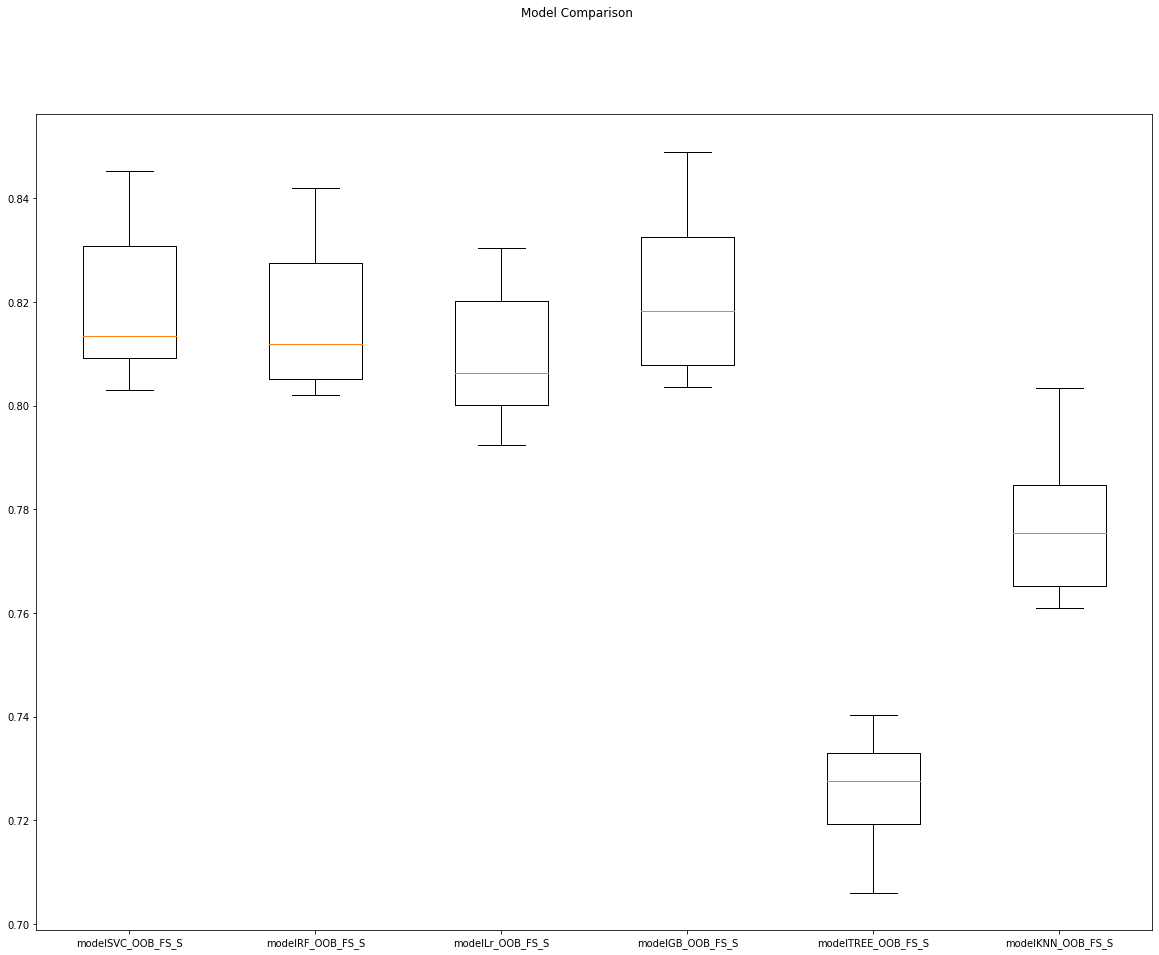

In [137]:
fig = plt.figure(figsize=(20,15))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome_OOB_FS_S)
ax.set_xticklabels(model_names_OOB_FS_S)
plt.show()

In [138]:
#### Top model selected is modelGBOOB_FS_S

In [139]:
####################################################################################
# Model development -- Dummy Variable Dataframe
####################################################################################

In [140]:
#Models
modelSVC_DV = SVC(gamma = 'scale')
modelRF_DV = RandomForestClassifier(n_estimators = 100)
modelLR_DV = LinearRegression()
modelLr_DV = LogisticRegression(solver='lbfgs', max_iter = 4000)
modelGB_DV = GradientBoostingClassifier()
modelTREE_DV = tree.DecisionTreeClassifier()
modelKNN_DV = KNeighborsClassifier(n_neighbors=3)

In [141]:
#SVC
modelSVC_DV.fit(X_train_DV,y_train_DV)
print(cross_val_score(modelSVC_DV, X_train_DV, y_train_DV)) 
modelSVC_DV.score(X_train_DV,y_train_DV)

[0.77690476 0.77690476 0.77666667 0.77666667 0.77666667]


0.7769047619047619

In [142]:
#Random Forest
modelRF_DV.fit(X_train_DV,y_train_DV)
print(cross_val_score(modelRF_DV, X_train_DV, y_train_DV))
modelRF_DV.score(X_train_DV,y_train_DV)

[0.80952381 0.81357143 0.81785714 0.81833333 0.8147619 ]


0.9992857142857143

In [143]:
#Logistic Regression
modelLr_DV.fit(X_train_DV,y_train_DV)
print(cross_val_score(modelLr_DV, X_train_DV, y_train_DV))
modelLr_DV.score(X_train_DV,y_train_DV)

[0.77690476 0.77690476 0.77642857 0.77666667 0.77666667]


0.7767142857142857

In [144]:
#Gradient Boosting
modelGB_DV.fit(X_train_DV,y_train_DV)
print(cross_val_score(modelGB_DV, X_train_DV, y_train_DV))
modelGB_DV.score(X_train_DV,y_train_DV)

[0.81238095 0.81619048 0.81904762 0.82357143 0.81785714]


0.8266666666666667

In [145]:
#Decision Tree
modelTREE_DV.fit(X_train_DV,y_train_DV)
print(cross_val_score(modelTREE_DV, X_train_DV, y_train_DV)) 
modelTREE_DV.score(X_train_DV,y_train_DV)

[0.7202381  0.72928571 0.735      0.73380952 0.72119048]


0.9992857142857143

In [146]:
#KNN
modelKNN_DV.fit(X_train_DV,y_train_DV)
print(cross_val_score(modelKNN_DV, X_train_DV, y_train_DV)) 
modelKNN_DV.score(X_train_DV,y_train_DV)

[0.73857143 0.72833333 0.73404762 0.73928571 0.72619048]


0.844

In [147]:
####################################################################################
# Evaluating the Results -- Dummy Variables Dataframe
####################################################################################

In [148]:
#SVC
predictions_DV_SVC = modelSVC_DV.predict(X_test_DV)
accy_DV_SVC = accuracy_score(y_test_DV,predictions_DV_SVC)
KAPPA_DV_SVC = cohen_kappa_score(y_test_DV, predictions_DV_SVC)
ROC_DV_SVC = roc_auc_score(y_test_OOB,predictions_DV_SVC)
prec_DV_SVC = precision_score(y_test_OOB, predictions_DV_SVC)
rec_DV_SVC = recall_score(y_test_OOB,predictions_DV_SVC)
f1_DV_SVC = f1_score(y_test_OOB,predictions_DV_SVC)

model =  pd.DataFrame([['SVC', 'DV', accy_DV_SVC, KAPPA_DV_SVC, ROC_DV_SVC, prec_DV_SVC, rec_DV_SVC, f1_DV_SVC]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

/Users/grantwisner/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
5,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
6,RF,OOB_FS_S,0.816000,0.369719,0.659103,0.621870,0.382444,0.473617
7,RF,OOB_S,0.815333,0.365518,0.656820,0.620777,0.377310,0.469349
8,RF,OOB,0.815222,0.367191,0.658050,0.618849,0.380903,0.471560
9,RF,OOB_FS,0.815222,0.363621,0.655635,0.621483,0.374230,0.467158


In [149]:
#Random Forest
predictions_DV_RF = modelRF_DV.predict(X_test_DV)
accy_DV_RF = accuracy_score(y_test_DV,predictions_DV_RF)
KAPPA_DV_RF = cohen_kappa_score(y_test_DV, predictions_DV_RF)
ROC_DV_RF = roc_auc_score(y_test_OOB,predictions_DV_RF)
prec_DV_RF = precision_score(y_test_OOB, predictions_DV_RF)
rec_DV_RF = recall_score(y_test_OOB,predictions_DV_RF)
f1_DV_RF = f1_score(y_test_OOB,predictions_DV_RF)

model =  pd.DataFrame([['RF', 'DV', accy_DV_RF, KAPPA_DV_RF, ROC_DV_RF, prec_DV_RF, rec_DV_RF, f1_DV_RF]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
5,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
6,RF,OOB_FS_S,0.816000,0.369719,0.659103,0.621870,0.382444,0.473617
7,RF,OOB_S,0.815333,0.365518,0.656820,0.620777,0.377310,0.469349
25,RF,DV,0.815333,0.360813,0.653662,0.624348,0.368583,0.463525
8,RF,OOB,0.815222,0.367191,0.658050,0.618849,0.380903,0.471560


In [150]:
#Logistic Regression
predictions_DV_Lr = modelLr_DV.predict(X_test_DV)
accy_DV_Lr = accuracy_score(y_test_DV,predictions_DV_Lr)
KAPPA_DV_Lr = cohen_kappa_score(y_test_DV, predictions_DV_Lr)
ROC_DV_Lr = roc_auc_score(y_test_OOB,predictions_DV_Lr)
prec_DV_Lr = precision_score(y_test_OOB, predictions_DV_Lr)
rec_DV_Lr = recall_score(y_test_OOB,predictions_DV_Lr)
f1_DV_Lr = f1_score(y_test_OOB,predictions_DV_Lr)

model =  pd.DataFrame([['Lr', 'DV', accy_DV_Lr, KAPPA_DV_Lr, ROC_DV_Lr, prec_DV_Lr, rec_DV_Lr, f1_DV_Lr]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
5,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
6,RF,OOB_FS_S,0.816000,0.369719,0.659103,0.621870,0.382444,0.473617
7,RF,OOB_S,0.815333,0.365518,0.656820,0.620777,0.377310,0.469349
8,RF,DV,0.815333,0.360813,0.653662,0.624348,0.368583,0.463525
9,RF,OOB,0.815222,0.367191,0.658050,0.618849,0.380903,0.471560


In [151]:
#Gradient Boosting
predictions_DV_GB = modelGB_DV.predict(X_test_DV)
accy_DV_GB = accuracy_score(y_test_DV,predictions_DV_GB)
KAPPA_DV_GB = cohen_kappa_score(y_test_DV, predictions_DV_GB)
ROC_DV_GB = roc_auc_score(y_test_OOB,predictions_DV_GB)
prec_DV_GB = precision_score(y_test_OOB, predictions_DV_GB)
rec_DV_GB = recall_score(y_test_OOB,predictions_DV_GB)
f1_DV_GB = f1_score(y_test_OOB,predictions_DV_GB)

model =  pd.DataFrame([['GB', 'DV', accy_DV_GB, KAPPA_DV_GB, ROC_DV_GB, prec_DV_GB, rec_DV_GB, f1_DV_GB]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
5,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
27,GB,DV,0.819556,0.367425,0.654499,0.648352,0.363450,0.465789
6,RF,OOB_FS_S,0.816000,0.369719,0.659103,0.621870,0.382444,0.473617
7,RF,OOB_S,0.815333,0.365518,0.656820,0.620777,0.377310,0.469349
8,RF,DV,0.815333,0.360813,0.653662,0.624348,0.368583,0.463525


In [152]:
#Decision Tree
predictions_DV_tree = modelTREE_DV.predict(X_test_DV)
accy_DV_tree = accuracy_score(y_test_DV,predictions_DV_tree)
KAPPA_DV_tree = cohen_kappa_score(y_test_DV, predictions_DV_tree)
ROC_DV_tree = roc_auc_score(y_test_OOB,predictions_DV_tree)
prec_DV_tree = precision_score(y_test_OOB, predictions_DV_tree)
rec_DV_tree = recall_score(y_test_OOB,predictions_DV_tree)
f1_DV_tree = f1_score(y_test_OOB,predictions_DV_tree)

model =  pd.DataFrame([['Tree', 'DV', accy_DV_tree, KAPPA_DV_tree, ROC_DV_tree, prec_DV_tree, rec_DV_tree, f1_DV_tree]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
5,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
6,GB,DV,0.819556,0.367425,0.654499,0.648352,0.363450,0.465789
7,RF,OOB_FS_S,0.816000,0.369719,0.659103,0.621870,0.382444,0.473617
8,RF,OOB_S,0.815333,0.365518,0.656820,0.620777,0.377310,0.469349
9,RF,DV,0.815333,0.360813,0.653662,0.624348,0.368583,0.463525


In [153]:
#KNN
predictions_DV_KNN = modelKNN_DV.predict(X_test_DV)
accy_DV_KNN = accuracy_score(y_test_DV,predictions_DV_KNN)
KAPPA_DV_KNN = cohen_kappa_score(y_test_DV, predictions_DV_KNN)
ROC_DV_KNN = roc_auc_score(y_test_OOB,predictions_DV_KNN)
prec_DV_KNN = precision_score(y_test_OOB, predictions_DV_KNN)
rec_DV_KNN = recall_score(y_test_OOB,predictions_DV_KNN)
f1_DV_KNN = f1_score(y_test_OOB,predictions_DV_KNN)

model =  pd.DataFrame([['KNN', 'DV', accy_DV_KNN, KAPPA_DV_KNN, ROC_DV_KNN, prec_DV_KNN, rec_DV_KNN, f1_DV_KNN]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
5,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
6,GB,DV,0.819556,0.367425,0.654499,0.648352,0.363450,0.465789
7,RF,OOB_FS_S,0.816000,0.369719,0.659103,0.621870,0.382444,0.473617
8,RF,OOB_S,0.815333,0.365518,0.656820,0.620777,0.377310,0.469349
9,RF,DV,0.815333,0.360813,0.653662,0.624348,0.368583,0.463525


In [154]:
outcome_DV = []
model_names_DV = []
models_DV = [('modelSVC_DV', SVC(gamma = 'scale')),
              ('modelRF_DV', RandomForestClassifier(n_estimators = 100)),
              ('modelLr_DV', LogisticRegression(solver='lbfgs', max_iter = 4000)),
              ('modelGB_DV', GradientBoostingClassifier()),
              ('modelTREE_DV', tree.DecisionTreeClassifier()),
              ('modelKNN_DV', KNeighborsClassifier(n_neighbors=3))]

In [155]:
for model_name_DV, model_DV in models_DV:
    k_fold_validation = model_selection.KFold(n_splits=10)
    results_DV = model_selection.cross_val_score(model_DV, features_DV, depVar_DV, cv=k_fold_validation, scoring='accuracy')
    outcome_DV.append(results_DV)
    model_names_DV.append(model_name_DV)
    output_message_DV = "%s| Mean=%f STD=%f" % (model_name_DV, results_DV.mean(), results_DV.std())
    print(output_message_DV)

modelSVC_DV| Mean=0.778800 STD=0.017234
modelRF_DV| Mean=0.817333 STD=0.012938
modelLr_DV| Mean=0.778767 STD=0.017238
modelGB_DV| Mean=0.820600 STD=0.015119
modelTREE_DV| Mean=0.725467 STD=0.013003
modelKNN_DV| Mean=0.737367 STD=0.014049


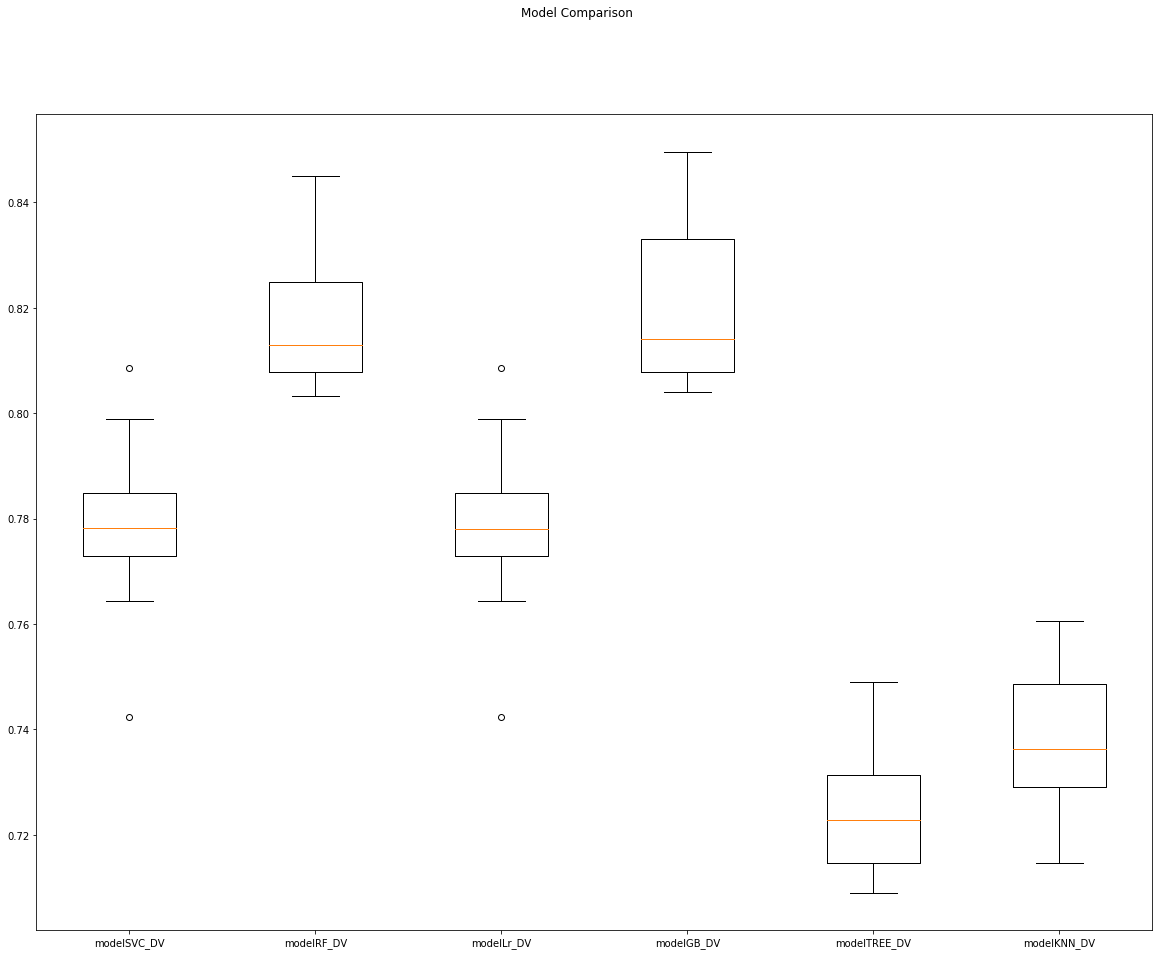

In [156]:
fig = plt.figure(figsize=(20,15))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome_DV)
ax.set_xticklabels(model_names_DV)
plt.show()

In [157]:
#### Top model is modelGB_DV

In [158]:
####################################################################################
# Model development -- Dummy Variables Scaled
####################################################################################

In [159]:
#Models
modelSVC_DV_S = SVC(gamma = 'scale')
modelRF_DV_S = RandomForestClassifier(n_estimators = 100)
modelLR_DV_S = LinearRegression()
modelLr_DV_S = LogisticRegression(solver='lbfgs', max_iter = 4000)
modelGB_DV_S = GradientBoostingClassifier()
modelTREE_DV_S = tree.DecisionTreeClassifier()
modelKNN_DV_S = KNeighborsClassifier(n_neighbors=3)

In [160]:
#SVR
modelSVC_DV_S.fit(X_train_DV_S,y_train_DV_S)
print(cross_val_score(modelSVC_DV_S, X_train_DV_S, y_train_DV_S)) 
modelSVC_DV_S.score(X_train_DV_S,y_train_DV_S)

[0.81190476 0.81357143 0.82333333 0.82452381 0.815     ]


0.8226666666666667

In [161]:
#Random Forest
modelRF_DV_S.fit(X_train_DV_S,y_train_DV_S)
print(cross_val_score(modelRF_DV_S, X_train_DV_S, y_train_DV_S))
modelRF_DV_S.score(X_train_DV_S,y_train_DV_S)

[0.80880952 0.8152381  0.81714286 0.81833333 0.81404762]


0.9992857142857143

In [162]:
#Linear Regression
modelLR_DV_S.fit(X_train_DV_S,y_train_DV_S)
print(cross_val_score(modelLR_DV_S, X_train_DV_S, y_train_DV_S))
modelLR_DV_S.score(X_train_DV_S,y_train_DV_S)

[0.18675766 0.20102976 0.21638574 0.22647433 0.20072838]


0.21895297121906165

In [163]:
#Logistic Regression
modelLr_DV_S.fit(X_train_DV_S,y_train_DV_S)
print(cross_val_score(modelLr_DV_S, X_train_DV_S, y_train_DV_S))
modelLr_DV_S.score(X_train_DV_S,y_train_DV_S)

[0.815      0.81761905 0.82047619 0.825      0.81666667]


0.8210952380952381

In [164]:
#Gradient Boosting
modelGB_DV_S.fit(X_train_DV_S,y_train_DV_S)
print(cross_val_score(modelGB_DV_S, X_train_DV_S, y_train_DV_S))
modelGB_DV_S.score(X_train_DV_S,y_train_DV_S)

[0.81238095 0.81619048 0.81928571 0.82357143 0.81809524]


0.8266666666666667

In [165]:
#Decision Tree
modelTREE_DV_S.fit(X_train_DV_S,y_train_DV_S)
print(cross_val_score(modelTREE_DV_S, X_train_DV_S, y_train_DV_S)) 
modelTREE_DV_S.score(X_train_DV_S,y_train_DV_S)

[0.72261905 0.72738095 0.74047619 0.7352381  0.72928571]


0.9992857142857143

In [166]:
#KNN
modelKNN_DV_S.fit(X_train_DV_S,y_train_DV_S)
print(cross_val_score(modelKNN_DV_S, X_train_DV_S, y_train_DV_S)) 
modelKNN_DV_S.score(X_train_DV_S,y_train_DV_S)

[0.77642857 0.76952381 0.775      0.77904762 0.77357143]


0.8674761904761905

In [167]:
####################################################################################
# Evaluating the Results -- Dummy Variables Scaled Dataframe
####################################################################################

In [168]:
#SVC
predictions_DV_S_SVC = modelSVC_DV_S.predict(X_test_DV_S)
accy_DV_S_SVC = accuracy_score(y_test_DV_S,predictions_DV_S_SVC)
KAPPA_DV_S_SVC = cohen_kappa_score(y_test_DV_S, predictions_DV_S_SVC)
ROC_DV_S_SVC = roc_auc_score(y_test_OOB,predictions_DV_S_SVC)
prec_DV_S_SVC = precision_score(y_test_OOB, predictions_DV_S_SVC)
rec_DV_S_SVC = recall_score(y_test_OOB,predictions_DV_S_SVC)
f1_DV_S_SVC = f1_score(y_test_OOB,predictions_DV_S_SVC)

model =  pd.DataFrame([['SVC', 'DV_S', accy_DV_S_SVC, KAPPA_DV_S_SVC, ROC_DV_S_SVC, prec_DV_S_SVC, rec_DV_S_SVC, f1_DV_S_SVC]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
30,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
4,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
5,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
6,GB,DV,0.819556,0.367425,0.654499,0.648352,0.363450,0.465789
7,RF,OOB_FS_S,0.816000,0.369719,0.659103,0.621870,0.382444,0.473617
8,RF,OOB_S,0.815333,0.365518,0.656820,0.620777,0.377310,0.469349


In [169]:
#Random Forest
predictions_DV_S_RF = modelRF_DV_S.predict(X_test_DV_S)
accy_DV_S_RF = accuracy_score(y_test_DV_S,predictions_DV_S_RF)
KAPPA_DV_S_RF = cohen_kappa_score(y_test_DV_S, predictions_DV_S_RF)
ROC_DV_S_RF = roc_auc_score(y_test_OOB,predictions_DV_S_RF)
prec_DV_S_RF = precision_score(y_test_OOB, predictions_DV_S_RF)
rec_DV_S_RF = recall_score(y_test_OOB,predictions_DV_S_RF)
f1_DV_S_RF = f1_score(y_test_OOB,predictions_DV_S_RF)

model =  pd.DataFrame([['RF', 'DV_S', accy_DV_S_RF, KAPPA_DV_S_RF, ROC_DV_S_RF, prec_DV_S_RF, rec_DV_S_RF, f1_DV_S_RF]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
5,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
6,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
7,GB,DV,0.819556,0.367425,0.654499,0.648352,0.363450,0.465789
31,RF,DV_S,0.817889,0.370893,0.658265,0.633305,0.376797,0.472481
8,RF,OOB_FS_S,0.816000,0.369719,0.659103,0.621870,0.382444,0.473617


In [170]:
#Logistic Regression
predictions_DV_S_Lr = modelLr_DV_S.predict(X_test_DV_S)
accy_DV_S_Lr = accuracy_score(y_test_DV_S,predictions_DV_S_Lr)
KAPPA_DV_S_Lr = cohen_kappa_score(y_test_DV_S, predictions_DV_S_Lr)
ROC_DV_S_Lr = roc_auc_score(y_test_OOB,predictions_DV_S_Lr)
prec_DV_S_Lr = precision_score(y_test_OOB, predictions_DV_S_Lr)
rec_DV_S_Lr = recall_score(y_test_OOB,predictions_DV_S_Lr)
f1_DV_S_Lr = f1_score(y_test_OOB,predictions_DV_S_Lr)

model =  pd.DataFrame([['Lr', 'DV_S', accy_DV_S_Lr, KAPPA_DV_S_Lr, ROC_DV_S_Lr, prec_DV_S_Lr, rec_DV_S_Lr, f1_DV_S_Lr]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
32,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
5,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
6,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
7,GB,DV,0.819556,0.367425,0.654499,0.648352,0.363450,0.465789
8,RF,DV_S,0.817889,0.370893,0.658265,0.633305,0.376797,0.472481


In [171]:
# Gradient Boosting
predictions_DV_S_GB = modelGB_DV_S.predict(X_test_DV_S)
accy_DV_S_GB = accuracy_score(y_test_DV_S,predictions_DV_S_GB)
KAPPA_DV_S_GB = cohen_kappa_score(y_test_DV_S, predictions_DV_S_GB)
ROC_DV_S_GB = roc_auc_score(y_test_OOB,predictions_DV_S_GB)
prec_DV_S_GB = precision_score(y_test_OOB, predictions_DV_S_GB)
rec_DV_S_GB = recall_score(y_test_OOB,predictions_DV_S_GB)
f1_DV_S_GB = f1_score(y_test_OOB,predictions_DV_S_GB)

model =  pd.DataFrame([['GB', 'DV_S', accy_DV_S_GB, KAPPA_DV_S_GB, ROC_DV_S_GB, prec_DV_S_GB, rec_DV_S_GB, f1_DV_S_GB]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
5,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
6,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
7,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
8,GB,DV,0.819556,0.367425,0.654499,0.648352,0.363450,0.465789
33,GB,DV_S,0.819556,0.367425,0.654499,0.648352,0.363450,0.465789


In [172]:
# Decision Tree
predictions_DV_S_tree = modelTREE_DV_S.predict(X_test_DV_S)
accy_DV_S_tree = accuracy_score(y_test_DV_S,predictions_DV_S_tree)
KAPPA_DV_S_tree = cohen_kappa_score(y_test_DV_S, predictions_DV_S_tree)
ROC_DV_S_tree = roc_auc_score(y_test_OOB,predictions_DV_S_tree)
prec_DV_S_tree = precision_score(y_test_OOB, predictions_DV_S_tree)
rec_DV_S_tree = recall_score(y_test_OOB,predictions_DV_S_tree)
f1_DV_S_tree = f1_score(y_test_OOB,predictions_DV_S_tree)

model =  pd.DataFrame([['Tree', 'DV_S', accy_DV_S_tree, KAPPA_DV_S_tree, ROC_DV_S_tree, prec_DV_S_tree, rec_DV_S_tree, f1_DV_S_tree]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
5,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
6,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
7,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
8,GB,DV,0.819556,0.367425,0.654499,0.648352,0.363450,0.465789
9,GB,DV_S,0.819556,0.367425,0.654499,0.648352,0.363450,0.465789


In [173]:
#KNN
predictions_DV_S_KNN = modelKNN_DV_S.predict(X_test_DV_S)
accy_DV_S_KNN = accuracy_score(y_test_DV_S,predictions_DV_S_KNN)
KAPPA_DV_S_KNN = cohen_kappa_score(y_test_DV_S, predictions_DV_S_KNN)
ROC_DV_S_KNN = roc_auc_score(y_test_OOB,predictions_DV_S_KNN)
prec_DV_S_KNN = precision_score(y_test_OOB, predictions_DV_S_KNN)
rec_DV_S_KNN = recall_score(y_test_OOB,predictions_DV_S_KNN)
f1_DV_S_KNN = f1_score(y_test_OOB,predictions_DV_S_KNN)

model =  pd.DataFrame([['KNN', 'DV_S', accy_DV_S_KNN, KAPPA_DV_S_KNN, ROC_DV_S_KNN, prec_DV_S_KNN, rec_DV_S_KNN, f1_DV_S_KNN]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results


,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
5,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
6,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
7,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
8,GB,DV,0.819556,0.367425,0.654499,0.648352,0.363450,0.465789
9,GB,DV_S,0.819556,0.367425,0.654499,0.648352,0.363450,0.465789


In [174]:
outcome_DV_S = []
model_names_DV_S = []
models_DV_S = [('modelSVC_DV_S', SVC(gamma = 'scale')),
              ('modelRF_DV_S', RandomForestClassifier(n_estimators = 100)),
              ('modelLr_DV_S', LogisticRegression(solver='lbfgs', max_iter = 4000)),
              ('modelGB_DV_S', GradientBoostingClassifier()),
              ('modelTREE_DV_S', tree.DecisionTreeClassifier()),
              ('modelKNN_DV_S', KNeighborsClassifier(n_neighbors=3))]

In [175]:
for model_name_DV_S, model_DV_S in models_DV_S:
    k_fold_validation = model_selection.KFold(n_splits=10)
    results_DV_S = model_selection.cross_val_score(model_DV_S, features_DV_S, depVar_DV_S, cv=k_fold_validation, scoring='accuracy')
    outcome_DV_S.append(results_DV_S)
    model_names_DV_S.append(model_name_DV_S)
    output_message_DV_S = "%s| Mean=%f STD=%f" % (model_name_DV_S, results_DV_S.mean(), results_DV_S.std())
    print(output_message_DV_S)

modelSVC_DV_S| Mean=0.819167 STD=0.013721
modelRF_DV_S| Mean=0.815833 STD=0.013210
modelLr_DV_S| Mean=0.820767 STD=0.014520
modelGB_DV_S| Mean=0.820567 STD=0.015103
modelTREE_DV_S| Mean=0.729700 STD=0.012079
modelKNN_DV_S| Mean=0.777333 STD=0.013848


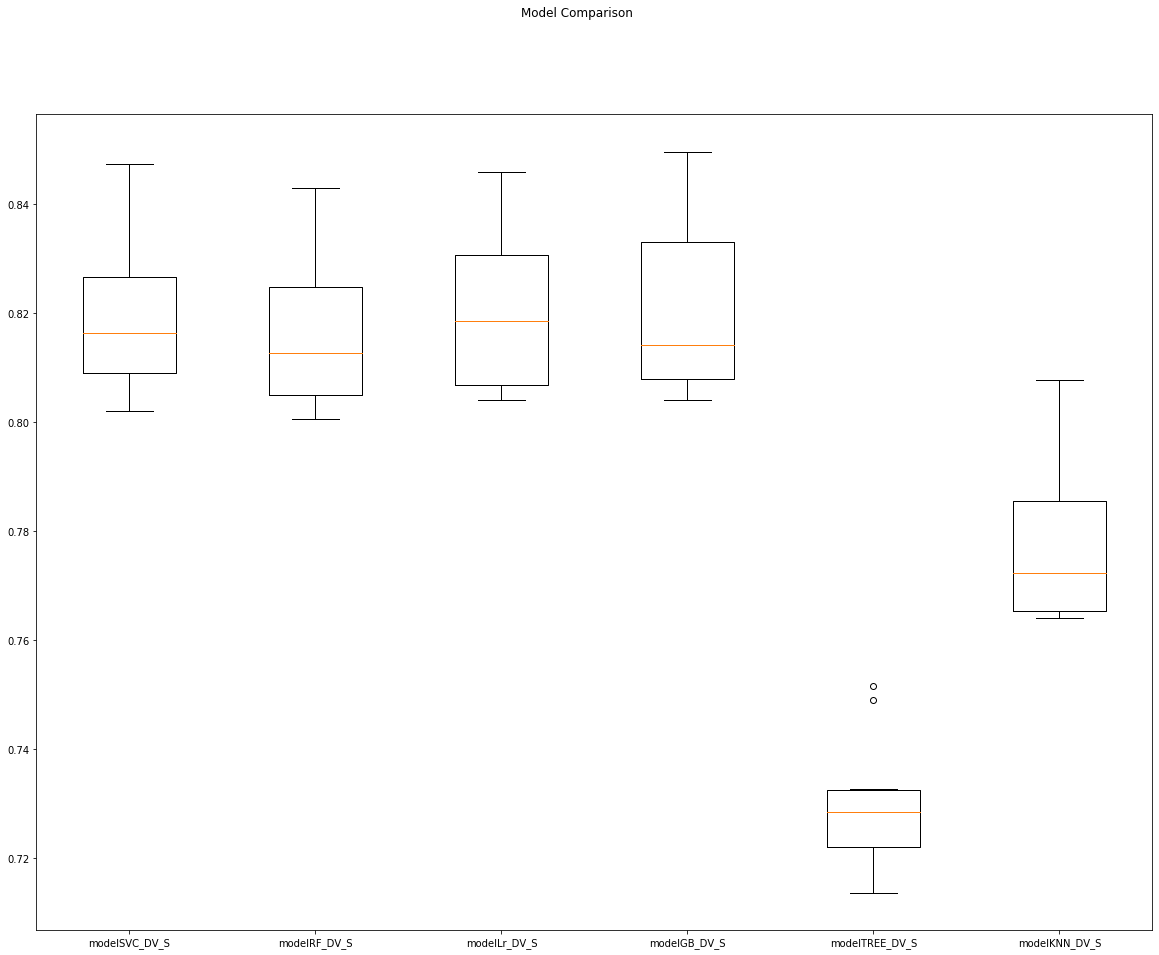

In [176]:
fig = plt.figure(figsize=(20,15))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome_DV_S)
ax.set_xticklabels(model_names_DV_S)
plt.show()

In [177]:
##### Top model is modelSVC_DV_S

In [178]:
####################################################################################
# Model development -- Dummy Variables Feature Selection
####################################################################################

In [179]:
#Models
modelSVC_DV_FS = SVC(gamma = 'scale')
modelRF_DV_FS = RandomForestClassifier(n_estimators = 100)
modelLR_DV_FS = LinearRegression()
modelLr_DV_FS = LogisticRegression(solver='lbfgs', max_iter = 4000)
modelGB_DV_FS = GradientBoostingClassifier()
modelTREE_DV_FS = tree.DecisionTreeClassifier()
modelKNN_DV_FS = KNeighborsClassifier(n_neighbors=3)

In [180]:
#SVR
modelSVC_DV_FS.fit(X_train_DV_FS,y_train_DV_FS)
print(cross_val_score(modelSVC_DV_FS, X_train_DV_FS, y_train_DV_FS)) 
modelSVC_DV_FS.score(X_train_DV_FS,y_train_DV_FS)

[0.77690476 0.77690476 0.77666667 0.77666667 0.77666667]


0.7768095238095238

In [181]:
#Random Forest
modelRF_DV_FS.fit(X_train_DV_FS,y_train_DV_FS)
print(cross_val_score(modelRF_DV_FS, X_train_DV_FS, y_train_DV_FS))
modelRF_DV_FS.score(X_train_DV_FS,y_train_DV_FS)

[0.8097619  0.81095238 0.81952381 0.81642857 0.81404762]


0.9992857142857143

In [182]:
#Linear Regression
modelLR_DV_FS.fit(X_train_DV_FS,y_train_DV_FS)
print(cross_val_score(modelLR_DV_FS, X_train_DV_FS, y_train_DV_FS))
modelLR_DV_FS.score(X_train_DV_FS,y_train_DV_FS)

[0.18652613 0.20089832 0.22106267 0.22793751 0.20076023]


0.21878632764547468

In [183]:
#Logistic Regression
modelLr_DV_FS.fit(X_train_DV_FS,y_train_DV_FS)
print(cross_val_score(modelLr_DV_FS, X_train_DV_FS, y_train_DV_FS))
modelLr_DV_FS.score(X_train_DV_FS,y_train_DV_FS)

[0.77690476 0.77666667 0.77666667 0.77642857 0.77666667]


0.7767142857142857

In [184]:
#Gradient Boosting
modelGB_DV_FS.fit(X_train_DV_FS,y_train_DV_FS)
print(cross_val_score(modelGB_DV_FS, X_train_DV_FS, y_train_DV_FS))
modelGB_DV_FS.score(X_train_DV_FS,y_train_DV_FS)

[0.81380952 0.81690476 0.81904762 0.8252381  0.81785714]


0.8274761904761905

In [185]:
#Decision Tree
modelTREE_DV_FS.fit(X_train_DV_FS,y_train_DV_FS)
print(cross_val_score(modelTREE_DV_FS, X_train_DV_FS, y_train_DV_FS)) 
modelTREE_DV_FS.score(X_train_DV_FS,y_train_DV_FS)

[0.71952381 0.73166667 0.73333333 0.71666667 0.72928571]


0.9992857142857143

In [186]:
#KNN
modelKNN_DV_FS.fit(X_train_DV_FS,y_train_DV_FS)
print(cross_val_score(modelKNN_DV_FS, X_train_DV_FS, y_train_DV_FS)) 
modelKNN_DV_FS.score(X_train_DV_FS,y_train_DV_FS)

[0.73547619 0.73738095 0.7352381  0.73333333 0.72642857]


0.8458095238095238

In [187]:
####################################################################################
# Evaluating the Results -- Dummy Variables Feature Selection Dataframe
####################################################################################

In [188]:
#SVC
predictions_DV_FS_SVC = modelSVC_DV_FS.predict(X_test_DV_FS)
accy_DV_FS_SVC = accuracy_score(y_test_DV_FS,predictions_DV_FS_SVC)
KAPPA_DV_FS_SVC = cohen_kappa_score(y_test_DV_FS, predictions_DV_FS_SVC)
ROC_DV_FS_SVC = roc_auc_score(y_test_OOB,predictions_DV_FS_SVC)
prec_DV_FS_SVC = precision_score(y_test_OOB, predictions_DV_FS_SVC)
rec_DV_FS_SVC = recall_score(y_test_OOB,predictions_DV_FS_SVC)
f1_DV_FS_SVC = f1_score(y_test_OOB,predictions_DV_FS_SVC)

model =  pd.DataFrame([['SVC', 'DV_FS', accy_DV_FS_SVC, KAPPA_DV_FS_SVC, ROC_DV_FS_SVC, prec_DV_FS_SVC, rec_DV_FS_SVC, f1_DV_FS_SVC]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

/Users/grantwisner/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
5,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
6,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
7,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
8,GB,DV,0.819556,0.367425,0.654499,0.648352,0.363450,0.465789
9,GB,DV_S,0.819556,0.367425,0.654499,0.648352,0.363450,0.465789


In [189]:
#Random Forest
predictions_DV_FS_RF = modelRF_DV_FS.predict(X_test_DV_FS)
accy_DV_FS_RF = accuracy_score(y_test_DV_FS,predictions_DV_FS_RF)
KAPPA_DV_FS_RF = cohen_kappa_score(y_test_DV_FS, predictions_DV_FS_RF)
ROC_DV_FS_RF = roc_auc_score(y_test_OOB,predictions_DV_FS_RF)
prec_DV_FS_RF = precision_score(y_test_OOB, predictions_DV_FS_RF)
rec_DV_FS_RF = recall_score(y_test_OOB,predictions_DV_FS_RF)
f1_DV_FS_RF = f1_score(y_test_OOB,predictions_DV_FS_RF)

model =  pd.DataFrame([['RF', 'DV_FS', accy_DV_FS_RF, KAPPA_DV_FS_RF, ROC_DV_FS_RF, prec_DV_FS_RF, rec_DV_FS_RF, f1_DV_FS_RF]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
5,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
6,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
7,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
8,GB,DV,0.819556,0.367425,0.654499,0.648352,0.363450,0.465789
9,GB,DV_S,0.819556,0.367425,0.654499,0.648352,0.363450,0.465789


In [190]:
#Logistic Regression
predictions_DV_FS_Lr = modelLr_DV_FS.predict(X_test_DV_FS)
accy_DV_FS_Lr = accuracy_score(y_test_DV_FS,predictions_DV_FS_Lr)
KAPPA_DV_FS_Lr = cohen_kappa_score(y_test_DV_FS, predictions_DV_FS_Lr)
ROC_DV_FS_Lr = roc_auc_score(y_test_OOB,predictions_DV_FS_Lr)
prec_DV_FS_Lr = precision_score(y_test_OOB, predictions_DV_FS_Lr)
rec_DV_FS_Lr = recall_score(y_test_OOB,predictions_DV_FS_Lr)
f1_DV_FS_Lr = f1_score(y_test_OOB,predictions_DV_FS_Lr)

model =  pd.DataFrame([['Lr', 'DV_FS', accy_DV_FS_Lr, KAPPA_DV_FS_Lr, ROC_DV_FS_Lr, prec_DV_FS_Lr, rec_DV_FS_Lr, f1_DV_FS_Lr]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

/Users/grantwisner/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
5,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
6,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
7,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
8,GB,DV,0.819556,0.367425,0.654499,0.648352,0.363450,0.465789
9,GB,DV_S,0.819556,0.367425,0.654499,0.648352,0.363450,0.465789


In [191]:
#Gradient Boosting
predictions_DV_FS_GB = modelGB_DV_FS.predict(X_test_DV_FS)
accy_DV_FS_GB = accuracy_score(y_test_DV_FS,predictions_DV_FS_GB)
KAPPA_DV_FS_GB = cohen_kappa_score(y_test_DV_FS, predictions_DV_FS_GB)
ROC_DV_FS_GB = roc_auc_score(y_test_OOB,predictions_DV_FS_GB)
prec_DV_FS_GB = precision_score(y_test_OOB, predictions_DV_FS_GB)
rec_DV_FS_GB = recall_score(y_test_OOB,predictions_DV_FS_GB)
f1_DV_FS_GB = f1_score(y_test_OOB,predictions_DV_FS_GB)

model =  pd.DataFrame([['GB', 'DV_FS', accy_DV_FS_GB, KAPPA_DV_FS_GB, ROC_DV_FS_GB, prec_DV_FS_GB, rec_DV_FS_GB, f1_DV_FS_GB]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
39,GB,DV_FS,0.821111,0.374261,0.657720,0.653358,0.369610,0.472131
4,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
5,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
6,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
7,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
8,GB,DV,0.819556,0.367425,0.654499,0.648352,0.363450,0.465789


In [192]:
#Decision Tree
predictions_DV_FS_tree = modelTREE_DV_FS.predict(X_test_DV_FS)
accy_DV_FS_tree = accuracy_score(y_test_DV_FS,predictions_DV_FS_tree)
KAPPA_DV_FS_tree = cohen_kappa_score(y_test_DV_FS, predictions_DV_FS_tree)
ROC_DV_FS_tree = roc_auc_score(y_test_OOB,predictions_DV_FS_tree)
prec_DV_FS_tree = precision_score(y_test_OOB, predictions_DV_FS_tree)
rec_DV_FS_tree = recall_score(y_test_OOB,predictions_DV_FS_tree)
f1_DV_FS_tree = f1_score(y_test_OOB,predictions_DV_FS_tree)

model =  pd.DataFrame([['Tree', 'DV_FS', accy_DV_FS_tree, KAPPA_DV_FS_tree, ROC_DV_FS_tree, prec_DV_FS_tree, rec_DV_FS_tree, f1_DV_FS_tree]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,DV_FS,0.821111,0.374261,0.657720,0.653358,0.369610,0.472131
5,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
6,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
7,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
8,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
9,GB,DV,0.819556,0.367425,0.654499,0.648352,0.363450,0.465789


In [193]:
#KNN
predictions_DV_FS_KNN = modelKNN_DV_FS.predict(X_test_DV_FS)
accy_DV_FS_KNN = accuracy_score(y_test_DV_FS,predictions_DV_FS_KNN)
KAPPA_DV_FS_KNN = cohen_kappa_score(y_test_DV_FS, predictions_DV_FS_KNN)
ROC_DV_FS_KNN = roc_auc_score(y_test_OOB,predictions_DV_FS_KNN)
prec_DV_FS_KNN = precision_score(y_test_OOB, predictions_DV_FS_KNN)
rec_DV_FS_KNN = recall_score(y_test_OOB,predictions_DV_FS_KNN)
f1_DV_FS_KNN = f1_score(y_test_OOB,predictions_DV_FS_KNN)

model =  pd.DataFrame([['KNN', 'DV_FS', accy_DV_FS_KNN, KAPPA_DV_FS_KNN, ROC_DV_FS_KNN, prec_DV_FS_KNN, rec_DV_FS_KNN, f1_DV_FS_KNN]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,DV_FS,0.821111,0.374261,0.657720,0.653358,0.369610,0.472131
5,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
6,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
7,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
8,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
9,GB,DV,0.819556,0.367425,0.654499,0.648352,0.363450,0.465789


In [194]:
outcome_DV_FS = []
model_names_DV_FS = []
models_DV_FS = [('modelSVC_DV_FS', SVC(gamma = 'scale')),
              ('modelRF_DV_FS', RandomForestClassifier(n_estimators = 100)),
              ('modelLr_DV_FS', LogisticRegression(solver='lbfgs', max_iter = 4000)),
              ('modelGB_DV_FS', GradientBoostingClassifier()),
              ('modelTREE_DV_FS', tree.DecisionTreeClassifier()),
              ('modelKNN_DV_FS', KNeighborsClassifier(n_neighbors=3))]

In [195]:
for model_name_DV_FS, model_DV_FS in models_DV_FS:
    k_fold_validation = model_selection.KFold(n_splits=10)
    results_DV_FS = model_selection.cross_val_score(model_DV_FS, features_DV_FS, depVar_DV_FS, cv=k_fold_validation, scoring='accuracy')
    outcome_DV_FS.append(results_DV_FS)
    model_names_DV_FS.append(model_name_DV_FS)
    output_message_DV_FS = "%s| Mean=%f STD=%f" % (model_name_DV_FS, results_DV_FS.mean(), results_DV_FS.std())
    print(output_message_DV_FS)

modelSVC_DV_FS| Mean=0.778800 STD=0.017234
modelRF_DV_FS| Mean=0.815867 STD=0.012131
modelLr_DV_FS| Mean=0.778733 STD=0.017159
modelGB_DV_FS| Mean=0.820600 STD=0.015065
modelTREE_DV_FS| Mean=0.726400 STD=0.009816
modelKNN_DV_FS| Mean=0.739067 STD=0.014470


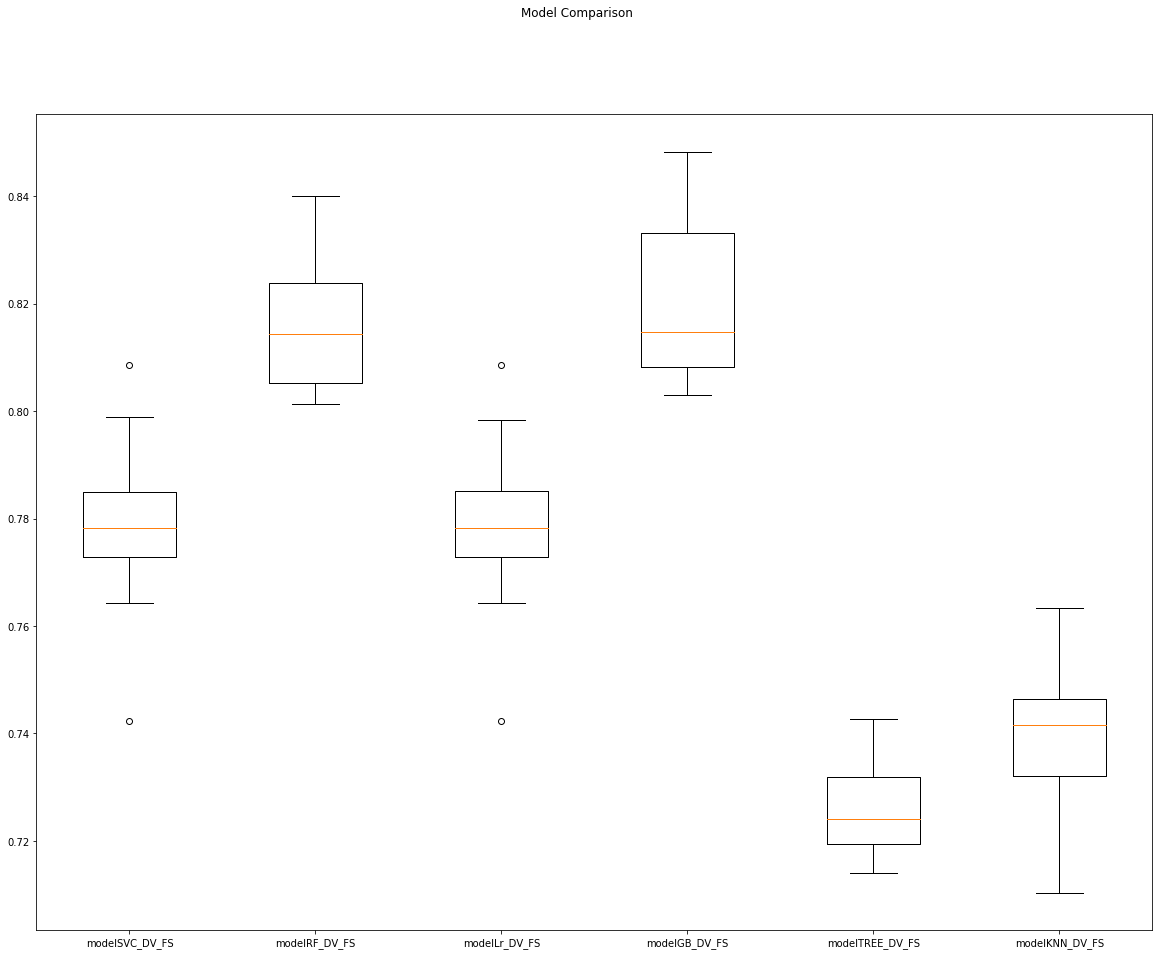

In [196]:
fig = plt.figure(figsize=(20,15))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome_DV_FS)
ax.set_xticklabels(model_names_DV_FS)
plt.show()

In [197]:
#### Top model for DV_FS is modelGB_DV_FS

In [198]:
####################################################################################
# Model development -- Dummy Variables Feature Selection Scaled
####################################################################################

In [199]:
#Models
modelSVC_DV_FS_S = SVC(gamma = 'scale')
modelRF_DV_FS_S = RandomForestClassifier(n_estimators = 100)
modelLR_DV_FS_S = LinearRegression()
modelLr_DV_FS_S = LogisticRegression(solver='lbfgs', max_iter = 4000)
modelGB_DV_FS_S = GradientBoostingClassifier()
modelTREE_DV_FS_S = tree.DecisionTreeClassifier()
modelKNN_DV_FS_S = KNeighborsClassifier(n_neighbors=3)

In [200]:
#SVR
modelSVC_DV_FS_S.fit(X_train_DV_FS_S,y_train_DV_FS_S)
print(cross_val_score(modelSVC_DV_FS_S, X_train_DV_FS_S, y_train_DV_FS_S)) 
modelSVC_DV_FS_S.score(X_train_DV_FS_S,y_train_DV_FS_S)

[0.81238095 0.81380952 0.82380952 0.8247619  0.81595238]


0.8234761904761905

In [201]:
#Random Forest
modelRF_DV_FS_S.fit(X_train_DV_FS_S,y_train_DV_FS_S)
print(cross_val_score(modelRF_DV_FS_S, X_train_DV_FS_S, y_train_DV_FS_S))
modelRF_DV_FS_S.score(X_train_DV_FS_S,y_train_DV_FS_S)

[0.80642857 0.81238095 0.82261905 0.82       0.81357143]


0.9992380952380953

In [202]:
#Linear Regression
modelLR_DV_FS_S.fit(X_train_DV_FS_S,y_train_DV_FS_S)
print(cross_val_score(modelLR_DV_FS_S, X_train_DV_FS_S, y_train_DV_FS_S))
modelLR_DV_FS_S.score(X_train_DV_FS_S,y_train_DV_FS_S)

[0.18652613 0.20089832 0.22106267 0.22793751 0.20076023]


0.21878632764547457

In [203]:
#Logistic Regression
modelLr_DV_FS_S.fit(X_train_DV_FS_S,y_train_DV_FS_S)
print(cross_val_score(modelLr_DV_FS_S, X_train_DV_FS_S, y_train_DV_FS_S))
modelLr_DV_FS_S.score(X_train_DV_FS_S,y_train_DV_FS_S)

[0.81571429 0.81785714 0.82047619 0.8247619  0.81714286]


0.8211904761904761

In [204]:
#Gradient Boosting
modelGB_DV_FS_S.fit(X_train_DV_FS_S,y_train_DV_FS_S)
print(cross_val_score(modelGB_DV_FS_S, X_train_DV_FS_S, y_train_DV_FS_S))
modelGB_DV_FS_S.score(X_train_DV_FS_S,y_train_DV_FS_S)

[0.81380952 0.81690476 0.81928571 0.8252381  0.81785714]


0.8274761904761905

In [205]:
#Decision Tree
modelTREE_DV_FS_S.fit(X_train_DV_FS_S,y_train_DV_FS_S)
print(cross_val_score(modelTREE_DV_FS_S, X_train_DV_FS_S, y_train_DV_FS_S)) 
modelTREE_DV_FS_S.score(X_train_DV_FS_S,y_train_DV_FS_S)

[0.72404762 0.72404762 0.73261905 0.72309524 0.72238095]


0.9992857142857143

In [206]:
#KNN
modelKNN_DV_FS_S.fit(X_train_DV_FS_S,y_train_DV_FS_S)
print(cross_val_score(modelKNN_DV_FS_S, X_train_DV_FS_S, y_train_DV_FS_S)) 
modelKNN_DV_FS_S.score(X_train_DV_FS_S,y_train_DV_FS_S)

[0.77428571 0.76809524 0.77928571 0.77785714 0.77309524]


0.867904761904762

In [207]:
####################################################################################
# Evaluating the Results -- Dummy Variables Feature Selection Scaled Dataframe
####################################################################################

In [208]:
#SVC
predictions_DV_FS_S_SVC = modelSVC_DV_FS_S.predict(X_test_DV_FS_S)
accy_DV_FS_S_SVC = accuracy_score(y_test_DV_FS_S,predictions_DV_FS_S_SVC)
KAPPA_DV_FS_S_SVC = cohen_kappa_score(y_test_DV_FS_S, predictions_DV_FS_S_SVC)
ROC_DV_FS_S_SVC = roc_auc_score(y_test_OOB,predictions_DV_FS_S_SVC)
prec_DV_FS_S_SVC = precision_score(y_test_OOB, predictions_DV_FS_S_SVC)
rec_DV_FS_S_SVC = recall_score(y_test_OOB,predictions_DV_FS_S_SVC)
f1_DV_FS_S_SVC = f1_score(y_test_OOB,predictions_DV_FS_S_SVC)

model =  pd.DataFrame([['SVC', 'DV_S_FS', accy_DV_FS_S_SVC, KAPPA_DV_FS_S_SVC, ROC_DV_FS_S_SVC, prec_DV_FS_S_SVC, rec_DV_FS_S_SVC, f1_DV_FS_S_SVC]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,DV_FS,0.821111,0.374261,0.657720,0.653358,0.369610,0.472131
42,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477
5,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
6,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
7,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
8,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351


In [209]:
#Random Forest
predictions_DV_FS_S_RF = modelRF_DV_FS_S.predict(X_test_DV_FS_S)
accy_DV_FS_S_RF = accuracy_score(y_test_DV_FS_S,predictions_DV_FS_S_RF)
KAPPA_DV_FS_S_RF = cohen_kappa_score(y_test_DV_FS_S, predictions_DV_FS_S_RF)
ROC_DV_FS_S_RF = roc_auc_score(y_test_OOB,predictions_DV_FS_S_RF)
prec_DV_FS_S_RF = precision_score(y_test_OOB, predictions_DV_FS_S_RF)
rec_DV_FS_S_RF = recall_score(y_test_OOB,predictions_DV_FS_S_RF)
f1_DV_FS_S_RF = f1_score(y_test_OOB,predictions_DV_FS_S_RF)

model =  pd.DataFrame([['RF', 'DV_S_FS', accy_DV_FS_S_RF, KAPPA_DV_FS_S_RF, ROC_DV_FS_S_RF, prec_DV_FS_S_RF, rec_DV_FS_S_RF, f1_DV_FS_S_RF]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,DV_FS,0.821111,0.374261,0.657720,0.653358,0.369610,0.472131
5,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477
6,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
7,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
8,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
9,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351


In [210]:
#Logistic Regression
predictions_DV_FS_S_Lr = modelLr_DV_FS_S.predict(X_test_DV_FS_S)
accy_DV_FS_S_Lr = accuracy_score(y_test_DV_FS_S,predictions_DV_FS_S_Lr)
KAPPA_DV_FS_S_Lr = cohen_kappa_score(y_test_DV_FS_S, predictions_DV_FS_S_Lr)
ROC_DV_FS_S_Lr = roc_auc_score(y_test_OOB,predictions_DV_FS_S_Lr)
prec_DV_FS_S_Lr = precision_score(y_test_OOB, predictions_DV_FS_S_Lr)
rec_DV_FS_S_Lr = recall_score(y_test_OOB,predictions_DV_FS_S_Lr)
f1_DV_FS_S_Lr = f1_score(y_test_OOB,predictions_DV_FS_S_Lr)

model =  pd.DataFrame([['Lr', 'DV_S_FS', accy_DV_FS_S_Lr, KAPPA_DV_FS_S_Lr, ROC_DV_FS_S_Lr, prec_DV_FS_S_Lr, rec_DV_FS_S_Lr, f1_DV_FS_S_Lr]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,DV_FS,0.821111,0.374261,0.657720,0.653358,0.369610,0.472131
5,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477
6,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
7,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
44,Lr,DV_S_FS,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
8,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913


In [211]:
#Gradient Boosting
predictions_DV_FS_S_GB = modelGB_DV_FS_S.predict(X_test_DV_FS_S)
accy_DV_FS_S_GB = accuracy_score(y_test_DV_FS_S,predictions_DV_FS_S_GB)
KAPPA_DV_FS_S_GB = cohen_kappa_score(y_test_DV_FS_S, predictions_DV_FS_S_GB)
ROC_DV_FS_S_GB = roc_auc_score(y_test_OOB,predictions_DV_FS_S_GB)
prec_DV_FS_S_GB = precision_score(y_test_OOB, predictions_DV_FS_S_GB)
rec_DV_FS_S_GB = recall_score(y_test_OOB,predictions_DV_FS_S_GB)
f1_DV_FS_S_GB = f1_score(y_test_OOB,predictions_DV_FS_S_GB)

model =  pd.DataFrame([['GB', 'DV_S_FS', accy_DV_FS_S_GB, KAPPA_DV_FS_S_GB, ROC_DV_FS_S_GB, prec_DV_FS_S_GB, rec_DV_FS_S_GB, f1_DV_FS_S_GB]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
45,GB,DV_S_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
4,GB,DV_FS,0.821111,0.374261,0.657720,0.653358,0.369610,0.472131
5,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477
6,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
7,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
8,Lr,DV_S_FS,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717


In [212]:
#Decision Tree
predictions_DV_FS_S_tree = modelTREE_DV_FS_S.predict(X_test_DV_FS_S)
accy_DV_FS_S_tree = accuracy_score(y_test_DV_FS_S,predictions_DV_FS_S_tree)
KAPPA_DV_FS_S_tree = cohen_kappa_score(y_test_DV_FS_S, predictions_DV_FS_S_tree)
ROC_DV_FS_S_tree = roc_auc_score(y_test_OOB,predictions_DV_FS_S_tree)
prec_DV_FS_S_tree = precision_score(y_test_OOB, predictions_DV_FS_S_tree)
rec_DV_FS_S_tree = recall_score(y_test_OOB,predictions_DV_FS_S_tree)
f1_DV_FS_S_tree = f1_score(y_test_OOB,predictions_DV_FS_S_tree)

model =  pd.DataFrame([['Tree', 'DV_S_FS', accy_DV_FS_S_tree, KAPPA_DV_FS_S_tree, ROC_DV_FS_S_tree, prec_DV_FS_S_tree, rec_DV_FS_S_tree, f1_DV_FS_S_tree]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,DV_S_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
5,GB,DV_FS,0.821111,0.374261,0.657720,0.653358,0.369610,0.472131
6,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477
7,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
8,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
9,Lr,DV_S_FS,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717


In [213]:
#KNN
predictions_DV_FS_S_KNN = modelKNN_DV_FS_S.predict(X_test_DV_FS_S)
accy_DV_FS_S_KNN = accuracy_score(y_test_DV_FS_S,predictions_DV_FS_S_KNN)
KAPPA_DV_FS_S_KNN = cohen_kappa_score(y_test_DV_FS_S, predictions_DV_FS_S_KNN)
ROC_DV_FS_S_KNN = roc_auc_score(y_test_OOB,predictions_DV_FS_S_KNN)
prec_DV_FS_S_KNN = precision_score(y_test_OOB, predictions_DV_FS_S_KNN)
rec_DV_FS_S_KNN = recall_score(y_test_OOB,predictions_DV_FS_S_KNN)
f1_DV_FS_S_KNN = f1_score(y_test_OOB,predictions_DV_FS_S_KNN)

model =  pd.DataFrame([['KNN', 'DV_S_FS', accy_DV_FS_S_KNN, KAPPA_DV_FS_S_KNN, ROC_DV_FS_S_KNN, prec_DV_FS_S_KNN, rec_DV_FS_S_KNN, f1_DV_FS_S_KNN]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,DV_S_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
5,GB,DV_FS,0.821111,0.374261,0.657720,0.653358,0.369610,0.472131
6,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477
7,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
8,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
9,Lr,DV_S_FS,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717


In [214]:
outcome_DV_FS_S = []
model_names_DV_FS_S = []
models_DV_FS_S = [('modelSVC_DV_FS_S', SVC(gamma = 'scale')),
              ('modelRF_DV_FS_S', RandomForestClassifier(n_estimators = 100)),
              ('modelLr_DV_FS_S', LogisticRegression(solver='lbfgs', max_iter = 4000)),
              ('modelGB_DV_FS_S', GradientBoostingClassifier()),
              ('modelTREE_DV_FS_S', tree.DecisionTreeClassifier()),
              ('modelKNN_DV_FS_S', KNeighborsClassifier(n_neighbors=3))]

In [215]:
for model_name_DV_FS_S, model_DV_FS_S in models_DV_FS_S:
    k_fold_validation = model_selection.KFold(n_splits=10)
    results_DV_FS_S = model_selection.cross_val_score(model_DV_FS_S, features_DV_FS_S, depVar_DV_FS_S, cv=k_fold_validation, scoring='accuracy')
    outcome_DV_FS_S.append(results_DV_FS_S)
    model_names_DV_FS_S.append(model_name_DV_FS_S)
    output_message_DV_FS_S = "%s| Mean=%f STD=%f" % (model_name_DV_FS_S, results_DV_FS_S.mean(), results_DV_FS_S.std())
    print(output_message_DV_FS_S)

modelSVC_DV_FS_S| Mean=0.818833 STD=0.013911
modelRF_DV_FS_S| Mean=0.816067 STD=0.013611
modelLr_DV_FS_S| Mean=0.820967 STD=0.014504
modelGB_DV_FS_S| Mean=0.820633 STD=0.015028
modelTREE_DV_FS_S| Mean=0.726800 STD=0.011321
modelKNN_DV_FS_S| Mean=0.778133 STD=0.013374


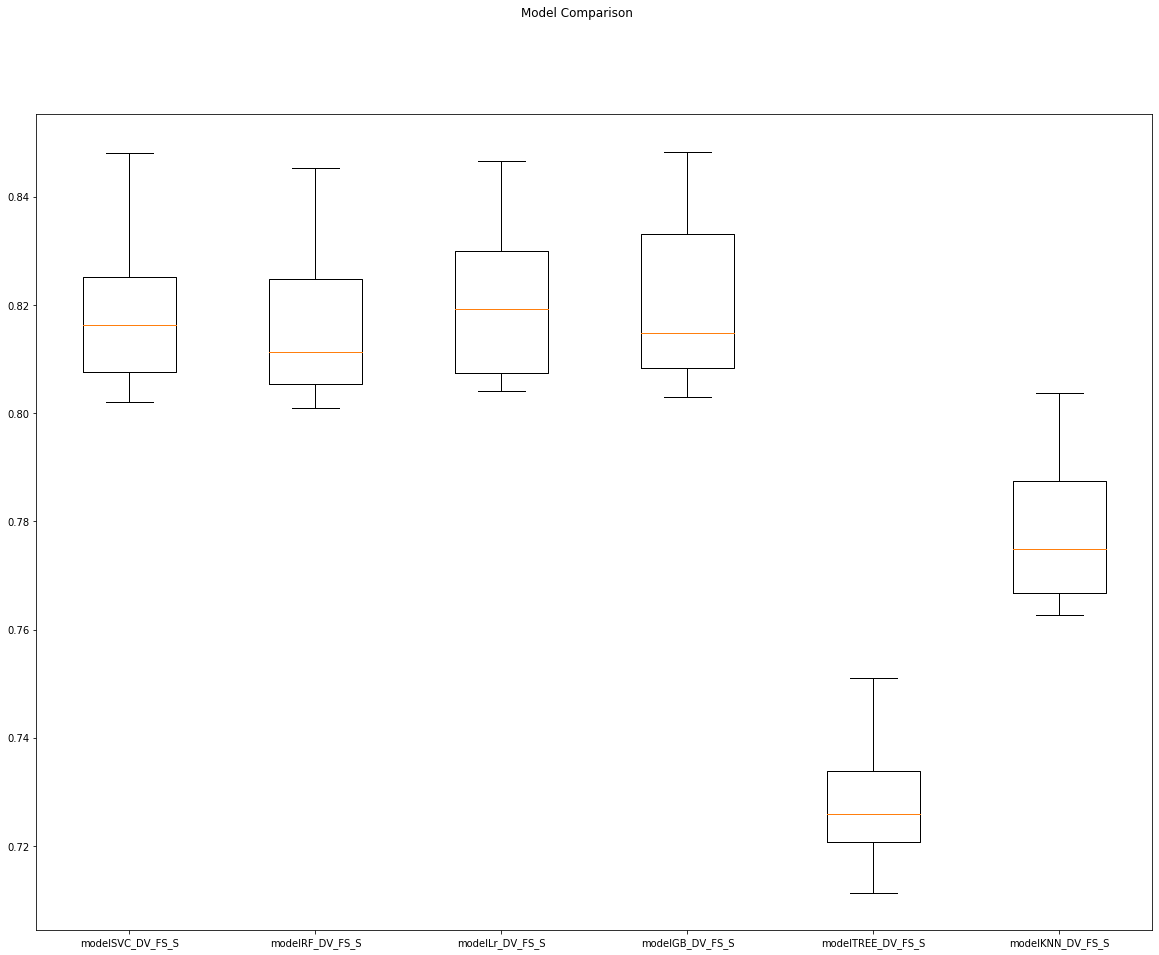

In [216]:
fig = plt.figure(figsize=(20,15))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome_DV_FS_S)
ax.set_xticklabels(model_names_DV_FS_S)
plt.show()

In [217]:
### Top model is modelGB_DV_FS_S

In [218]:
####################################################################################
# Model development -- OOB RFE
####################################################################################

In [219]:
#Models
modelSVC_OOB_RFE = SVC(gamma = 'scale')
modelRF_OOB_RFE = RandomForestClassifier(n_estimators = 100)
modelLR_OOB_RFE = LinearRegression()
modelLr_OOB_RFE = LogisticRegression(solver='lbfgs', max_iter = 4000)
modelGB_OOB_RFE = GradientBoostingClassifier()
modelTREE_OOB_RFE = tree.DecisionTreeClassifier()
modelKNN_OOB_RFE = KNeighborsClassifier(n_neighbors=3)

In [220]:
#SVR
modelSVC_OOB_RFE.fit(X_train_OOB_RFE,y_train_OOB_RFE)
print(cross_val_score(modelSVC_OOB_RFE, X_train_OOB_RFE, y_train_OOB_RFE)) 
modelSVC_OOB_RFE.score(X_train_OOB_RFE,y_train_OOB_RFE)

[0.77690476 0.77690476 0.77666667 0.77666667 0.77666667]


0.7767619047619048

In [221]:
#Random Forest
modelRF_OOB_RFE.fit(X_train_OOB_RFE,y_train_OOB_RFE)
print(cross_val_score(modelRF_OOB_RFE, X_train_OOB_RFE, y_train_OOB_RFE))
modelRF_OOB_RFE.score(X_train_OOB_RFE,y_train_OOB_RFE)

[0.79880952 0.8097619  0.81285714 0.81357143 0.805     ]


0.9881904761904762

In [222]:
#Linear Regression
modelLR_OOB_RFE.fit(X_train_OOB_RFE,y_train_OOB_RFE)
print(cross_val_score(modelLR_OOB_RFE, X_train_OOB_RFE, y_train_OOB_RFE))
modelLR_OOB_RFE.score(X_train_OOB_RFE,y_train_OOB_RFE)

[0.10691735 0.11602757 0.12788786 0.1331549  0.11899215]


0.12180443452463419

In [223]:
#Logistic Regression
modelLr_OOB_RFE.fit(X_train_OOB_RFE,y_train_OOB_RFE)
print(cross_val_score(modelLr_OOB_RFE, X_train_OOB_RFE, y_train_OOB_RFE))
modelLr_OOB_RFE.score(X_train_OOB_RFE,y_train_OOB_RFE)

[0.77690476 0.77690476 0.77666667 0.77666667 0.77666667]


0.7767619047619048

In [224]:
#Gradient Boosting
modelGB_OOB_RFE.fit(X_train_OOB_RFE,y_train_OOB_RFE)
print(cross_val_score(modelGB_OOB_RFE, X_train_OOB_RFE, y_train_OOB_RFE))
modelGB_OOB_RFE.score(X_train_OOB_RFE,y_train_OOB_RFE)

[0.81428571 0.81547619 0.82190476 0.82714286 0.82095238]


0.8249047619047619

In [225]:
#Decision Tree
modelTREE_OOB_RFE.fit(X_train_OOB_RFE,y_train_OOB_RFE)
print(cross_val_score(modelTREE_OOB_RFE, X_train_OOB_RFE, y_train_OOB_RFE)) 
modelTREE_OOB_RFE.score(X_train_OOB_RFE,y_train_OOB_RFE)

[0.7297619  0.73738095 0.72619048 0.72952381 0.73238095]


0.9883333333333333

In [226]:
#KNN
modelKNN_OOB_RFE.fit(X_train_OOB_RFE,y_train_OOB_RFE)
print(cross_val_score(modelKNN_OOB_RFE, X_train_OOB_RFE, y_train_OOB_RFE)) 
modelKNN_OOB_RFE.score(X_train_OOB_RFE,y_train_OOB_RFE)

[0.73357143 0.73261905 0.73738095 0.7347619  0.73      ]


0.8392380952380952

In [227]:
####################################################################################
# Evaluating the Results -- OOB RFE
####################################################################################

In [228]:
#SVC
predictions_OOB_RFE_SVC = modelSVC_OOB_RFE.predict(X_test_OOB_RFE)
accy_OOB_RFE_SVC = accuracy_score(y_test_OOB_RFE,predictions_OOB_RFE_SVC)
KAPPA_OOB_RFE_SVC = cohen_kappa_score(y_test_OOB_RFE, predictions_OOB_RFE_SVC)
ROC_OOB_RFE_SVC = roc_auc_score(y_test_OOB,predictions_OOB_RFE_SVC)
prec_OOB_RFE_SVC = precision_score(y_test_OOB, predictions_OOB_RFE_SVC)
rec_OOB_RFE_SVC = recall_score(y_test_OOB,predictions_OOB_RFE_SVC)
f1_OOB_RFE_SVC = f1_score(y_test_OOB,predictions_OOB_RFE_SVC)

model =  pd.DataFrame([['SVC', 'OOB_RFE', accy_OOB_RFE_SVC, KAPPA_OOB_RFE_SVC, ROC_OOB_RFE_SVC, prec_OOB_RFE_SVC, rec_OOB_RFE_SVC, f1_OOB_RFE_SVC]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

/Users/grantwisner/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,DV_S_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
5,GB,DV_FS,0.821111,0.374261,0.657720,0.653358,0.369610,0.472131
6,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477
7,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
8,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
9,Lr,DV_S_FS,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717


In [229]:
#Random Forest
predictions_OOB_RFE_RF = modelRF_OOB_RFE.predict(X_test_OOB_RFE)
accy_OOB_RFE_RF = accuracy_score(y_test_OOB_RFE,predictions_OOB_RFE_RF)
KAPPA_OOB_RFE_RF = cohen_kappa_score(y_test_OOB_RFE, predictions_OOB_RFE_RF)
ROC_OOB_RFE_RF = roc_auc_score(y_test_OOB,predictions_OOB_RFE_RF)
prec_OOB_RFE_RF = precision_score(y_test_OOB, predictions_OOB_RFE_RF)
rec_OOB_RFE_RF = recall_score(y_test_OOB,predictions_OOB_RFE_RF)
f1_OOB_RFE_RF = f1_score(y_test_OOB,predictions_OOB_RFE_RF)

model =  pd.DataFrame([['RF', 'OOB_RFE', accy_OOB_RFE_RF, KAPPA_OOB_RFE_RF, ROC_OOB_RFE_RF, prec_OOB_RFE_RF, rec_OOB_RFE_RF, f1_OOB_RFE_RF]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,DV_S_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
5,GB,DV_FS,0.821111,0.374261,0.657720,0.653358,0.369610,0.472131
6,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477
7,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
8,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
9,Lr,DV_S_FS,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717


In [230]:
#Logistic Regression
predictions_OOB_RFE_Lr = modelLr_OOB_RFE.predict(X_test_OOB_RFE)
accy_OOB_RFE_Lr = accuracy_score(y_test_OOB_RFE,predictions_OOB_RFE_Lr)
KAPPA_OOB_RFE_Lr = cohen_kappa_score(y_test_OOB_RFE, predictions_OOB_RFE_Lr)
ROC_OOB_RFE_Lr = roc_auc_score(y_test_OOB,predictions_OOB_RFE_Lr)
prec_OOB_RFE_Lr = precision_score(y_test_OOB, predictions_OOB_RFE_Lr)
rec_OOB_RFE_Lr = recall_score(y_test_OOB,predictions_OOB_RFE_Lr)
f1_OOB_RFE_Lr = f1_score(y_test_OOB,predictions_OOB_RFE_Lr)

model =  pd.DataFrame([['Lr', 'OOB_RFE', accy_OOB_RFE_Lr, KAPPA_OOB_RFE_Lr, ROC_OOB_RFE_Lr, prec_OOB_RFE_Lr, rec_OOB_RFE_Lr, f1_OOB_RFE_Lr]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

/Users/grantwisner/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,DV_S_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
5,GB,DV_FS,0.821111,0.374261,0.657720,0.653358,0.369610,0.472131
6,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477
7,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
8,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
9,Lr,DV_S_FS,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717


In [231]:
#Gradient Boosting
predictions_OOB_RFE_GB = modelGB_OOB_RFE.predict(X_test_OOB_RFE)
accy_OOB_RFE_GB = accuracy_score(y_test_OOB_RFE,predictions_OOB_RFE_GB)
KAPPA_OOB_RFE_GB = cohen_kappa_score(y_test_OOB_RFE, predictions_OOB_RFE_GB)
ROC_OOB_RFE_GB = roc_auc_score(y_test_OOB,predictions_OOB_RFE_GB)
prec_OOB_RFE_GB = precision_score(y_test_OOB, predictions_OOB_RFE_GB)
rec_OOB_RFE_GB = recall_score(y_test_OOB,predictions_OOB_RFE_GB)
f1_OOB_RFE_GB = f1_score(y_test_OOB,predictions_OOB_RFE_GB)

model =  pd.DataFrame([['GB', 'OOB_RFE', accy_OOB_RFE_GB, KAPPA_OOB_RFE_GB, ROC_OOB_RFE_GB, prec_OOB_RFE_GB, rec_OOB_RFE_GB, f1_OOB_RFE_GB]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
51,GB,OOB_RFE,0.821222,0.376984,0.659463,0.651475,0.374230,0.475383
4,GB,DV_S_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
5,GB,DV_FS,0.821111,0.374261,0.657720,0.653358,0.369610,0.472131
6,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477
7,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
8,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717


In [232]:
#Decision Tree
predictions_OOB_RFE_tree = modelTREE_OOB_RFE.predict(X_test_OOB_RFE)
accy_OOB_RFE_tree = accuracy_score(y_test_OOB_RFE,predictions_OOB_RFE_tree)
KAPPA_OOB_RFE_tree = cohen_kappa_score(y_test_OOB_RFE, predictions_OOB_RFE_tree)
ROC_OOB_RFE_tree = roc_auc_score(y_test_OOB,predictions_OOB_RFE_tree)
prec_OOB_RFE_tree = precision_score(y_test_OOB, predictions_OOB_RFE_tree)
rec_OOB_RFE_tree = recall_score(y_test_OOB,predictions_OOB_RFE_tree)
f1_OOB_RFE_tree = f1_score(y_test_OOB,predictions_OOB_RFE_tree)

model =  pd.DataFrame([['Tree', 'OOB_RFE', accy_OOB_RFE_tree, KAPPA_OOB_RFE_tree, ROC_OOB_RFE_tree, prec_OOB_RFE_tree, rec_OOB_RFE_tree, f1_OOB_RFE_tree]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE,0.821222,0.376984,0.659463,0.651475,0.374230,0.475383
5,GB,DV_S_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
6,GB,DV_FS,0.821111,0.374261,0.657720,0.653358,0.369610,0.472131
7,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477
8,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
9,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717


In [233]:
#KNN
predictions_OOB_RFE_KNN = modelKNN_OOB_RFE.predict(X_test_OOB_RFE)
accy_OOB_RFE_KNN = accuracy_score(y_test_OOB_RFE,predictions_OOB_RFE_KNN)
KAPPA_OOB_RFE_KNN = cohen_kappa_score(y_test_OOB_RFE, predictions_OOB_RFE_KNN)
ROC_OOB_RFE_KNN = roc_auc_score(y_test_OOB,predictions_OOB_RFE_KNN)
prec_OOB_RFE_KNN = precision_score(y_test_OOB, predictions_OOB_RFE_KNN)
rec_OOB_RFE_KNN = recall_score(y_test_OOB,predictions_OOB_RFE_KNN)
f1_OOB_RFE_KNN = f1_score(y_test_OOB,predictions_OOB_RFE_KNN)

model =  pd.DataFrame([['KNN', 'OOB_RFE', accy_OOB_RFE_KNN, KAPPA_OOB_RFE_KNN, ROC_OOB_RFE_KNN, prec_OOB_RFE_KNN, rec_OOB_RFE_KNN, f1_OOB_RFE_KNN]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE,0.821222,0.376984,0.659463,0.651475,0.374230,0.475383
5,GB,DV_S_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
6,GB,DV_FS,0.821111,0.374261,0.657720,0.653358,0.369610,0.472131
7,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477
8,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
9,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717


In [234]:
outcome_OOB_RFE = []
model_names_OOB_RFE = []
models_OOB_RFE = [('modelSVC_OOB_RFE', SVC(gamma = 'scale')),
              ('modelRF_OOB_RFE', RandomForestClassifier(n_estimators = 100)),
              ('modelLr_OOB_RFE', LogisticRegression(solver='lbfgs', max_iter = 4000)),
              ('modelGB_OOB_RFE', GradientBoostingClassifier()),
              ('modelTREE_OOB_RFE', tree.DecisionTreeClassifier()),
              ('modelKNN_OOB_RFE', KNeighborsClassifier(n_neighbors=3))]

In [235]:
for model_name_OOB_RFE, model_OOB_RFE in models_OOB_RFE:
    k_fold_validation = model_selection.KFold(n_splits=10)
    results_OOB_RFE = model_selection.cross_val_score(model_OOB_RFE, features_OOB_RFE, depVar_OOB_RFE, cv=k_fold_validation, scoring='accuracy')
    outcome_OOB_RFE.append(results_OOB_RFE)
    model_names_OOB_RFE.append(model_name_OOB_RFE)
    output_message_OOB_RFE = "%s| Mean=%f STD=%f" % (model_name_OOB_RFE, results_OOB_RFE.mean(), results_OOB_RFE.std())
    print(output_message_OOB_RFE)

modelSVC_OOB_RFE| Mean=0.778800 STD=0.017234
modelRF_OOB_RFE| Mean=0.809333 STD=0.014784
modelLr_OOB_RFE| Mean=0.780867 STD=0.017532
modelGB_OOB_RFE| Mean=0.821333 STD=0.013821
modelTREE_OOB_RFE| Mean=0.729400 STD=0.017018
modelKNN_OOB_RFE| Mean=0.735833 STD=0.015771


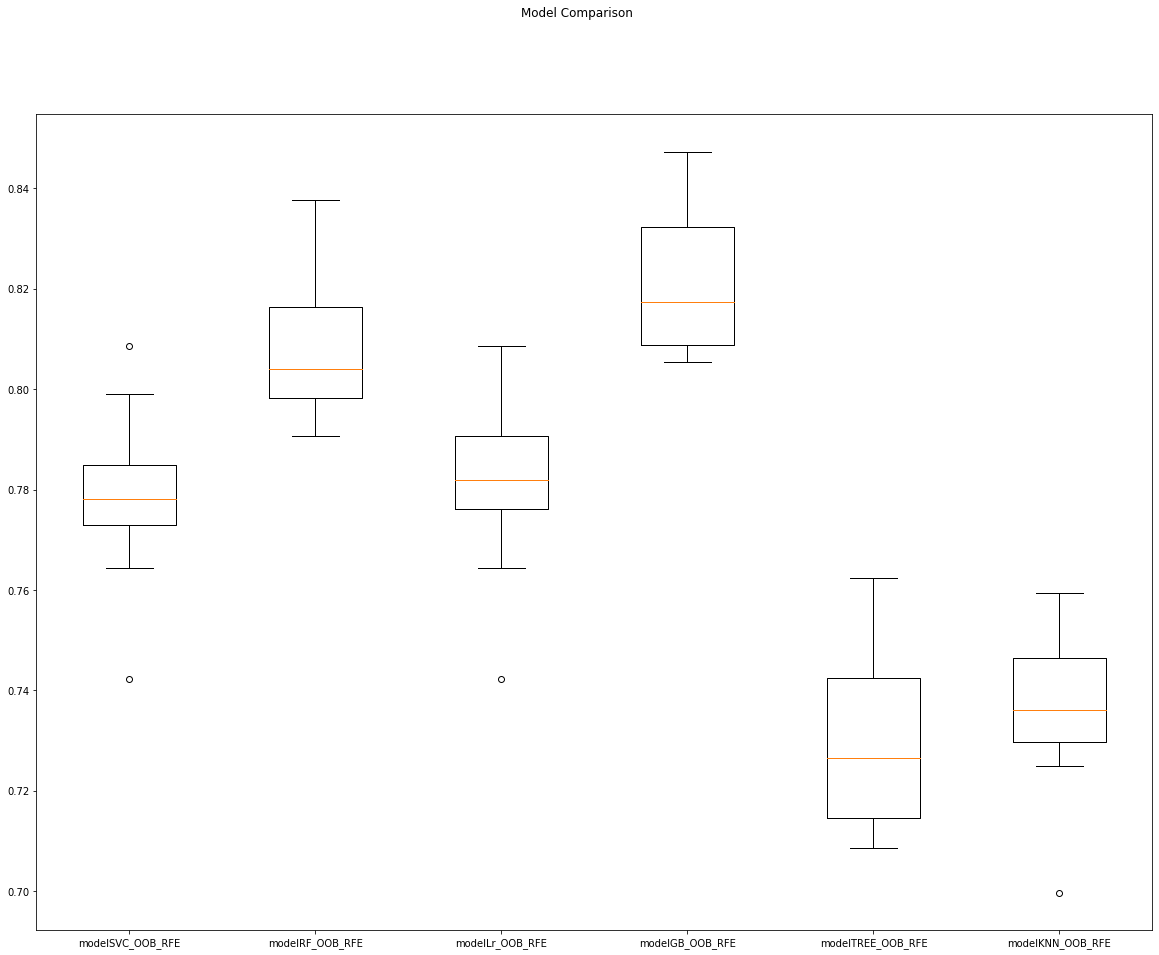

In [236]:
fig = plt.figure(figsize=(20,15))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome_OOB_RFE)
ax.set_xticklabels(model_names_OOB_RFE)
plt.show()

In [237]:
# Top Model overall is modelGB_OOB_RFE

In [238]:
####################################################################################
# Model development -- OOB RFE Scaled
####################################################################################

In [42]:
#Models
modelSVC_OOB_RFE_S = SVC(gamma = 'scale')
modelRF_OOB_RFE_S = RandomForestClassifier(n_estimators = 100)
modelLR_OOB_RFE_S = LinearRegression()
modelLr_OOB_RFE_S = LogisticRegression(solver='lbfgs', max_iter = 4000)
modelGB_OOB_RFE_S = GradientBoostingClassifier()
modelTREE_OOB_RFE_S = tree.DecisionTreeClassifier()
modelKNN_OOB_RFE_S = KNeighborsClassifier(n_neighbors=3)

In [43]:
#SVR
modelSVC_OOB_RFE_S.fit(X_train_OOB_RFE_S,y_train_OOB_RFE_S)
print(cross_val_score(modelSVC_OOB_RFE_S, X_train_OOB_RFE_S, y_train_OOB_RFE_S)) 
modelSVC_OOB_RFE_S.score(X_train_OOB_RFE_S,y_train_OOB_RFE_S)

[0.81190476 0.81809524 0.82428571 0.82571429 0.82047619]


0.8236190476190476

In [241]:
#Random Forest
modelRF_OOB_RFE_S.fit(X_train_OOB_RFE_S,y_train_OOB_RFE_S)
print(cross_val_score(modelRF_OOB_RFE_S, X_train_OOB_RFE_S, y_train_OOB_RFE_S))
modelRF_OOB_RFE_S.score(X_train_OOB_RFE_S,y_train_OOB_RFE_S)

[0.80047619 0.8102381  0.8097619  0.81119048 0.80452381]


0.9882380952380952

In [242]:
#Linear Regression
modelLR_OOB_RFE_S.fit(X_train_OOB_RFE_S,y_train_OOB_RFE_S)
print(cross_val_score(modelLR_OOB_RFE_S, X_train_OOB_RFE_S, y_train_OOB_RFE_S))
modelLR_OOB_RFE_S.score(X_train_OOB_RFE_S,y_train_OOB_RFE_S)

[0.10691735 0.11602757 0.12788786 0.1331549  0.11899215]


0.12180443452463419

In [243]:
#Logistic Regression
modelLr_OOB_RFE_S.fit(X_train_OOB_RFE_S,y_train_OOB_RFE_S)
print(cross_val_score(modelLr_OOB_RFE_S, X_train_OOB_RFE_S, y_train_OOB_RFE_S))
modelLr_OOB_RFE_S.score(X_train_OOB_RFE_S,y_train_OOB_RFE_S)

[0.80714286 0.80619048 0.8097619  0.81       0.80547619]


0.8082857142857143

In [244]:
#Gradient Boosting
modelGB_OOB_RFE_S.fit(X_train_OOB_RFE_S,y_train_OOB_RFE_S)
print(cross_val_score(modelGB_OOB_RFE_S, X_train_OOB_RFE_S, y_train_OOB_RFE_S))
modelGB_OOB_RFE_S.score(X_train_OOB_RFE_S,y_train_OOB_RFE_S)

[0.81428571 0.81571429 0.82190476 0.82690476 0.82095238]


0.8249047619047619

In [245]:
#Decision Tree
modelTREE_OOB_RFE_S.fit(X_train_OOB_RFE_S,y_train_OOB_RFE_S)
print(cross_val_score(modelTREE_OOB_RFE_S, X_train_OOB_RFE_S, y_train_OOB_RFE_S)) 
modelTREE_OOB_RFE_S.score(X_train_OOB_RFE_S,y_train_OOB_RFE_S)

[0.73380952 0.73452381 0.72857143 0.72785714 0.72833333]


0.9883333333333333

In [246]:
#KNN
modelKNN_OOB_RFE_S.fit(X_train_OOB_RFE_S,y_train_OOB_RFE_S)
print(cross_val_score(modelKNN_OOB_RFE_S, X_train_OOB_RFE_S, y_train_OOB_RFE_S)) 
modelKNN_OOB_RFE_S.score(X_train_OOB_RFE_S,y_train_OOB_RFE_S)

[0.7702381  0.77214286 0.79142857 0.77547619 0.77714286]


0.86

In [247]:
####################################################################################
# Evaluating the Results -- OOB RFE Scaled
####################################################################################

In [248]:
#SVC
predictions_OOB_RFE_S_SVC = modelSVC_OOB_RFE_S.predict(X_test_OOB_RFE_S)
accy_OOB_RFE_S_SVC = accuracy_score(y_test_OOB_RFE_S,predictions_OOB_RFE_S_SVC)
KAPPA_OOB_RFE_S_SVC = cohen_kappa_score(y_test_OOB_RFE_S, predictions_OOB_RFE_S_SVC)
ROC_OOB_RFE_S_SVC = roc_auc_score(y_test_OOB,predictions_OOB_RFE_S_SVC)
prec_OOB_RFE_S_SVC = precision_score(y_test_OOB, predictions_OOB_RFE_S_SVC)
rec_OOB_RFE_S_SVC = recall_score(y_test_OOB,predictions_OOB_RFE_S_SVC)
f1_OOB_RFE_S_SVC = f1_score(y_test_OOB,predictions_OOB_RFE_S_SVC)

model =  pd.DataFrame([['SVC', 'OOB_RFE_S', accy_OOB_RFE_S_SVC, KAPPA_OOB_RFE_S_SVC, ROC_OOB_RFE_S_SVC, prec_OOB_RFE_S_SVC, rec_OOB_RFE_S_SVC, f1_OOB_RFE_S_SVC]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE,0.821222,0.376984,0.659463,0.651475,0.374230,0.475383
5,GB,DV_S_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
6,GB,DV_FS,0.821111,0.374261,0.657720,0.653358,0.369610,0.472131
54,SVC,OOB_RFE_S,0.821000,0.367036,0.653005,0.660019,0.356776,0.463179
7,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477
8,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151


In [249]:
#Random Forest
predictions_OOB_RFE_S_RF = modelRF_OOB_RFE_S.predict(X_test_OOB_RFE_S)
accy_OOB_RFE_S_RF = accuracy_score(y_test_OOB_RFE_S,predictions_OOB_RFE_S_RF)
KAPPA_OOB_RFE_S_RF = cohen_kappa_score(y_test_OOB_RFE_S, predictions_OOB_RFE_S_RF)
ROC_OOB_RFE_S_RF = roc_auc_score(y_test_OOB,predictions_OOB_RFE_S_RF)
prec_OOB_RFE_S_RF = precision_score(y_test_OOB, predictions_OOB_RFE_S_RF)
rec_OOB_RFE_S_RF = recall_score(y_test_OOB,predictions_OOB_RFE_S_RF)
f1_OOB_RFE_S_RF = f1_score(y_test_OOB,predictions_OOB_RFE_S_RF)

model =  pd.DataFrame([['RF', 'OOB_RFE_S', accy_OOB_RFE_S_RF, KAPPA_OOB_RFE_S_RF, ROC_OOB_RFE_S_RF, prec_OOB_RFE_S_RF, rec_OOB_RFE_S_RF, f1_OOB_RFE_S_RF]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE,0.821222,0.376984,0.659463,0.651475,0.374230,0.475383
5,GB,DV_S_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
6,GB,DV_FS,0.821111,0.374261,0.657720,0.653358,0.369610,0.472131
7,SVC,OOB_RFE_S,0.821000,0.367036,0.653005,0.660019,0.356776,0.463179
8,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477
9,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151


In [250]:
#Logistic Regression
predictions_OOB_RFE_S_Lr = modelLr_OOB_RFE_S.predict(X_test_OOB_RFE_S)
accy_OOB_RFE_S_Lr = accuracy_score(y_test_OOB_RFE_S,predictions_OOB_RFE_S_Lr)
KAPPA_OOB_RFE_S_Lr = cohen_kappa_score(y_test_OOB_RFE_S, predictions_OOB_RFE_S_Lr)
ROC_OOB_RFE_S_Lr = roc_auc_score(y_test_OOB,predictions_OOB_RFE_S_Lr)
prec_OOB_RFE_S_Lr = precision_score(y_test_OOB, predictions_OOB_RFE_S_Lr)
rec_OOB_RFE_S_Lr = recall_score(y_test_OOB,predictions_OOB_RFE_S_Lr)
f1_OOB_RFE_S_Lr = f1_score(y_test_OOB,predictions_OOB_RFE_S_Lr)

model =  pd.DataFrame([['Lr', 'OOB_RFE_S', accy_OOB_RFE_S_Lr, KAPPA_OOB_RFE_S_Lr, ROC_OOB_RFE_S_Lr, prec_OOB_RFE_S_Lr, rec_OOB_RFE_S_Lr, f1_OOB_RFE_S_Lr]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE,0.821222,0.376984,0.659463,0.651475,0.374230,0.475383
5,GB,DV_S_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
6,GB,DV_FS,0.821111,0.374261,0.657720,0.653358,0.369610,0.472131
7,SVC,OOB_RFE_S,0.821000,0.367036,0.653005,0.660019,0.356776,0.463179
8,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477
9,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151


In [251]:
#Gradient Boosting
predictions_OOB_RFE_S_GB = modelGB_OOB_RFE_S.predict(X_test_OOB_RFE_S)
accy_OOB_RFE_S_GB = accuracy_score(y_test_OOB_RFE_S,predictions_OOB_RFE_S_GB)
KAPPA_OOB_RFE_S_GB = cohen_kappa_score(y_test_OOB_RFE_S, predictions_OOB_RFE_S_GB)
ROC_OOB_RFE_S_GB = roc_auc_score(y_test_OOB,predictions_OOB_RFE_S_GB)
prec_OOB_RFE_S_GB = precision_score(y_test_OOB, predictions_OOB_RFE_S_GB)
rec_OOB_RFE_S_GB = recall_score(y_test_OOB,predictions_OOB_RFE_S_GB)
f1_OOB_RFE_S_GB = f1_score(y_test_OOB,predictions_OOB_RFE_S_GB)

model =  pd.DataFrame([['GB', 'OOB_RFE_S', accy_OOB_RFE_S_GB, KAPPA_OOB_RFE_S_GB, ROC_OOB_RFE_S_GB, prec_OOB_RFE_S_GB, rec_OOB_RFE_S_GB, f1_OOB_RFE_S_GB]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
57,GB,OOB_RFE_S,0.821333,0.377234,0.659534,0.652057,0.374230,0.475538
4,GB,OOB_RFE,0.821222,0.376984,0.659463,0.651475,0.374230,0.475383
5,GB,DV_S_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
6,GB,DV_FS,0.821111,0.374261,0.657720,0.653358,0.369610,0.472131
7,SVC,OOB_RFE_S,0.821000,0.367036,0.653005,0.660019,0.356776,0.463179
8,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477


In [252]:
#Decision Tree
predictions_OOB_RFE_S_tree = modelTREE_OOB_RFE_S.predict(X_test_OOB_RFE_S)
accy_OOB_RFE_S_tree = accuracy_score(y_test_OOB_RFE_S,predictions_OOB_RFE_S_tree)
KAPPA_OOB_RFE_S_tree = cohen_kappa_score(y_test_OOB_RFE_S, predictions_OOB_RFE_S_tree)
ROC_OOB_RFE_S_tree = roc_auc_score(y_test_OOB,predictions_OOB_RFE_S_tree)
prec_OOB_RFE_S_tree = precision_score(y_test_OOB, predictions_OOB_RFE_S_tree)
rec_OOB_RFE_S_tree = recall_score(y_test_OOB,predictions_OOB_RFE_S_tree)
f1_OOB_RFE_S_tree = f1_score(y_test_OOB,predictions_OOB_RFE_S_tree)

model =  pd.DataFrame([['Tree', 'OOB_RFE_S', accy_OOB_RFE_S_tree, KAPPA_OOB_RFE_S_tree, ROC_OOB_RFE_S_tree, prec_OOB_RFE_S_tree, rec_OOB_RFE_S_tree, f1_OOB_RFE_S_tree]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE_S,0.821333,0.377234,0.659534,0.652057,0.374230,0.475538
5,GB,OOB_RFE,0.821222,0.376984,0.659463,0.651475,0.374230,0.475383
6,GB,DV_S_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
7,GB,DV_FS,0.821111,0.374261,0.657720,0.653358,0.369610,0.472131
8,SVC,OOB_RFE_S,0.821000,0.367036,0.653005,0.660019,0.356776,0.463179
9,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477


In [253]:
#KNN
predictions_OOB_RFE_S_KNN = modelKNN_OOB_RFE_S.predict(X_test_OOB_RFE_S)
accy_OOB_RFE_S_KNN = accuracy_score(y_test_OOB_RFE_S,predictions_OOB_RFE_S_KNN)
KAPPA_OOB_RFE_S_KNN = cohen_kappa_score(y_test_OOB_RFE_S, predictions_OOB_RFE_S_KNN)
ROC_OOB_RFE_S_KNN = roc_auc_score(y_test_OOB,predictions_OOB_RFE_S_KNN)
prec_OOB_RFE_S_KNN = precision_score(y_test_OOB, predictions_OOB_RFE_S_KNN)
rec_OOB_RFE_S_KNN = recall_score(y_test_OOB,predictions_OOB_RFE_S_KNN)
f1_OOB_RFE_S_KNN = f1_score(y_test_OOB,predictions_OOB_RFE_S_KNN)

model =  pd.DataFrame([['KNN', 'OOB_RFE_S', accy_OOB_RFE_S_KNN, KAPPA_OOB_RFE_S_KNN, ROC_OOB_RFE_S_KNN, prec_OOB_RFE_S_KNN, rec_OOB_RFE_S_KNN, f1_OOB_RFE_S_KNN]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE_S,0.821333,0.377234,0.659534,0.652057,0.374230,0.475538
5,GB,OOB_RFE,0.821222,0.376984,0.659463,0.651475,0.374230,0.475383
6,GB,DV_S_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
7,GB,DV_FS,0.821111,0.374261,0.657720,0.653358,0.369610,0.472131
8,SVC,OOB_RFE_S,0.821000,0.367036,0.653005,0.660019,0.356776,0.463179
9,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477


In [254]:
outcome_OOB_RFE_S = []
model_names_OOB_RFE_S = []
models_OOB_RFE_S = [('modelSVC_OOB_RFE_S', SVC(gamma = 'scale')),
              ('modelRF_OOB_RFE_S', RandomForestClassifier(n_estimators = 100)),
              ('modelLr_OOB_RFE_S', LogisticRegression(solver='lbfgs', max_iter = 4000)),
              ('modelGB_OOB_RFE_S', GradientBoostingClassifier()),
              ('modelTREE_OOB_RFE_S', tree.DecisionTreeClassifier()),
              ('modelKNN_OOB_RFE_S', KNeighborsClassifier(n_neighbors=3))]

In [255]:
for model_name_OOB_RFE_S, model_OOB_RFE_S in models_OOB_RFE_S:
    k_fold_validation = model_selection.KFold(n_splits=10)
    results_OOB_RFE_S = model_selection.cross_val_score(model_OOB_RFE_S, features_OOB_RFE_S, depVar_OOB_RFE_S, cv=k_fold_validation, scoring='accuracy')
    outcome_OOB_RFE_S.append(results_OOB_RFE_S)
    model_names_OOB_RFE_S.append(model_name_OOB_RFE_S)
    output_message_OOB_RFE_S = "%s| Mean=%f STD=%f" % (model_name_OOB_RFE_S, results_OOB_RFE_S.mean(), results_OOB_RFE_S.std())
    print(output_message_OOB_RFE_S)

modelSVC_OOB_RFE_S| Mean=0.820833 STD=0.013912
modelRF_OOB_RFE_S| Mean=0.808700 STD=0.015071
modelLr_OOB_RFE_S| Mean=0.808633 STD=0.013121
modelGB_OOB_RFE_S| Mean=0.821333 STD=0.013821
modelTREE_OOB_RFE_S| Mean=0.727367 STD=0.016918
modelKNN_OOB_RFE_S| Mean=0.779133 STD=0.012807


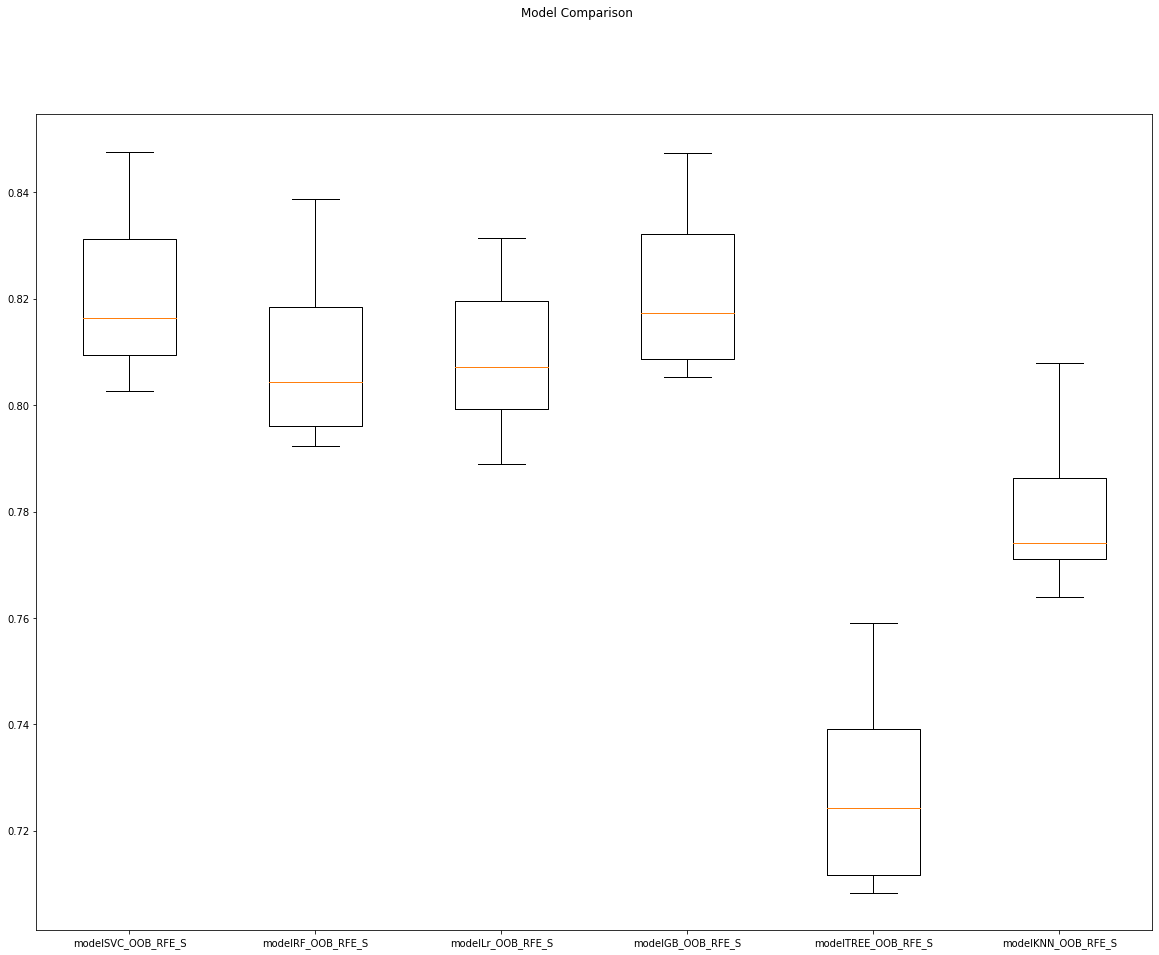

In [256]:
fig = plt.figure(figsize=(20,15))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome_OOB_RFE_S)
ax.set_xticklabels(model_names_OOB_RFE_S)
plt.show()

In [257]:
# Top model is modelGB_OOB_RFE_S

In [258]:
####################################################################################
# Model development -- DV RFE
####################################################################################

In [259]:
#Models
modelSVC_DV_RFE = SVC(gamma = 'scale')
modelRF_DV_RFE = RandomForestClassifier(n_estimators = 100)
modelLR_DV_RFE = LinearRegression()
modelLr_DV_RFE = LogisticRegression(solver='lbfgs', max_iter = 4000)
modelGB_DV_RFE = GradientBoostingClassifier()
modelTREE_DV_RFE = tree.DecisionTreeClassifier()
modelKNN_DV_RFE = KNeighborsClassifier(n_neighbors=3)

In [260]:
#SVR
modelSVC_DV_RFE.fit(X_train_DV_RFE,y_train_DV_RFE)
print(cross_val_score(modelSVC_DV_RFE, X_train_DV_RFE, y_train_DV_RFE)) 
modelSVC_DV_RFE.score(X_train_DV_RFE,y_train_DV_RFE)

[0.77690476 0.77690476 0.77666667 0.77666667 0.77666667]


0.7767619047619048

In [261]:
#Random Forest
modelRF_DV_RFE.fit(X_train_DV_RFE,y_train_DV_RFE)
print(cross_val_score(modelRF_DV_RFE, X_train_DV_RFE, y_train_DV_RFE))
modelRF_DV_RFE.score(X_train_DV_RFE,y_train_DV_RFE)

[0.79380952 0.7997619  0.80809524 0.8052381  0.80190476]


0.9843333333333333

In [262]:
#Linear Regression
modelLR_DV_RFE.fit(X_train_DV_RFE,y_train_DV_RFE)
print(cross_val_score(modelLR_DV_RFE, X_train_DV_RFE, y_train_DV_RFE))
modelLR_DV_RFE.score(X_train_DV_RFE,y_train_DV_RFE)

[0.172717   0.17989272 0.20328127 0.21338843 0.18291357]


0.19204396497832799

In [263]:
#Logistic Regression
modelLr_DV_RFE.fit(X_train_DV_RFE,y_train_DV_RFE)
print(cross_val_score(modelLr_DV_RFE, X_train_DV_RFE, y_train_DV_RFE))
modelLr_DV_RFE.score(X_train_DV_RFE,y_train_DV_RFE)

[0.77690476 0.77690476 0.77666667 0.77666667 0.77666667]


0.7767619047619048

In [264]:
#Gradient Boosting
modelGB_DV_RFE.fit(X_train_DV_RFE,y_train_DV_RFE)
print(cross_val_score(modelGB_DV_RFE, X_train_DV_RFE, y_train_DV_RFE))
modelGB_DV_RFE.score(X_train_DV_RFE,y_train_DV_RFE)

[0.81428571 0.81309524 0.82047619 0.82380952 0.81928571]


0.822952380952381

In [265]:
#Decision Tree
modelTREE_DV_RFE.fit(X_train_DV_RFE,y_train_DV_RFE)
print(cross_val_score(modelTREE_DV_RFE, X_train_DV_RFE, y_train_DV_RFE)) 
modelTREE_DV_RFE.score(X_train_DV_RFE,y_train_DV_RFE)

[0.72738095 0.72404762 0.72857143 0.72785714 0.72      ]


0.9843809523809524

In [266]:
#KNN
modelKNN_DV_RFE.fit(X_train_DV_RFE,y_train_DV_RFE)
print(cross_val_score(modelKNN_DV_RFE, X_train_DV_RFE, y_train_DV_RFE)) 
modelKNN_DV_RFE.score(X_train_DV_RFE,y_train_DV_RFE)

[0.73619048 0.73142857 0.73404762 0.74333333 0.72785714]


0.8354761904761905

In [267]:
####################################################################################
# Evaluating the Results -- DV RFE
####################################################################################

In [268]:
#SVC
predictions_DV_RFE_SVC = modelSVC_DV_RFE.predict(X_test_DV_RFE)
accy_DV_RFE_SVC = accuracy_score(y_test_DV_RFE,predictions_DV_RFE_SVC)
KAPPA_DV_RFE_SVC = cohen_kappa_score(y_test_DV_RFE, predictions_DV_RFE_SVC)
ROC_DV_RFE_SVC = roc_auc_score(y_test_DV,predictions_DV_RFE_SVC)
prec_DV_RFE_SVC = precision_score(y_test_DV, predictions_DV_RFE_SVC)
rec_DV_RFE_SVC = recall_score(y_test_DV,predictions_DV_RFE_SVC)
f1_DV_RFE_SVC = f1_score(y_test_DV,predictions_DV_RFE_SVC)

model =  pd.DataFrame([['SVC', 'DV_RFE', accy_DV_RFE_SVC, KAPPA_DV_RFE_SVC, ROC_DV_RFE_SVC, prec_DV_RFE_SVC, rec_DV_RFE_SVC, f1_DV_RFE_SVC]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

/Users/grantwisner/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE_S,0.821333,0.377234,0.659534,0.652057,0.374230,0.475538
...,...,...,...,...,...,...,...,...
55,Tree,DV_S,0.725556,0.210541,0.607891,0.374640,0.400411,0.387097
56,Tree,DV_FS,0.725111,0.212688,0.609465,0.375119,0.405544,0.389739
57,Tree,DV_S_FS,0.725000,0.209086,0.607165,0.373500,0.399384,0.386008
58,Tree,OOB_RFE_S,0.724778,0.208160,0.606652,0.372898,0.398357,0.385207


In [269]:
#Random Forest
predictions_DV_RFE_RF = modelRF_DV_RFE.predict(X_test_DV_RFE)
accy_DV_RFE_RF = accuracy_score(y_test_DV_RFE,predictions_DV_RFE_RF)
KAPPA_DV_RFE_RF = cohen_kappa_score(y_test_DV_RFE, predictions_DV_RFE_RF)
ROC_DV_RFE_RF = roc_auc_score(y_test_DV,predictions_DV_RFE_RF)
prec_DV_RFE_RF = precision_score(y_test_DV, predictions_DV_RFE_RF)
rec_DV_RFE_RF = recall_score(y_test_DV,predictions_DV_RFE_RF)
f1_DV_RFE_RF = f1_score(y_test_DV,predictions_DV_RFE_RF)

model =  pd.DataFrame([['RF', 'DV_RFE', accy_DV_RFE_RF, KAPPA_DV_RFE_RF, ROC_DV_RFE_RF, prec_DV_RFE_RF, rec_DV_RFE_RF, f1_DV_RFE_RF]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE_S,0.821333,0.377234,0.659534,0.652057,0.374230,0.475538
...,...,...,...,...,...,...,...,...
56,Tree,DV_S,0.725556,0.210541,0.607891,0.374640,0.400411,0.387097
57,Tree,DV_FS,0.725111,0.212688,0.609465,0.375119,0.405544,0.389739
58,Tree,DV_S_FS,0.725000,0.209086,0.607165,0.373500,0.399384,0.386008
59,Tree,OOB_RFE_S,0.724778,0.208160,0.606652,0.372898,0.398357,0.385207


In [270]:
#Logistic Regression
predictions_DV_RFE_Lr = modelLr_DV_RFE.predict(X_test_DV_RFE)
accy_DV_RFE_Lr = accuracy_score(y_test_DV_RFE,predictions_DV_RFE_Lr)
KAPPA_DV_RFE_Lr = cohen_kappa_score(y_test_DV_RFE, predictions_DV_RFE_Lr)
ROC_DV_RFE_Lr = roc_auc_score(y_test_DV,predictions_DV_RFE_Lr)
prec_DV_RFE_Lr = precision_score(y_test_DV, predictions_DV_RFE_Lr)
rec_DV_RFE_Lr = recall_score(y_test_DV,predictions_DV_RFE_Lr)
f1_DV_RFE_Lr = f1_score(y_test_DV,predictions_DV_RFE_Lr)

model =  pd.DataFrame([['Lr', 'DV_RFE', accy_DV_RFE_Lr, KAPPA_DV_RFE_Lr, ROC_DV_RFE_Lr, prec_DV_RFE_Lr, rec_DV_RFE_Lr, f1_DV_RFE_Lr]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

/Users/grantwisner/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE_S,0.821333,0.377234,0.659534,0.652057,0.374230,0.475538
...,...,...,...,...,...,...,...,...
57,Tree,DV_S,0.725556,0.210541,0.607891,0.374640,0.400411,0.387097
58,Tree,DV_FS,0.725111,0.212688,0.609465,0.375119,0.405544,0.389739
59,Tree,DV_S_FS,0.725000,0.209086,0.607165,0.373500,0.399384,0.386008
60,Tree,OOB_RFE_S,0.724778,0.208160,0.606652,0.372898,0.398357,0.385207


In [271]:
#Gradient Boosting
predictions_DV_RFE_GB = modelGB_DV_RFE.predict(X_test_DV_RFE)
accy_DV_RFE_GB = accuracy_score(y_test_DV_RFE,predictions_DV_RFE_GB)
KAPPA_DV_RFE_GB = cohen_kappa_score(y_test_DV_RFE, predictions_DV_RFE_GB)
ROC_DV_RFE_GB = roc_auc_score(y_test_DV,predictions_DV_RFE_GB)
prec_DV_RFE_GB = precision_score(y_test_DV, predictions_DV_RFE_GB)
rec_DV_RFE_GB = recall_score(y_test_DV,predictions_DV_RFE_GB)
f1_DV_RFE_GB = f1_score(y_test_DV,predictions_DV_RFE_GB)

model =  pd.DataFrame([['GB', 'DV_RFE', accy_DV_RFE_GB, KAPPA_DV_RFE_GB, ROC_DV_RFE_GB, prec_DV_RFE_GB, rec_DV_RFE_GB, f1_DV_RFE_GB]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE_S,0.821333,0.377234,0.659534,0.652057,0.374230,0.475538
...,...,...,...,...,...,...,...,...
58,Tree,DV_S,0.725556,0.210541,0.607891,0.374640,0.400411,0.387097
59,Tree,DV_FS,0.725111,0.212688,0.609465,0.375119,0.405544,0.389739
60,Tree,DV_S_FS,0.725000,0.209086,0.607165,0.373500,0.399384,0.386008
61,Tree,OOB_RFE_S,0.724778,0.208160,0.606652,0.372898,0.398357,0.385207


In [272]:
#Decision Tree
predictions_DV_RFE_tree = modelTREE_DV_RFE.predict(X_test_DV_RFE)
accy_DV_RFE_tree = accuracy_score(y_test_DV_RFE,predictions_DV_RFE_tree)
KAPPA_DV_RFE_tree = cohen_kappa_score(y_test_DV_RFE, predictions_DV_RFE_tree)
ROC_DV_RFE_tree = roc_auc_score(y_test_DV,predictions_DV_RFE_tree)
prec_DV_RFE_tree = precision_score(y_test_DV, predictions_DV_RFE_tree)
rec_DV_RFE_tree = recall_score(y_test_DV,predictions_DV_RFE_tree)
f1_DV_RFE_tree = f1_score(y_test_DV,predictions_DV_RFE_tree)

model =  pd.DataFrame([['Tree', 'DV_RFE', accy_DV_RFE_tree, KAPPA_DV_RFE_tree, ROC_DV_RFE_tree, prec_DV_RFE_tree, rec_DV_RFE_tree, f1_DV_RFE_tree]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE_S,0.821333,0.377234,0.659534,0.652057,0.374230,0.475538
...,...,...,...,...,...,...,...,...
59,Tree,DV_S,0.725556,0.210541,0.607891,0.374640,0.400411,0.387097
60,Tree,DV_FS,0.725111,0.212688,0.609465,0.375119,0.405544,0.389739
61,Tree,DV_S_FS,0.725000,0.209086,0.607165,0.373500,0.399384,0.386008
62,Tree,OOB_RFE_S,0.724778,0.208160,0.606652,0.372898,0.398357,0.385207


In [273]:
#KNN
predictions_DV_RFE_KNN = modelKNN_DV_RFE.predict(X_test_DV_RFE)
accy_DV_RFE_KNN = accuracy_score(y_test_DV_RFE,predictions_DV_RFE_KNN)
KAPPA_DV_RFE_KNN = cohen_kappa_score(y_test_DV_RFE, predictions_DV_RFE_KNN)
ROC_DV_RFE_KNN = roc_auc_score(y_test_DV,predictions_DV_RFE_KNN)
prec_DV_RFE_KNN = precision_score(y_test_DV, predictions_DV_RFE_KNN)
rec_DV_RFE_KNN = recall_score(y_test_DV,predictions_DV_RFE_KNN)
f1_DV_RFE_KNN = f1_score(y_test_DV,predictions_DV_RFE_KNN)

model =  pd.DataFrame([['KNN', 'DV_RFE', accy_DV_RFE_KNN, KAPPA_DV_RFE_KNN, ROC_DV_RFE_KNN, prec_DV_RFE_KNN, rec_DV_RFE_KNN, f1_DV_RFE_KNN]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE_S,0.821333,0.377234,0.659534,0.652057,0.374230,0.475538
...,...,...,...,...,...,...,...,...
60,Tree,DV_S,0.725556,0.210541,0.607891,0.374640,0.400411,0.387097
61,Tree,DV_FS,0.725111,0.212688,0.609465,0.375119,0.405544,0.389739
62,Tree,DV_S_FS,0.725000,0.209086,0.607165,0.373500,0.399384,0.386008
63,Tree,OOB_RFE_S,0.724778,0.208160,0.606652,0.372898,0.398357,0.385207


In [274]:
outcome_DV_RFE = []
model_names_DV_RFE = []
models_DV_RFE = [('modelSVC_DV_RFE', SVC(gamma = 'scale')),
              ('modelRF_DV_RFE', RandomForestClassifier(n_estimators = 100)),
              ('modelLr_DV_RFE', LogisticRegression(solver='lbfgs', max_iter = 4000)),
              ('modelGB_DV_RFE', GradientBoostingClassifier()),
              ('modelTREE_DV_RFE', tree.DecisionTreeClassifier()),
              ('modelKNN_DV_RFE', KNeighborsClassifier(n_neighbors=3))]

In [275]:
for model_name_DV_RFE, model_DV_RFE in models_DV_RFE:
    k_fold_validation = model_selection.KFold(n_splits=10)
    results_DV_RFE = model_selection.cross_val_score(model_DV_RFE, features_DV_RFE, depVar_DV_RFE, cv=k_fold_validation, scoring='accuracy')
    outcome_DV_RFE.append(results_DV_RFE)
    model_names_DV_RFE.append(model_name_DV_RFE)
    output_message_DV_RFE = "%s| Mean=%f STD=%f" % (model_name_DV_RFE, results_DV_RFE.mean(), results_DV_RFE.std())
    print(output_message_DV_RFE)

modelSVC_DV_RFE| Mean=0.778800 STD=0.017234
modelRF_DV_RFE| Mean=0.802367 STD=0.017134
modelLr_DV_RFE| Mean=0.781100 STD=0.021955
modelGB_DV_RFE| Mean=0.819800 STD=0.014428
modelTREE_DV_RFE| Mean=0.732333 STD=0.014906
modelKNN_DV_RFE| Mean=0.733267 STD=0.015619


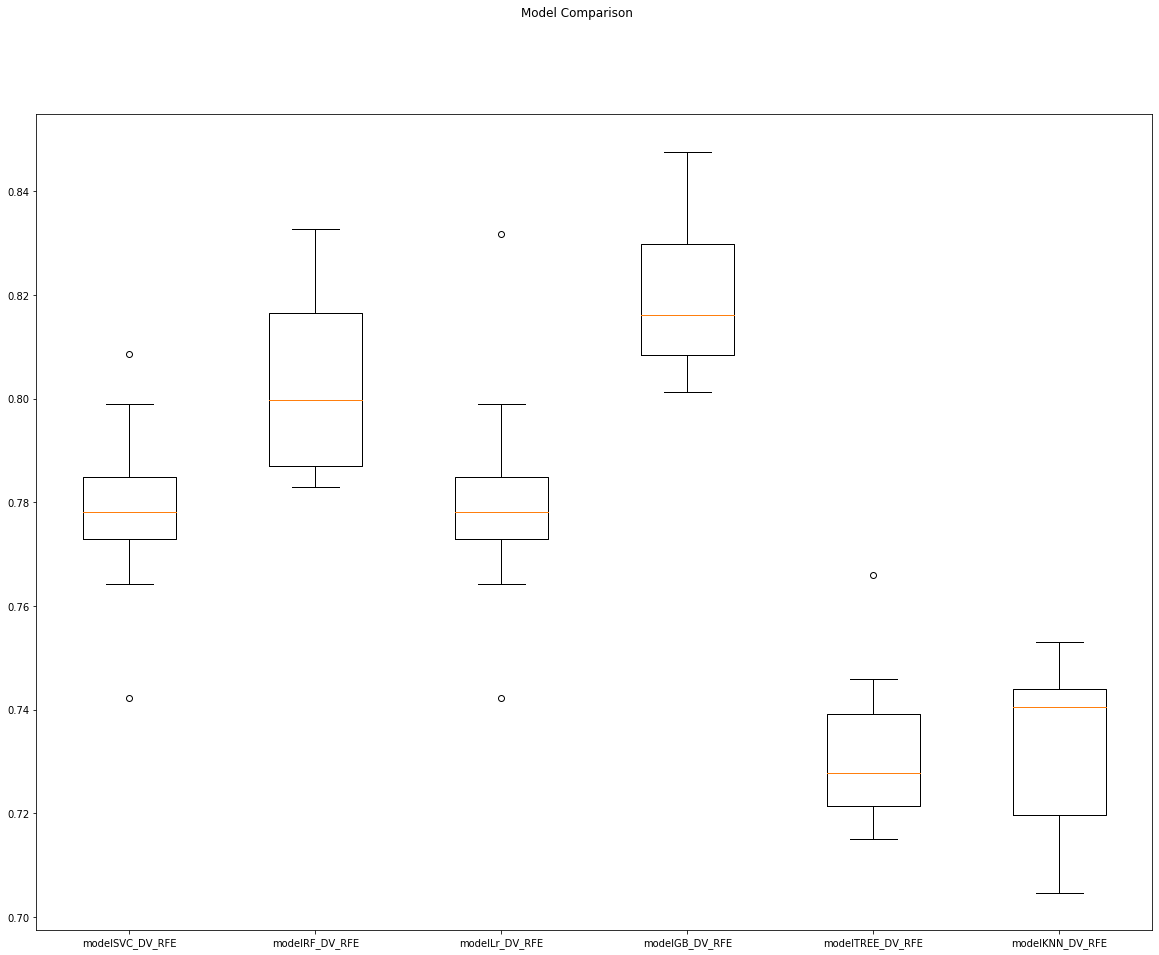

In [276]:
fig = plt.figure(figsize=(20,15))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome_DV_RFE)
ax.set_xticklabels(model_names_DV_RFE)
plt.show()

In [277]:
# Top Model overall is modelGB_DV_RFE

In [278]:
####################################################################################
# Model development -- DV RFE Scaled
####################################################################################

In [279]:
#Models
modelSVC_DV_RFE_S = SVC(gamma = 'scale')
modelRF_DV_RFE_S = RandomForestClassifier(n_estimators = 100)
modelLR_DV_RFE_S = LinearRegression()
modelLr_DV_RFE_S = LogisticRegression(solver='lbfgs', max_iter = 4000)
modelGB_DV_RFE_S = GradientBoostingClassifier()
modelTREE_DV_RFE_S = tree.DecisionTreeClassifier()
modelKNN_DV_RFE_S = KNeighborsClassifier(n_neighbors=3)

In [280]:
#SVR
modelSVC_DV_RFE_S.fit(X_train_DV_RFE_S,y_train_DV_RFE_S)
print(cross_val_score(modelSVC_DV_RFE_S, X_train_DV_RFE_S, y_train_DV_RFE_S)) 
modelSVC_DV_RFE_S.score(X_train_DV_RFE_S,y_train_DV_RFE_S)

[0.81166667 0.8147619  0.82047619 0.82428571 0.81547619]


0.8187619047619048

In [281]:
#Random Forest
modelRF_DV_RFE_S.fit(X_train_DV_RFE_S,y_train_DV_RFE_S)
print(cross_val_score(modelRF_DV_RFE_S, X_train_DV_RFE_S, y_train_DV_RFE_S))
modelRF_DV_RFE_S.score(X_train_DV_RFE_S,y_train_DV_RFE_S)

[0.79809524 0.8002381  0.80833333 0.80595238 0.80071429]


0.9842857142857143

In [282]:
#Linear Regression
modelLR_DV_RFE_S.fit(X_train_DV_RFE_S,y_train_DV_RFE_S)
print(cross_val_score(modelLR_DV_RFE_S, X_train_DV_RFE_S, y_train_DV_RFE_S))
modelLR_DV_RFE_S.score(X_train_DV_RFE_S,y_train_DV_RFE_S)

[0.172717   0.17989272 0.20328127 0.21338843 0.18291357]


0.19204396497832799

In [283]:
#Logistic Regression
modelLr_DV_RFE_S.fit(X_train_DV_RFE_S,y_train_DV_RFE_S)
print(cross_val_score(modelLr_DV_RFE_S, X_train_DV_RFE_S, y_train_DV_RFE_S))
modelLr_DV_RFE_S.score(X_train_DV_RFE_S,y_train_DV_RFE_S)

[0.8147619  0.81428571 0.82047619 0.82119048 0.81380952]


0.8167619047619048

In [284]:
#Gradient Boosting
modelGB_DV_RFE_S.fit(X_train_DV_RFE_S,y_train_DV_RFE_S)
print(cross_val_score(modelGB_DV_RFE_S, X_train_DV_RFE_S, y_train_DV_RFE_S))
modelGB_DV_RFE_S.score(X_train_DV_RFE_S,y_train_DV_RFE_S)

[0.81452381 0.81309524 0.82047619 0.82380952 0.81928571]


0.822952380952381

In [285]:
#Decision Tree
modelTREE_DV_RFE_S.fit(X_train_DV_RFE_S,y_train_DV_RFE_S)
print(cross_val_score(modelTREE_DV_RFE_S, X_train_DV_RFE_S, y_train_DV_RFE_S)) 
modelTREE_DV_RFE_S.score(X_train_DV_RFE_S,y_train_DV_RFE_S)

[0.72452381 0.72428571 0.73214286 0.72095238 0.72166667]


0.9843809523809524

In [286]:
#KNN
modelKNN_DV_RFE_S.fit(X_train_DV_RFE_S,y_train_DV_RFE_S)
print(cross_val_score(modelKNN_DV_RFE_S, X_train_DV_RFE_S, y_train_DV_RFE_S)) 
modelKNN_DV_RFE_S.score(X_train_DV_RFE_S,y_train_DV_RFE_S)

[0.7797619  0.78119048 0.78309524 0.77785714 0.77142857]


0.8615714285714285

In [287]:
####################################################################################
# Evaluating the Results -- DV RFE Scaled
####################################################################################

In [288]:
#SVC
predictions_DV_RFE_S_SVC = modelSVC_DV_RFE_S.predict(X_test_DV_RFE_S)
accy_DV_RFE_S_SVC = accuracy_score(y_test_DV_RFE_S,predictions_DV_RFE_S_SVC)
KAPPA_DV_RFE_S_SVC = cohen_kappa_score(y_test_DV_RFE_S, predictions_DV_RFE_S_SVC)
ROC_DV_RFE_S_SVC = roc_auc_score(y_test_DV,predictions_DV_RFE_S_SVC)
prec_DV_RFE_S_SVC = precision_score(y_test_DV, predictions_DV_RFE_S_SVC)
rec_DV_RFE_S_SVC = recall_score(y_test_DV,predictions_DV_RFE_S_SVC)
f1_DV_RFE_S_SVC = f1_score(y_test_DV,predictions_DV_RFE_S_SVC)

model =  pd.DataFrame([['SVC', 'DV_RFE_S', accy_DV_RFE_S_SVC, KAPPA_DV_RFE_S_SVC, ROC_DV_RFE_S_SVC, prec_DV_RFE_S_SVC, rec_DV_RFE_S_SVC, f1_DV_RFE_S_SVC]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE_S,0.821333,0.377234,0.659534,0.652057,0.374230,0.475538
...,...,...,...,...,...,...,...,...
61,Tree,DV_S,0.725556,0.210541,0.607891,0.374640,0.400411,0.387097
62,Tree,DV_FS,0.725111,0.212688,0.609465,0.375119,0.405544,0.389739
63,Tree,DV_S_FS,0.725000,0.209086,0.607165,0.373500,0.399384,0.386008
64,Tree,OOB_RFE_S,0.724778,0.208160,0.606652,0.372898,0.398357,0.385207


In [289]:
#Random Forest
predictions_DV_RFE_S_RF = modelRF_DV_RFE_S.predict(X_test_DV_RFE_S)
accy_DV_RFE_S_RF = accuracy_score(y_test_DV_RFE_S,predictions_DV_RFE_S_RF)
KAPPA_DV_RFE_S_RF = cohen_kappa_score(y_test_DV_RFE_S, predictions_DV_RFE_S_RF)
ROC_DV_RFE_S_RF = roc_auc_score(y_test_DV,predictions_DV_RFE_S_RF)
prec_DV_RFE_S_RF = precision_score(y_test_DV, predictions_DV_RFE_S_RF)
rec_DV_RFE_S_RF = recall_score(y_test_DV,predictions_DV_RFE_S_RF)
f1_DV_RFE_S_RF = f1_score(y_test_DV,predictions_DV_RFE_S_RF)

model =  pd.DataFrame([['RF', 'DV_RFE_S', accy_DV_RFE_S_RF, KAPPA_DV_RFE_S_RF, ROC_DV_RFE_S_RF, prec_DV_RFE_S_RF, rec_DV_RFE_S_RF, f1_DV_RFE_S_RF]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE_S,0.821333,0.377234,0.659534,0.652057,0.374230,0.475538
...,...,...,...,...,...,...,...,...
62,Tree,DV_S,0.725556,0.210541,0.607891,0.374640,0.400411,0.387097
63,Tree,DV_FS,0.725111,0.212688,0.609465,0.375119,0.405544,0.389739
64,Tree,DV_S_FS,0.725000,0.209086,0.607165,0.373500,0.399384,0.386008
65,Tree,OOB_RFE_S,0.724778,0.208160,0.606652,0.372898,0.398357,0.385207


In [290]:
#Logistic Regression
predictions_DV_RFE_S_Lr = modelLr_DV_RFE_S.predict(X_test_DV_RFE_S)
accy_DV_RFE_S_Lr = accuracy_score(y_test_DV_RFE_S,predictions_DV_RFE_S_Lr)
KAPPA_DV_RFE_S_Lr = cohen_kappa_score(y_test_DV_RFE_S, predictions_DV_RFE_S_Lr)
ROC_DV_RFE_S_Lr = roc_auc_score(y_test_DV,predictions_DV_RFE_S_Lr)
prec_DV_RFE_S_Lr = precision_score(y_test_DV, predictions_DV_RFE_S_Lr)
rec_DV_RFE_S_Lr = recall_score(y_test_DV,predictions_DV_RFE_S_Lr)
f1_DV_RFE_S_Lr = f1_score(y_test_DV,predictions_DV_RFE_S_Lr)

model =  pd.DataFrame([['Lr', 'DV_RFE_S', accy_DV_RFE_S_Lr, KAPPA_DV_RFE_S_Lr, ROC_DV_RFE_S_Lr, prec_DV_RFE_S_Lr, rec_DV_RFE_S_Lr, f1_DV_RFE_S_Lr]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE_S,0.821333,0.377234,0.659534,0.652057,0.374230,0.475538
...,...,...,...,...,...,...,...,...
63,Tree,DV_S,0.725556,0.210541,0.607891,0.374640,0.400411,0.387097
64,Tree,DV_FS,0.725111,0.212688,0.609465,0.375119,0.405544,0.389739
65,Tree,DV_S_FS,0.725000,0.209086,0.607165,0.373500,0.399384,0.386008
66,Tree,OOB_RFE_S,0.724778,0.208160,0.606652,0.372898,0.398357,0.385207


In [291]:
#Gradient Boosting
predictions_DV_RFE_S_GB = modelGB_DV_RFE_S.predict(X_test_DV_RFE_S)
accy_DV_RFE_S_GB = accuracy_score(y_test_DV_RFE_S,predictions_DV_RFE_S_GB)
KAPPA_DV_RFE_S_GB = cohen_kappa_score(y_test_DV_RFE_S, predictions_DV_RFE_S_GB)
ROC_DV_RFE_S_GB = roc_auc_score(y_test_DV,predictions_DV_RFE_S_GB)
prec_DV_RFE_S_GB = precision_score(y_test_DV, predictions_DV_RFE_S_GB)
rec_DV_RFE_S_GB = recall_score(y_test_DV,predictions_DV_RFE_S_GB)
f1_DV_RFE_S_GB = f1_score(y_test_DV,predictions_DV_RFE_S_GB)

model =  pd.DataFrame([['GB', 'DV_RFE_S', accy_DV_RFE_S_GB, KAPPA_DV_RFE_S_GB, ROC_DV_RFE_S_GB, prec_DV_RFE_S_GB, rec_DV_RFE_S_GB, f1_DV_RFE_S_GB]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE_S,0.821333,0.377234,0.659534,0.652057,0.374230,0.475538
...,...,...,...,...,...,...,...,...
64,Tree,DV_S,0.725556,0.210541,0.607891,0.374640,0.400411,0.387097
65,Tree,DV_FS,0.725111,0.212688,0.609465,0.375119,0.405544,0.389739
66,Tree,DV_S_FS,0.725000,0.209086,0.607165,0.373500,0.399384,0.386008
67,Tree,OOB_RFE_S,0.724778,0.208160,0.606652,0.372898,0.398357,0.385207


In [292]:
#Decision Tree
predictions_DV_RFE_S_tree = modelTREE_DV_RFE_S.predict(X_test_DV_RFE_S)
accy_DV_RFE_S_tree = accuracy_score(y_test_DV_RFE_S,predictions_DV_RFE_S_tree)
KAPPA_DV_RFE_S_tree = cohen_kappa_score(y_test_DV_RFE_S, predictions_DV_RFE_S_tree)
ROC_DV_RFE_S_tree = roc_auc_score(y_test_DV,predictions_DV_RFE_S_tree)
prec_DV_RFE_S_tree = precision_score(y_test_DV, predictions_DV_RFE_S_tree)
rec_DV_RFE_S_tree = recall_score(y_test_DV,predictions_DV_RFE_S_tree)
f1_DV_RFE_S_tree = f1_score(y_test_DV,predictions_DV_RFE_S_tree)

model =  pd.DataFrame([['Tree', 'DV_RFE_S', accy_DV_RFE_S_tree, KAPPA_DV_RFE_S_tree, ROC_DV_RFE_S_tree, prec_DV_RFE_S_tree, rec_DV_RFE_S_tree, f1_DV_RFE_S_tree]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE_S,0.821333,0.377234,0.659534,0.652057,0.374230,0.475538
...,...,...,...,...,...,...,...,...
65,Tree,DV_S,0.725556,0.210541,0.607891,0.374640,0.400411,0.387097
66,Tree,DV_FS,0.725111,0.212688,0.609465,0.375119,0.405544,0.389739
67,Tree,DV_S_FS,0.725000,0.209086,0.607165,0.373500,0.399384,0.386008
68,Tree,OOB_RFE_S,0.724778,0.208160,0.606652,0.372898,0.398357,0.385207


In [293]:
#KNN
predictions_DV_RFE_S_KNN = modelKNN_DV_RFE_S.predict(X_test_DV_RFE_S)
accy_DV_RFE_S_KNN = accuracy_score(y_test_DV_RFE_S,predictions_DV_RFE_S_KNN)
KAPPA_DV_RFE_S_KNN = cohen_kappa_score(y_test_DV_RFE_S, predictions_DV_RFE_S_KNN)
ROC_DV_RFE_S_KNN = roc_auc_score(y_test_DV,predictions_DV_RFE_S_KNN)
prec_DV_RFE_S_KNN = precision_score(y_test_DV, predictions_DV_RFE_S_KNN)
rec_DV_RFE_S_KNN = recall_score(y_test_DV,predictions_DV_RFE_S_KNN)
f1_DV_RFE_S_KNN = f1_score(y_test_DV,predictions_DV_RFE_S_KNN)

model =  pd.DataFrame([['KNN', 'DV_RFE_S', accy_DV_RFE_S_KNN, KAPPA_DV_RFE_S_KNN, ROC_DV_RFE_S_KNN, prec_DV_RFE_S_KNN, rec_DV_RFE_S_KNN, f1_DV_RFE_S_KNN]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE_S,0.821333,0.377234,0.659534,0.652057,0.374230,0.475538
...,...,...,...,...,...,...,...,...
66,Tree,DV_S,0.725556,0.210541,0.607891,0.374640,0.400411,0.387097
67,Tree,DV_FS,0.725111,0.212688,0.609465,0.375119,0.405544,0.389739
68,Tree,DV_S_FS,0.725000,0.209086,0.607165,0.373500,0.399384,0.386008
69,Tree,OOB_RFE_S,0.724778,0.208160,0.606652,0.372898,0.398357,0.385207


In [294]:
outcome_DV_RFE_S = []
model_names_DV_RFE_S = []
models_DV_RFE_S = [('modelSVC_DV_RFE_S', SVC(gamma = 'scale')),
              ('modelRF_DV_RFE_S', RandomForestClassifier(n_estimators = 100)),
              ('modelLr_DV_RFE_S', LogisticRegression(solver='lbfgs', max_iter = 4000)),
              ('modelGB_DV_RFE_S', GradientBoostingClassifier()),
              ('modelTREE_DV_RFE_S', tree.DecisionTreeClassifier()),
              ('modelKNN_DV_RFE_S', KNeighborsClassifier(n_neighbors=3))]

In [295]:
for model_name_DV_RFE_S, model_DV_RFE_S in models_DV_RFE_S:
    k_fold_validation = model_selection.KFold(n_splits=10)
    results_DV_RFE_S = model_selection.cross_val_score(model_DV_RFE_S, features_DV_RFE_S, depVar_DV_RFE_S, cv=k_fold_validation, scoring='accuracy')
    outcome_DV_RFE_S.append(results_DV_RFE_S)
    model_names_DV_RFE_S.append(model_name_DV_RFE_S)
    output_message_DV_RFE_S = "%s| Mean=%f STD=%f" % (model_name_DV_RFE_S, results_DV_RFE_S.mean(), results_DV_RFE_S.std())
    print(output_message_DV_RFE_S)

modelSVC_DV_RFE_S| Mean=0.817967 STD=0.013949
modelRF_DV_RFE_S| Mean=0.802267 STD=0.017549
modelLr_DV_RFE_S| Mean=0.816933 STD=0.014681
modelGB_DV_RFE_S| Mean=0.819800 STD=0.014428
modelTREE_DV_RFE_S| Mean=0.732467 STD=0.014227
modelKNN_DV_RFE_S| Mean=0.779400 STD=0.014850


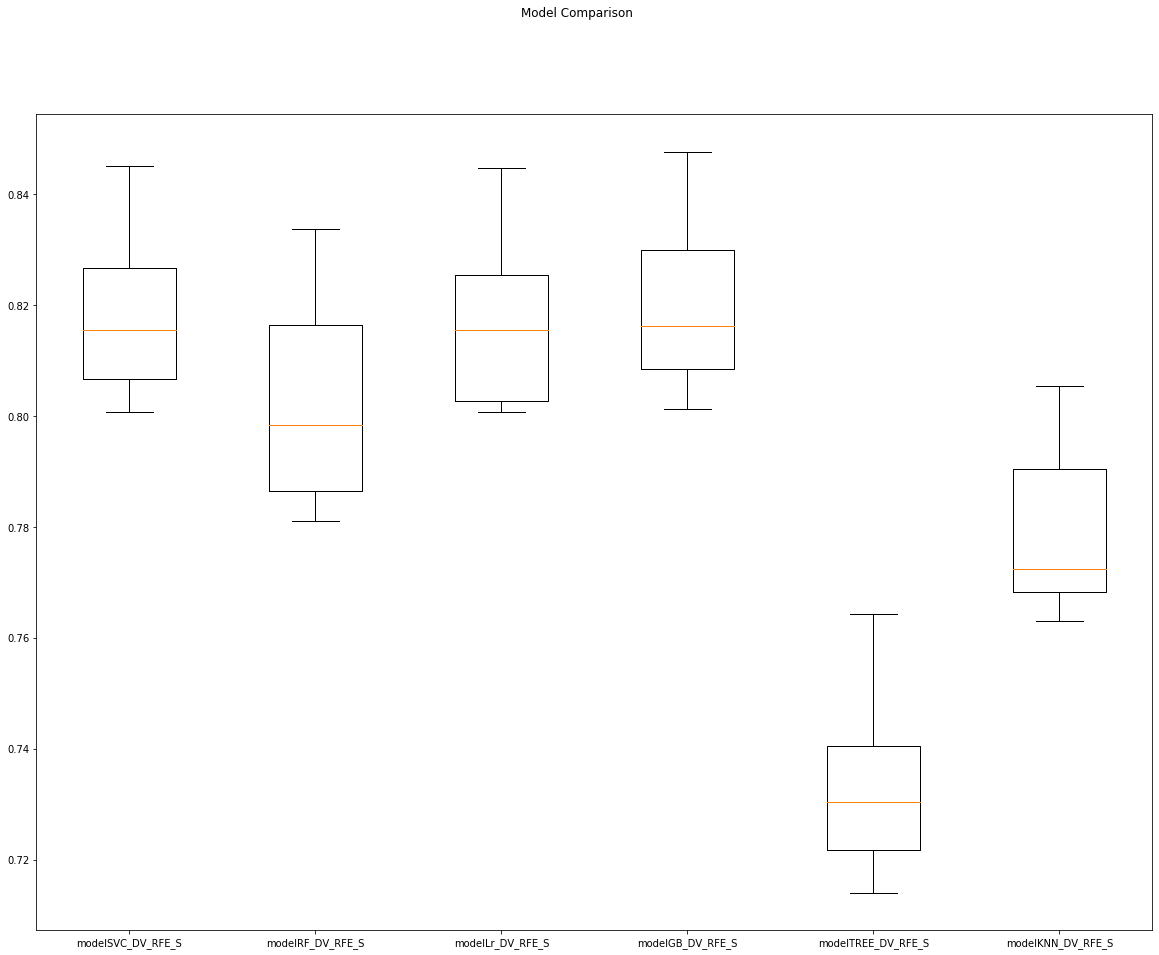

In [296]:
fig = plt.figure(figsize=(20,15))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome_DV_RFE_S)
ax.set_xticklabels(model_names_DV_RFE_S)
plt.show()

In [297]:
# Top model is modelGB_DV_RFE_S

In [300]:
### Viewing all Models to choose which one to improve
pd.set_option('display.max_rows', None)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE_S,0.821333,0.377234,0.659534,0.652057,0.374230,0.475538
5,GB,OOB_RFE,0.821222,0.376984,0.659463,0.651475,0.374230,0.475383
6,GB,DV_S_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
7,GB,DV_FS,0.821111,0.374261,0.657720,0.653358,0.369610,0.472131
8,SVC,OOB_RFE_S,0.821000,0.367036,0.653005,0.660019,0.356776,0.463179
9,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477


In [298]:
######################################
# Improve Top Models using Grid Search
######################################

In [ ]:
#Try to improve top GB model using Grid search and best parameter

In [50]:
from sklearn.model_selection import GridSearchCV
parameters1 =[{'loss': ['deviance'], 'learning_rate': [.1, .01, .001, .0001], 'n_estimators': [100, 300, 500, 700, 900, 
                                                                                             1100]},
             {'loss': ['exponential'], 'learning_rate': [.1, .01, .001, .0001], 'n_estimators': [100, 300, 500, 700, 900, 
                                                                                             1100]}]
grid_search1 = GridSearchCV(estimator = modelGB_OOB_FS_S,
                           param_grid = parameters1,
                           scoring = 'accuracy',
                           cv= 10,
                           n_jobs = -1)
grid_search1 = grid_search1.fit(X_train_OOB_FS_S, y_train_OOB_FS_S)

In [52]:
best_accuracy1 = grid_search1.best_score_
best_accuracy1

0.8209523809523811

In [53]:
best_parameters1 = grid_search1.best_params_
best_parameters1

{'learning_rate': 0.01, 'loss': 'deviance', 'n_estimators': 300}

In [56]:
#try to improve GB model further
parameters2 =[{'loss': ['deviance'], 'learning_rate': [.008, .01, .02, .03], 'n_estimators': [250, 300, 350, 400]}]
grid_search2 = GridSearchCV(estimator = modelGB_OOB_FS_S,
                           param_grid = parameters2,                          
                           scoring = 'accuracy',
                           cv= 10,
                           n_jobs = -1)
grid_search2 = grid_search2.fit(X_train_OOB_FS_S, y_train_OOB_FS_S)

In [57]:
best_accuracy2 = grid_search2.best_score_
best_accuracy2

0.8209523809523811

In [58]:
best_parameters2 = grid_search2.best_params_
best_parameters2

{'learning_rate': 0.01, 'loss': 'deviance', 'n_estimators': 300}

In [70]:
modelGB_OOB_FS_S_T = GradientBoostingClassifier(learning_rate = .01, n_estimators = 300, random_state = 123 )
modelGB_OOB_FS_S_T.fit(X_train_OOB_FS_S,y_train_OOB_FS_S)
print(cross_val_score(modelGB_OOB_FS_S_T, X_train_OOB_FS_S, y_train_OOB_FS_S))
modelGB_OOB_FS_S_T.score(X_train_OOB_FS_S,y_train_OOB_FS_S)

[0.81309524 0.81714286 0.8247619  0.82714286 0.81904762]


0.8234761904761905

In [301]:
#Gradient Boosting
predictions_OOB_FS_S_T_GB = modelGB_OOB_FS_S_T.predict(X_test_OOB_FS_S)
accy_OOB_FS_S_T_GB = accuracy_score(y_test_OOB_FS_S,predictions_OOB_FS_S_T_GB)
KAPPA_OOB_FS_S_T_GB = cohen_kappa_score(y_test_OOB_FS_S, predictions_OOB_FS_S_T_GB)
ROC_OOB_FS_S_T_GB = roc_auc_score(y_test_OOB,predictions_OOB_FS_S_T_GB)
prec_OOB_FS_S_T_GB = precision_score(y_test_OOB, predictions_OOB_FS_S_T_GB)
rec_OOB_FS_S_T_GB = recall_score(y_test_OOB,predictions_OOB_FS_S_T_GB)
f1_OOB_FS_S_T_GB = f1_score(y_test_OOB,predictions_OOB_FS_S_T_GB)

model =  pd.DataFrame([['GB', 'OOB_FS_S_T', accy_OOB_FS_S_T_GB, KAPPA_OOB_FS_S_T_GB, ROC_OOB_FS_S_T_GB, 
                        prec_OOB_FS_S_T_GB, rec_OOB_FS_S_T_GB, f1_OOB_FS_S_T_GB]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results


,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
72,GB,OOB_FS_S_T,0.823222,0.377115,0.657767,0.666978,0.366016,0.472655
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,GB,OOB_S,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE_S,0.821333,0.377234,0.659534,0.652057,0.374230,0.475538
5,GB,OOB_RFE,0.821222,0.376984,0.659463,0.651475,0.374230,0.475383
6,GB,DV_S_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
7,GB,DV_FS,0.821111,0.374261,0.657720,0.653358,0.369610,0.472131
8,SVC,OOB_RFE_S,0.821000,0.367036,0.653005,0.660019,0.356776,0.463179


In [46]:
#Try to improve top SVC model using Grid search and best parameter
sc = StandardScaler()

In [47]:
X_train_OOB_RFE_S = sc.fit_transform(X_train_OOB_RFE_S)
X_test_OOB_RFE_S = sc.transform(X_test_OOB_RFE_S)

In [49]:
rand_list = {"C": stats.uniform(2, 10),
             "gamma": stats.uniform(0.1, 1),
            "kernel": ('linear’, ‘rbf’, ‘poly’)}

In [52]:
grid_search_SVC = RandomizedSearchCV(modelSVC_OOB_RFE_S, 
                                     param_distributions = rand_list, 
                                     n_iter = 20, 
                                     n_jobs = 4, 
                                     cv = 3, 
                                     random_state = 123, 
                                     scoring = 'accuracy') 


In [56]:
grid_search_SVC = grid_search_SVC.fit(X_train_OOB_RFE_S, y_train_OOB_RFE_S)

In [57]:
best_accuracy_SVC = grid_search_SVC.best_score_
best_accuracy_SVC

0.8182380952380952

In [59]:
best_parameters_SVC = grid_search_SVC.best_params_
best_parameters_SVC

{'C': 6.385722446796244, 'gamma': 0.15967789660956835}

In [64]:
modelSVC_OOB_RFE_S_T = SVC(C = 6.385722446796244, gamma = 0.15967789660956835, random_state = 123 )
modelSVC_OOB_RFE_S_T.fit(X_train_OOB_RFE_S, y_train_OOB_RFE_S)
print(cross_val_score(modelSVC_OOB_RFE_S_T, X_train_OOB_RFE_S, y_train_OOB_RFE_S))
modelSVC_OOB_RFE_S_T.score(X_train_OOB_RFE_S, y_train_OOB_RFE_S)

[0.81214286 0.81547619 0.82380952 0.82119048 0.81952381]


0.8315238095238096

In [66]:
#SVC
predictions_OOB_RFE_S_T_SVC = modelSVC_OOB_RFE_S_T.predict(X_test_OOB_RFE_S)
accy_OOB_RFE_S_T_SVC = accuracy_score(y_test_OOB_RFE_S,predictions_OOB_RFE_S_T_SVC)
KAPPA_OOB_RFE_S_T_SVC = cohen_kappa_score(y_test_OOB_RFE_S, predictions_OOB_RFE_S_T_SVC)
ROC_OOB_RFE_S_T_SVC = roc_auc_score(y_test_OOB,predictions_OOB_RFE_S_T_SVC)
prec_OOB_RFE_S_T_SVC = precision_score(y_test_OOB, predictions_OOB_RFE_S_T_SVC)
rec_OOB_RFE_S_T_SVC = recall_score(y_test_OOB,predictions_OOB_RFE_S_T_SVC)
f1_OOB_RFE_S_T_SVC = f1_score(y_test_OOB,predictions_OOB_RFE_S_T_SVC)

#model =  pd.DataFrame([['SVC', 'OOB_RFE_S_T', accy_OOB_RFE_S_T_SVC, KAPPA_OOB_RFE_S_T_SVC, ROC_OOB_RFE_S_T_SVC, 
                       # prec_OOB_RFE_S_T_SVC, rec_OOB_RFE_S_T_SVC, f1_OOB_RFE_S_T_SVC]],
               #columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
#model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
#model_results

In [68]:
print(accy_OOB_RFE_S_T_SVC)
print(KAPPA_OOB_RFE_S_T_SVC)
print(ROC_OOB_RFE_S_T_SVC)

0.8164444444444444
0.3565187404178941
0.6499124718576349


In [ ]:
######################################
# Top Model overall is GB_OOB_FS_S_T
######################################

In [73]:
#Variable Importance
modelGB_OOB_FS_S_T.feature_importances_

array([1.20414849e-02, 1.47827676e-04, 2.70421230e-03, 9.82225267e-05,
       4.99842503e-03, 7.00440856e-01, 8.14696732e-02, 4.16074541e-02,
       1.67611199e-02, 2.17036545e-02, 2.54262011e-02, 1.56617030e-02,
       2.25678792e-03, 9.89866106e-04, 1.78300593e-02, 1.52731800e-02,
       1.96510458e-02, 1.24154930e-02, 4.93409099e-03, 3.58864245e-03])

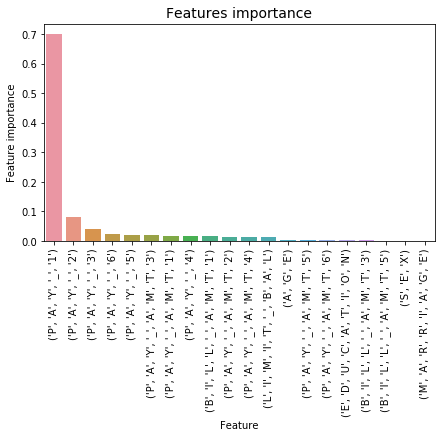

In [75]:
tmp = pd.DataFrame({'Feature': features_OOB_FS_S, 'Feature importance': modelGB_OOB_FS_S_T.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [82]:
print(classification_report(y_test_OOB_FS_S, predictions_OOB_FS_S_T_GB))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7052
           1       0.67      0.37      0.47      1948

    accuracy                           0.82      9000
   macro avg       0.76      0.66      0.68      9000
weighted avg       0.81      0.82      0.80      9000



In [111]:
#Confusion Matrix
cm_GB = confusion_matrix(y_test_OOB_FS_S, predictions_OOB_FS_S_T_GB)
cm_GB

array([[6696,  356],
       [1235,  713]])

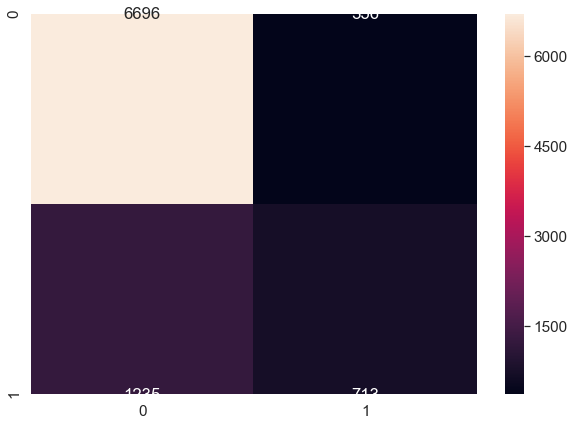

In [125]:
array = [[6696,356],
     [1235,713]]        
df_cm = pd.DataFrame(array, range(2),
                  range(2))

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,fmt='d')# font size
plt.show()

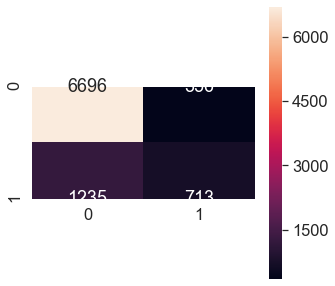

In [110]:
sns.set(font_scale=1.5)
plt.figure(figsize=(5,5))
sns.heatmap(cm_GB, square=True, annot = True, fmt="0")
plt.show()